# **Predicting Online Shopper Purchase Intentions**

Packages and libraries needed for the analysis:

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

### 1 - DATA ANALYSIS AND LINEAR REGRESSION

   - **1.1 - IMPORTING THE DATA**
   - **1.2 - NULL VALUES ANALYSIS**
   - **1.3 - DATA VISUALIZATION**
   - **1.4 - PREPARE THE DATA**
   - **1.5 - LOOKING FOR CORRELATION AMONG QUANTITATIVE VARIABLES**
   - **1.6 - SPLIT OF THE DATA INTO TRAIN SET AND TEST SET**
   - **1.7 - MULTIVARIATE LINEAR MODEL**
   - **1.8 - POLYNOMIAL REGRESSION**
   - **1.9 - FILLING THE NULL VALUES ON THE TRAIN SET AND ON THE TEST SET**


First of all we imported our data (training_data and test_data) as a Pandas dataframe.

## 1.1 - IMPORTING THE DATA

### - TRAIN SET

In [ ]:
# Import the train dataset
original_train_data = pd.read_csv("training_set_online_shoppers_intention.csv")

# Type of data
type(original_train_data)
# The object called original_train_data is a pandas.core.frame.DataFrame

# The dimensions of our dataframe are:
original_train_data.shape
# Number of rows: 9248
# Number of columns: 19

# Remove the first column (ID)
original_train_data = original_train_data.drop(columns = ['Unnamed: 0'])
original_train_data.head()

pandas.core.frame.DataFrame

(9248, 19)

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               5               158.700000              0   
2               7                87.916667              1   
3               1                 4.000000              0   
4               2               132.400000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               5                19.000000   
1                     0.0              51              1364.266667   
2                     0.0              46              1621.025379   
3                     0.0              37              1296.942857   
4                     0.0              11               296.300000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.080000    0.000000         0.6   May                 2   
1     0.007692   0.011987    0.000000         0.0   Nov                 3   
2     0.004082   0.020544    6.023523         0.0   Dec                 1   
3     0.013889        NaN    0.000000         0.8   May                 2   
4     0.000000        NaN    0.000000         0.0   Sep                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        2       1            3  Returning_Visitor    False    False  
1        2       3            2  Returning_Visitor     True    False  
2        1       3            2  Returning_Visitor    False    False  
3        2       4            2  Returning_Visitor    False    False  
4        4       3            2        New_Visitor    False    False

### - TEST SET

In [ ]:
# Import the test dataset
original_test_data = pd.read_csv("test_set_online_shoppers_intention.csv")

# Type of data
type(original_test_data)
# The object called original_test_data is a pandas.core.frame.DataFrame

# The dimensions of our dataframe are:
original_test_data.shape
# Number of rows: 9248
# Number of columns: 19

# Remove the first column (ID)
original_test_data = original_test_data.drop(columns = ['Unnamed: 0'])
original_test_data.head()

pandas.core.frame.DataFrame

(3082, 19)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 2.666667   
2                     0.0              19               154.216667   
3                     0.0               7               280.500000   
4                     0.0               2                68.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000        NaN         0.0         0.0   Feb                 1   
1     0.050000        NaN         0.0         0.0   Feb                 3   
2     0.015789   0.024561         0.0         0.0   Feb                 2   
3     0.000000   0.028571         0.0         0.0   Feb                 1   
4     0.000000        NaN         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       2            4  Returning_Visitor    False    False  
2        2       1            3  Returning_Visitor    False    False  
3        1       1            3  Returning_Visitor    False    False  
4        2       3            3  Returning_Visitor    False    False

#### WHAT ABOUT OUR TRAIN DATA?

In the original data-frame there were a total of 20 variables/columns. After a first examination of the data, the first column ('Unnamed: 0') was removed from the data frame. So at the end the final number of varibales present in the data frame was 19 with 9248 observations.

After that, other information about our data were analysed, in detail we analysed the type of each of the 19 variables present in our dataset.

In [ ]:
original_train_data.dtypes
# with the method dtypes we extracted all the information about the datatype type of each variable.

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Regarding the types of the variables we had 4 main data types:

    - int64 (7 variables)
    - float64 (8 variables)
    - object (2 variables)
    - bool (2 variables)

In the following step we looked if in our dataset there were any null values and if that was the case, how to deal with them.

## 1.2 NULL VALUES ANALYSIS

First we looked if there were present Null Values in the train data.

In [ ]:
# Extracting the names of each variable and the number of NaN for each variable
Null_values = (original_train_data).isnull().sum().to_numpy()
Variable_names = np.array((original_train_data).isnull().sum().index.tolist())

# Percentage of Nan
missing_percentage = (original_train_data.isnull().sum()/original_train_data.shape[0]).to_numpy()

# Define header names and the data to fill the table below
col_names = ['Varibale Names', "Number of NaN", '% NaN for each variable']
data = np.dstack([Variable_names, Null_values, missing_percentage*100]).reshape(len(Variable_names),-1)

# Plotting the table
table = tabulate(data, headers=col_names, tablefmt="fancy_grid")
print(table)

╒═════════════════════════╤═════════════════╤═══════════════════════════╕
│ Varibale Names          │   Number of NaN │   % NaN for each variable │
╞═════════════════════════╪═════════════════╪═══════════════════════════╡
│ Administrative          │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Administrative_Duration │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Informational           │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Informational_Duration  │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ ProductRelated          │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ ProductRelated_Duration │           

From the results we can see that in all the columns there is no Null Values except for the column ExitRates that has 2782 Null Values (corresponding to 30% of NaN values with respect to the total observation for ExitRates).

Then we looked at the Null Values present in the test data (we expected to find again Null Values in the variable called 'ExitRates').

In [ ]:
# Extracting the names of each variable and the number of NaN for each variable
Null_values = (original_test_data).isnull().sum().to_numpy()
Variable_names = np.array((original_test_data).isnull().sum().index.tolist())

# Percentage of Nan
missing_percentage = (original_test_data.isnull().sum()/original_test_data.shape[0]).to_numpy()

# Define header names and the data to fill the table below
col_names = ['Varibale Names', "Number of NaN", '% NaN for each variable']
data = np.dstack([Variable_names, Null_values, missing_percentage*100]).reshape(len(Variable_names),-1)

# Plotting the table
table = tabulate(data, headers=col_names, tablefmt="fancy_grid")
print(table)

╒═════════════════════════╤═════════════════╤═══════════════════════════╕
│ Varibale Names          │   Number of NaN │   % NaN for each variable │
╞═════════════════════════╪═════════════════╪═══════════════════════════╡
│ Administrative          │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Administrative_Duration │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Informational           │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ Informational_Duration  │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ ProductRelated          │               0 │                    0      │
├─────────────────────────┼─────────────────┼───────────────────────────┤
│ ProductRelated_Duration │           

As expected, there were no Null Values except for the varible ExitRates which had 917 Null Values (corrisponding to 29.7% of NaN values with respect to the total observation for ExitRates, which is a percentage very similar to what we observed in the train data).

#### HOW TO TREAT THESE NULL VALUES?

To treat these missing values we had different options:

1) The first options could have been to **delete the rows containing the missing values** but, as said before, they are 2782 over 9248 in the train data and 917 over 3082 in the test data. Indeed in both sets, almost 30% of the total numbers of observation that we had for the ExitRates variable were missing values. So, because they were too many, _we decided to treat these missing values in a different way_.

2) A second option could have been to use **interpolation techniques to estimate these missing values** (ex. the mean value of the variable ExitRates, ecc...) but we prefered not to choose this type of strategy to fill the missing values, in fact the amount of observation where we have Null Values is too high for this technique, if we would have used it we would have manipulated our data and the results wouldn't have been reliable.

3) A third option was to **build a model on of the train data** where:

    - y (ExitRates) represented the output for which we wanted to predict the missing values
    - X was a matrix with all the observation of the predictor variables.
   
    So, after fitting and evaluating the best possible linear model, it would have been possible to predict the Null Values on the train data and on the test data.

**Before deciding how to deal with the null values problem, we looked the distribution of our variables.**

## 1.3 - DATA VISUALIZATION

First of all, we decided to analyse the distribution of the categorical variables in our dataset:

    - VisitorTypes
    - Month
    - Operating Systems
    - TrafficType
    - Browser
    
We defined a new function to visualize in a table the data of the variables. Then we plotted a graph (ex. barplot, pie plot, ecc...) for each variable using the package Matplotlib.

In [ ]:
# define the function
def visualize_data(data, variable, type_of_graph):
    
    # Number of users
    users = data[variable].value_counts().to_numpy()
    # Type
    types = np.array(data[variable].value_counts().index.tolist())
    types = np.array(['{}'.format(x) for x in types])
    
    # Create the table
    table_data = pd.DataFrame({variable: types, 'Count': users})
       
    # Create the graph and table side by side
    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 5])

    # Plot the table
    ax1 = fig.add_subplot(gs[0, 0])
    table_str = tabulate(table_data, headers='keys', tablefmt='simple', showindex=False)
    ax1.text(0.1, 0.9, table_str, va='top', fontsize=18, family='monospace')
    ax1.axis('off')  # Hide axes for the table
    
    # Plot the graph
    color = sns.color_palette(palette='winter')
    
    if type_of_graph == 'pie_chart':
        
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.pie(users, labels=types, autopct='%1.1f%%', startangle=90)
        ax2.set_title('{} distribution'.format(variable), fontsize=20)
        
    elif type_of_graph == 'barplot':
        
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.bar(types, users, color = color)
        ax2.set_title('{} distribution'.format(variable), fontsize=20)

    plt.show()


### 1) VISITOR TYPE

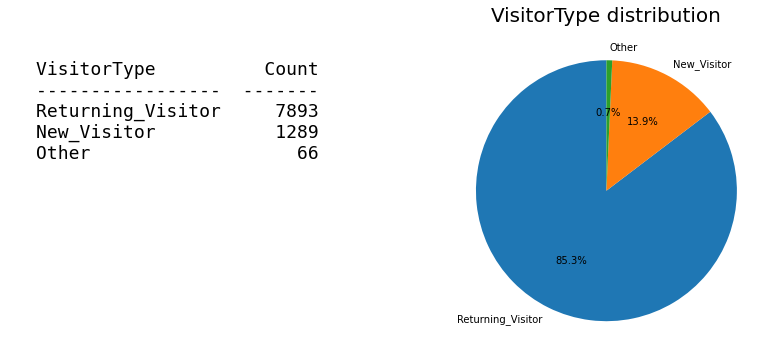

In [ ]:
# Visualize the data with a table
visualize_data(original_train_data, 'VisitorType', 'pie_chart')

As you can see there are 3 types of visitors: **Returning Visitor, New Visitor and Other**.

As we can see from the plot we can say that most of the visitors are **Returning Visitors** (85.3%). Then the second largest group consisted of **New Visitors** (13.9%) and we also saw that there were visitors that were labeled as **Other** who rappresented the 0.71 % of the total (66 visitor over 9248 total visitors).

Regarding the category called **Other** we coundn't find any specif meaning and because of that we thought that probably who collected the data didn't have enough information to label these 66 users. So we decided that it was better to discard them.

In [ ]:
# Remove the data
original_train_data = original_train_data[original_train_data['VisitorType'] != 'Other']

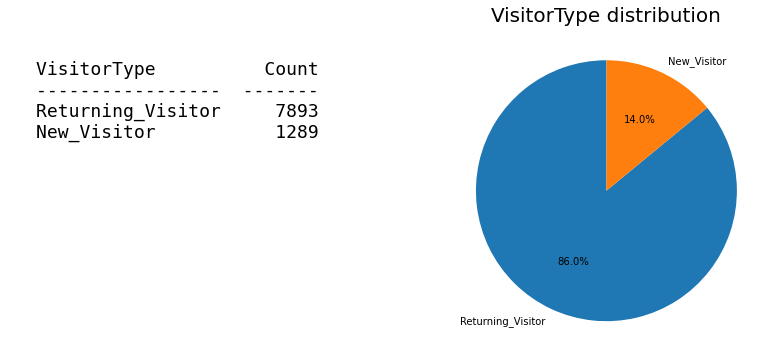

In [ ]:
# Visualize the data with a table
visualize_data(original_train_data, 'VisitorType', 'pie_chart')

#### The same analysis was done also on the Test data

In [ ]:
# Remove the data
original_test_data = original_test_data[original_test_data['VisitorType'] != 'Other']

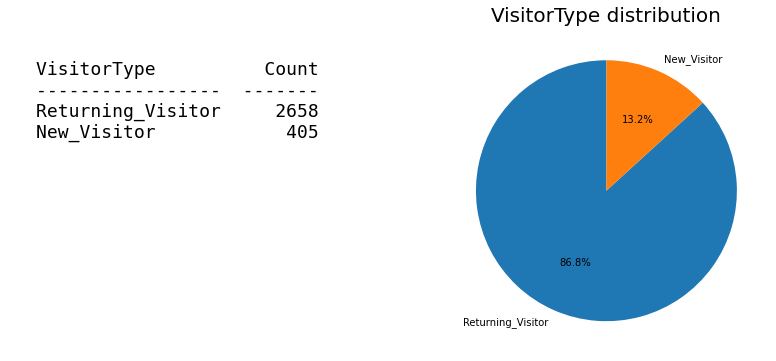

In [ ]:
# Visualize the data with a table
visualize_data(original_test_data, 'VisitorType', 'pie_chart')

In the test data we have very close results in term of percentage of each single groups. Indeed **Returning Visitors** are 86.6% and **New Visitors** are 13.2%.

### 2) MONTH

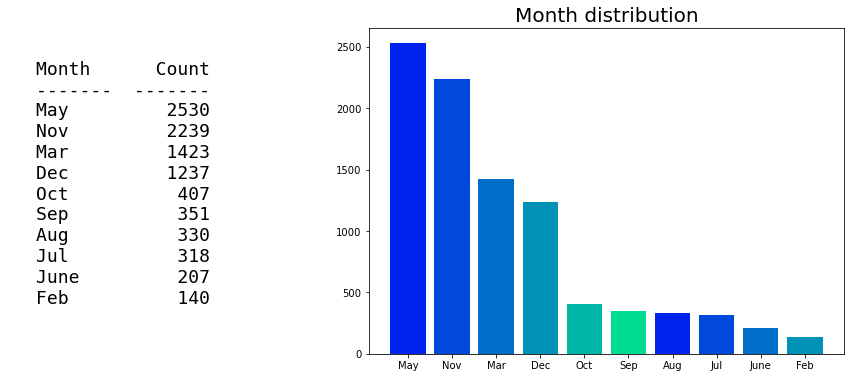

In [ ]:
# Visualize the data with a table
visualize_data(original_train_data, 'Month', 'barplot')

From the table and also from the histogram plot, it can be seen that the months with the higher number of visits were:

    - May (2530 visits)
    - November (2239 visits)
    - March (1423 visits)
    - December (1237 visits)
    
The fact the these are the months with the higest number of visits is reasonable since **March** and **May** are two months where there is the switching from winter to spring, so more people buy items for the new season. Regarding **November** and **December**, there are a lot of visitors also in these two months because they are very close to Christmas.

We also observed that the information about the month of **January** and the month of **April** was missing so in the end we decide to divide the months in 4 different groups based on the **FISCAL QUARTERS**:

    - 1° FISCAL QUARTER = January, February, March
    - 2° FISCAL QUARTER = April, May, June
    - 3° FISCAL QUARTER = July, August, September
    - 4° FISCAL QUARTER = October, November, December


In [ ]:
# Define the fiscal quarters
month_to_quarters = {
                    'Jan': 1,
                    'Feb': 1,
                    'Mar': 1,
                    'Apr': 2,
                    'May': 2,
                    'June': 2,
                    'Jul': 3,
                    'Aug': 3,
                    'Sep': 3,
                    'Oct': 4,
                    'Nov': 4,
                    'Dec': 4
                    }

# Use the map() function to create a new column with the corresponding seasons
original_train_data['Fiscal_quarters'] = original_train_data['Month'].map(month_to_quarters)

# Eliminate the Month variable
original_train_data.drop(['Month'], axis = 1, inplace = True)

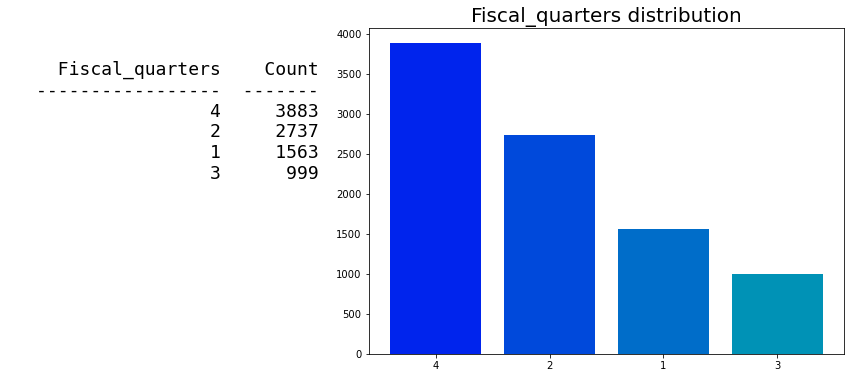

In [ ]:
visualize_data(original_train_data, 'Fiscal_quarters', 'barplot')

From the results we can see that the fiscal quarters with most of the visitors are the fouth one (because there are **November** and **December**) and the second one (because there is **May**) as expected from the results previously seen.

#### The same analysis was done also on the Test data

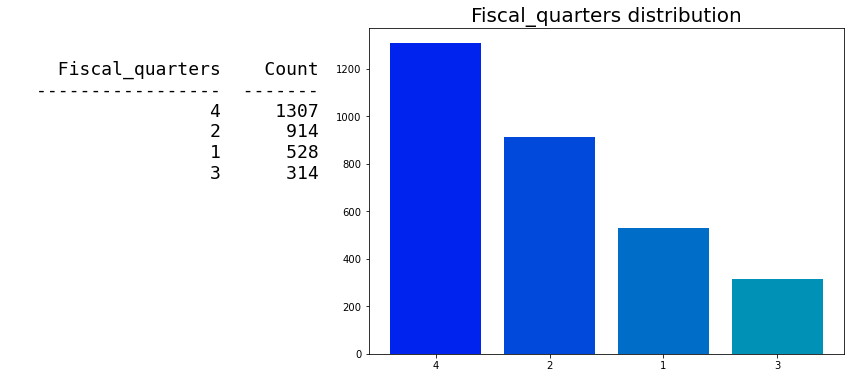

In [ ]:
# Use the map() function to create a new column with the corresponding seasons
original_test_data['Fiscal_quarters'] = original_test_data['Month'].map(month_to_quarters)
original_test_data.drop(['Month'], axis = 1, inplace = True)

# Visualize the data
visualize_data(original_test_data, 'Fiscal_quarters', 'barplot')

In the test data, we can see again that the fiscal quarter with most visitors is the fourth one (October, November, December) as in the train set.

### 3) OPERATING SYSTEMS

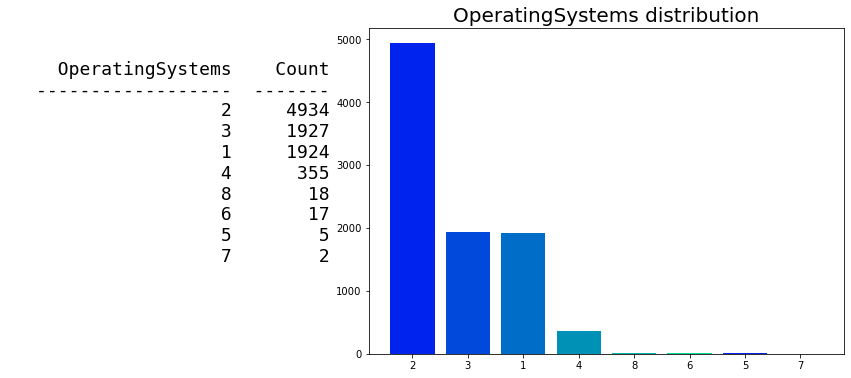

In [ ]:
visualize_data(original_train_data, 'OperatingSystems', 'barplot')

From the table it can be seen that the number of users for the operating system 4 (355 users), 8 (18 users), 6 (17 users), 5 (5 users), 7 (2 users) are low with respect to the first 3 operating systems, we can see that those have a different order of magnitude. So, for the sake of a clearer interpretation, it was decided to group all of them under the name 'Other_OP' as you can see in the new table below.

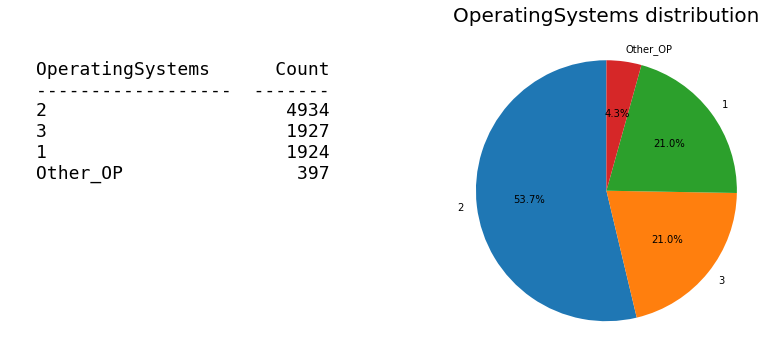

In [ ]:
# Change the values 4, 8, 7, 6, 5 with 'Others'
original_train_data['OperatingSystems'] = original_train_data['OperatingSystems'].replace([4, 8, 7, 6, 5], 'Other_OP')

# Visualize the distribution of the data after the change
visualize_data(original_train_data, 'OperatingSystems', 'pie_chart')

From the plot we can see that most of the users (53.51%) uses the **operating system 2**, while the other 20.91% and 20.88% of them uses respectively the **operating system 3** and **1**.
The remaining 4.32% use other operating systems **(4, 8, 6, 5 ,7)**.

#### The same analysis was done also on the Test data

We can see that also in the test set we have the same categories with proportional frequencies with respect to the train data. So we grouped the categories for the test data in the same way:

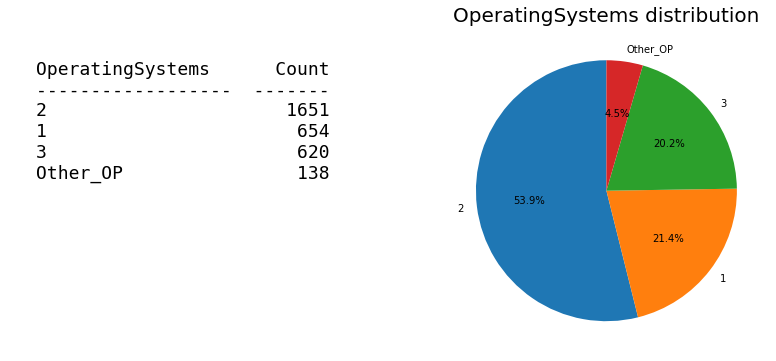

In [ ]:
#Group under 'Other_OP' the operative systems wi
original_test_data['OperatingSystems'] = original_test_data['OperatingSystems'].replace([4,8,7,6,5], 'Other_OP')

# Visualize the distribution of the data after the change
visualize_data(original_test_data, 'OperatingSystems', 'pie_chart')

In the test data, as we saw before in the train data, the most used operating system is **2** (53.5%) followed by **1** (21.2%).


### 4) TRAFFIC TYPE

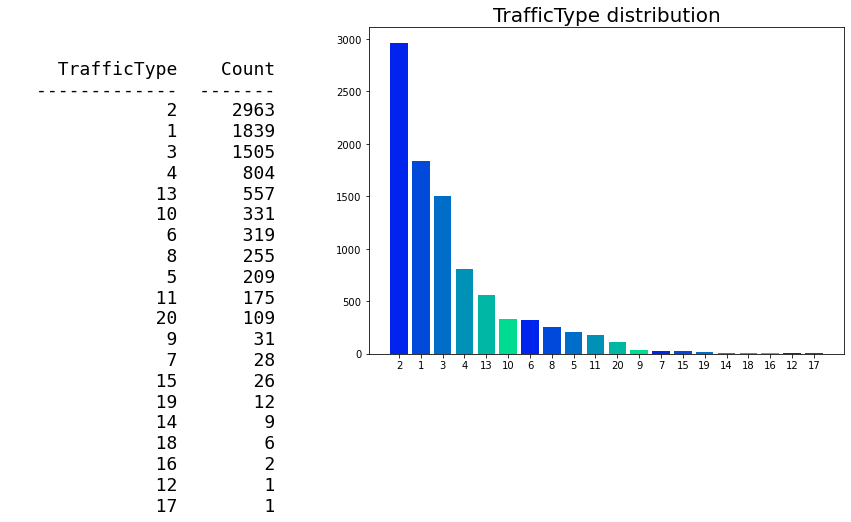

In [ ]:
# Visualize the data with a table and a barplot
visualize_data(original_train_data, 'TrafficType', 'barplot')

As before, for some traffic types the number of users is low (under 200). For example traffic **11** (176 users), **20** (144 users), **9** (31 users),**7** (28 users), **15** (26 users), **19** (12 users), **14** (9 users), **18** (6 users), **16** (2 users), **12** (1 user), **17** (1 user).
So we decided to group all of them under the name 'Other_TrTy'.

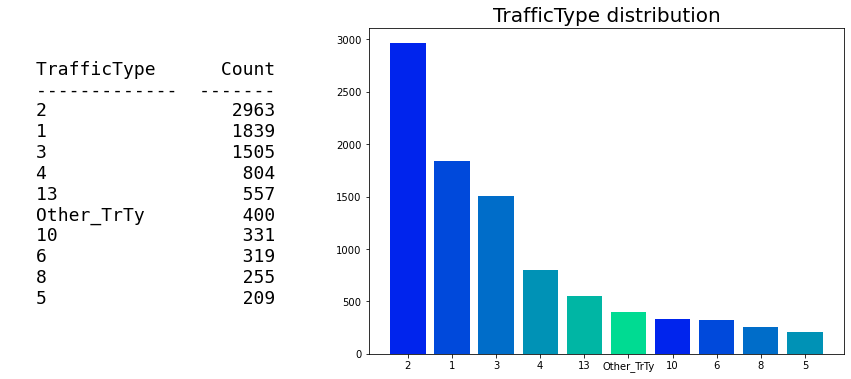

In [ ]:
# Change the values 11, 20, 9, 7, 15, 19, 14, 18, 16, 12, 17 with 'Others'
original_train_data['TrafficType'] = original_train_data['TrafficType'].replace([11, 20, 9, 7, 15, 19, 14, 18, 16, 12, 17], 'Other_TrTy')

# Visualize the data with a table and a barplot after the changes
visualize_data(original_train_data, 'TrafficType', 'barplot')

From the plot we can see that the most common type of traffic is the **Type 2**, which has 2974 users followed by **type 1** (1845 users) and **3** (1512 users).

#### The same analysis was done also on the Test data

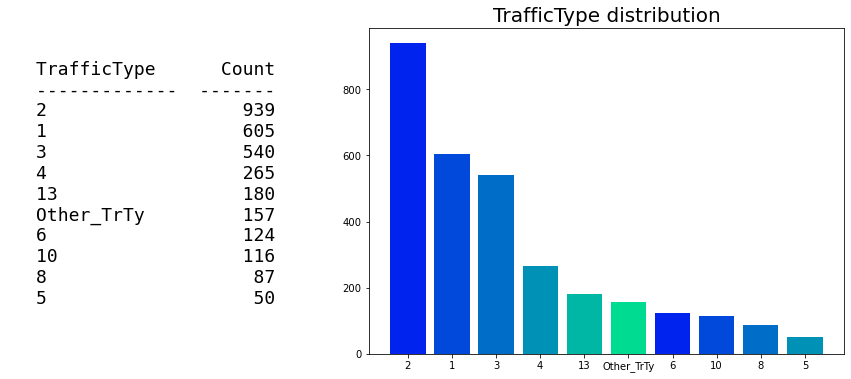

In [ ]:
#Group the data
original_test_data['TrafficType'] = original_test_data['TrafficType'].replace([11, 20, 9, 7, 15, 19, 14, 18, 16, 12, 17], 'Other_TrTy')

# Visualize the data with a table and a barplot after the changes
visualize_data(original_test_data, 'TrafficType', 'barplot')

Also in the test data, we can see that the most common traffic type is **type 2**, folowed by **type 1** and **3**.


### 5) BROWSER

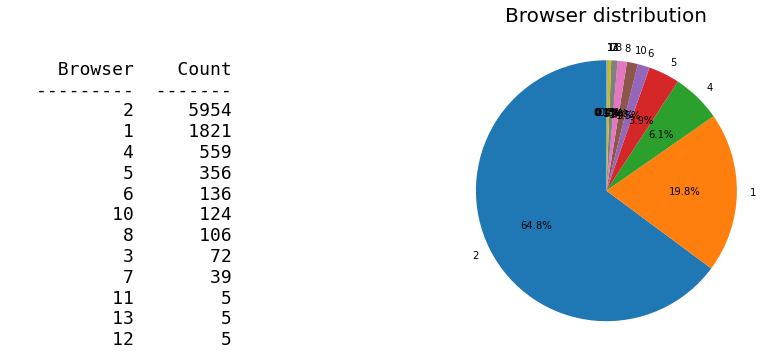

In [ ]:
# Visualize the data with a table and a pie chart
visualize_data(original_train_data, 'Browser', 'pie_chart')

From the plot we can see that there are different browsers with a very few number of users with respect to the main ones (for example some have under 150 users). In detail we have browser **type 6** (136 users), **type 10** (125 users), **type 8** (106 users), **3** (72 users), **13** (40 users), **7** (39 users), **11** (5 users), **12** (5 users). These categories were grouped all together under the name 'Other_Br'.

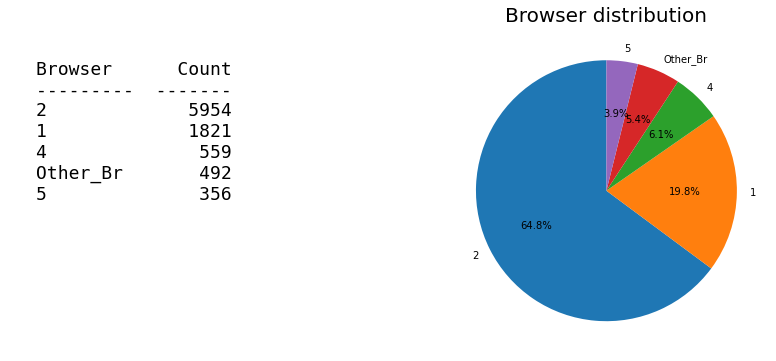

In [ ]:
# Change the values 6, 10, 8, 3, 13, 7, 11, 12 with 'Others'
original_train_data['Browser'] = original_train_data['Browser'].replace([6, 10, 8, 3, 13, 7, 11, 12], 'Other_Br')

# Visualize the data with a table and a pie chart after the change
visualize_data(original_train_data, 'Browser', 'pie_chart')

From the plot we can see that most of the users (5973) uses **Browser 2** to visit the website, follow by users that use **browser 1** (19.8%).

#### The same analysis was done also on the Test data

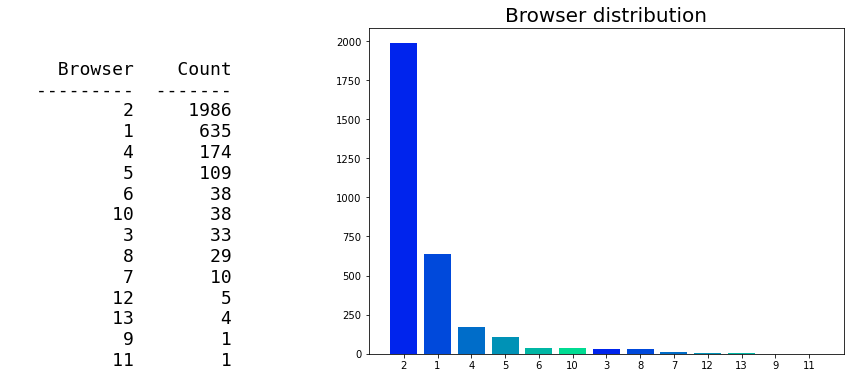

In [ ]:
# Visualize the data with a table and a barplot
visualize_data(original_test_data, 'Browser', 'barplot')

For all the other categorical variables, on the train data and on the test data we always found the same categories. Also with Browser we saw the same categories in the train and test daata except for one specific category found only in the test data. Indee we observed that in the the test data was present **browser 9** which was not present in the train data. We grouped it under 'Other_Br', becuase it only had 1 user and also in order to have the same variables in the train and test data.

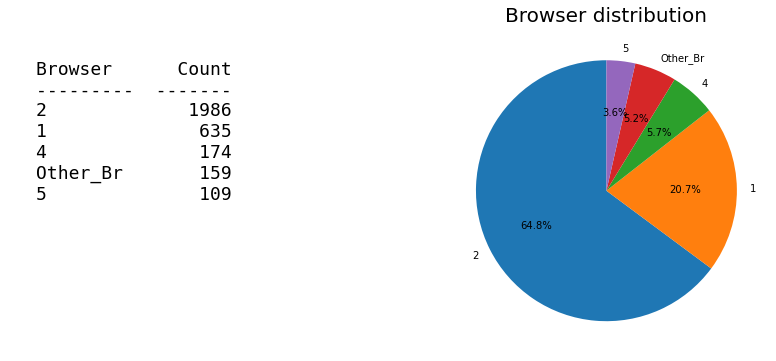

In [ ]:
# Group the data
original_test_data['Browser'] = original_test_data['Browser'].replace([6, 10, 8, 3, 13, 7, 11, 12, 9], 'Other_Br')

# Visualize the data after the change
visualize_data(original_test_data, 'Browser', 'pie_chart')

As in the train data, also in test data the most used browser is **type 2** (64.5%) followed by **type 1** (20.6%).


### 6) REGION

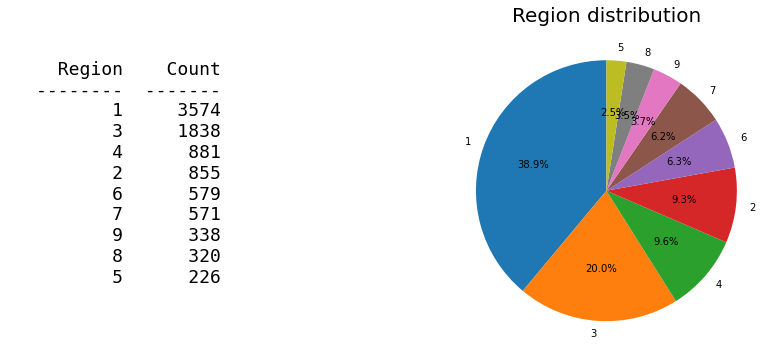

In [ ]:
# Visualize the data with a table and a pie chart
visualize_data(original_train_data, 'Region', 'pie_chart')

As we can see from the pie graph, the majority of the users is from **region 1** (38.7%) followed by users coming from **region 3** (20.0%).

#### The same analysis was done also on the Test data

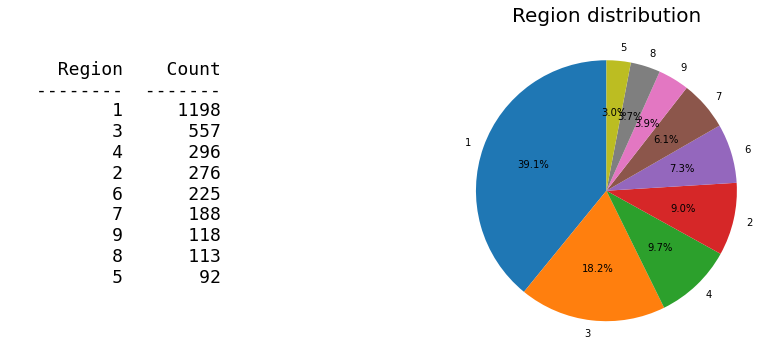

In [ ]:
# Visualize the data
visualize_data(original_test_data, 'Region', 'pie_chart')

Again, we found out that most of the users come from **region 1** (38.9%) followed by users coming from **region 3** (18.1%).

We decided to put a visual analysis of the continuous variables present in our dataset in the classification part of this homework.

## 1.4 - PREPARE THE DATA

### ONE-HOT ENCODING ON CATEGORICAL VARIABLES

As said before, in our dataset there were 5 categorical variables. We decided to use one-hot encoding on all the 5 categorical variables. We did that because in each variable there was no preference is assigning a specific number to a category or to another, and some machine learning algorithms may interpret the numerical values of categorical variables as having an inherent order, leading to biased results. One-hot encoding eliminates this issue.

In [ ]:
def onehot_feature(pd_data, column_name):
    
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values)
    value_onehot = onehots[value_idx]
    
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

#### - Transforming the predictor called Fiscal_Quarters (4 levels qualitative predictor):

1) The first variable is called 'Fiscal_Quarters_1' and it takes values:

    - 1 if Browser is equal to '1'
    
    - else 0
    
2) The second variable is called 'Fiscal_Quarters_2' and it takes values:

    - 1 if Browser is equal to '2'
    
    - else 0

3) The third variable is called 'Fiscal_Quarters_3' and it takes values:

    - 1 if Browser is equal to '3'
    
    - else 0
    
4) The 4° variable is called 'Fiscal_Quarters_4' and it takes values:

    - 1 if Browser is equal to '4'
    
    - else 0
      

In [ ]:
original_train_data = onehot_feature(original_train_data, "Fiscal_quarters")
original_test_data = onehot_feature(original_test_data, "Fiscal_quarters")

#### - Transforming the predictor called OperatingSystems (4 levels qualitative predictor):

1) The first variable is called 'OperatingSystems_1' and it takes values:

    - 1 if OperatingSystems is equal to '1'
    
    - else 0
    
2) The second variable is called 'OperatingSystems_2' and it takes values:

    - 1 if OperatingSystems is equal to '2'
    
    - else 0

3) The third variable is called 'OperatingSystems_3' and it takes values:

    - 1 if OperatingSystems is equal to '3'
    
    - else 0


4) The 4° variable is called 'OperatingSystems_Other_OP' and it takes values:

    - 1 if OperatingSystems is equal to 'Other_OP'
    
    - else 0

In [ ]:
original_train_data = onehot_feature(original_train_data, "OperatingSystems")
original_test_data = onehot_feature(original_test_data, "OperatingSystems")

#### - Transforming the predictor called TrafficType (10 levels qualitative predictor):

1) The first variable is called 'TrafficType_1' and it takes values:

    - 1 if TrafficType is equal to '1'
    
    - else 0
    
2) The second variable is called 'TrafficType_2' and it takes values:

    - 1 if TrafficType is equal to '2'
    
    - else 0

3) The third variable is called 'TrafficType_3' and it takes values:

    - 1 if TrafficType is equal to '3'
    
    - else 0
    
4) The 4° variable is called 'TrafficType_4' and it takes values:

    - 1 if TrafficType is equal to '4'
    
    - else 0

5) The 5° variable is called 'TrafficType_5' and it takes values:

    - 1 if TrafficType is equal to '5'
    
    - else 0
    
6) The 6° variable is called 'TrafficType_6' and it takes values:

    - 1 if TrafficType is equal to '6'
    
    - else 0
    
7) The 7° variable is called 'TrafficType_8' and it takes values:

    - 1 if TrafficType is equal to '8'
    
    - else 0    
 
8) The 8° variable is called 'TrafficType_10' and it takes values:

    - 1 if TrafficType is equal to '10'
    
    - else 0 
    
9) The 9° variable is called 'TrafficType_13' and it takes values:

    - 1 if TrafficType is equal to '13'
    
    - else 0  
    
10) The 10° variable is called 'TrafficType_Other_TrTy' and it takes values:

    - 1 if TrafficType is equal to 'Others_TrTy'
    
    - else 0 

In [ ]:
original_train_data = onehot_feature(original_train_data, "TrafficType")
original_test_data = onehot_feature(original_test_data, "TrafficType")

#### Transforming the predictor called Region (9 levels qualitative predictor):

1) The first variable is called 'Region_1' and it taks values:

    - 1 if Region is equal to '1'
    
    - else 0
    
2) The second variable is called 'Region_2' and it takes values:

    - 1 if Region is equal to '2'
    
    - else 0

3) The third variable is called 'Region_3' and it takes values:

    - 1 if Region is equal to '3'
    
    - else 0
    
4) The 4° variable is called 'Region_4' and it takes values:

    - 1 if Region is equal to '4'
    
    - else 0

5) The 5° variable is called 'Region_5' and it takes values:

    - 1 if Region is equal to '5'
    
    - else 0
    
6) The 6° variable is called 'Region_6' and it takes values:

    - 1 if Region is equal to '6'
    
    - else 0
    
7) The 7° variable is called 'Region_7' and it takes values:

    - 1 if Region is equal to '7'
    
    - else 0
    
8) The 8° variable is called 'Region_8' and it takes values:

    - 1 if Region is equal to '8'
    
    - else 0    
 
8) The 9° variable is called 'Region_9' and it takes values:

    - 1 if Region is equal to '9'
    
    - else 0   

In [ ]:
original_train_data = onehot_feature(original_train_data, "Region")
original_test_data = onehot_feature(original_test_data, "Region")

#### Transforming the predictor called Browser (5 levels qualitative predictor):

1) The first variable is called 'Browser_1' and it taks values:

    - 1 if Browser is equal to '1'
    
    - else 0
    
2) The second variable is called 'Browser_2' and it takes values:

    - 1 if Browser is equal to '2'
    
    - else 0
    
3) The 3° variable is called 'Browser_4' and it takes values:

    - 1 if Browser is equal to '4'
    
    - else 0

4) The 4° variable is called 'Browser_5' and it takes values:

    - 1 if Browser is equal to '5'
    
    - else 0
    
5) The 5° variable is called 'Browser_Other_Br' and it takes values:

    - 1 if Browser is equal to 'Other_Br'
    
    - else 0      

In [ ]:
original_train_data = onehot_feature(original_train_data, "Browser")
original_test_data = onehot_feature(original_test_data, "Browser")

#### - Transforming the predictor called VisitorType (2 levels qualitative predictor):

1) The first variable is called 'VisitorType_New_Visitor' and it taks values:

    - 1 if VisitorType is equal to 'New_Visitor'
    
    - else 0
    
2) The second variable is called 'VisitorType_Returning_Visitor' and it takes values:

    - 1 if VisitorType is equal to 'Returning_Visitor'
    
    - else 0

In [ ]:
original_train_data = onehot_feature(original_train_data, "VisitorType")
original_test_data = onehot_feature(original_test_data, "VisitorType")

After performing the one-hot encoding, the total number of variables present is different:

In [ ]:
print('Number of variables in tha train set: {}'.format(original_train_data.shape[1]))
print('Number of variables in the test set: {}'.format(original_test_data.shape[1]))

Number of variables in tha train set: 46
Number of variables in the test set: 46


We obtain as the total number of variables, both for the train set and for the test set, 46 (they were originally 19)

### TRASFORMING BOOLEAN VARIABLES INTO NUMERICAL VARIABLES (0/1)

#### - Weekend

In [ ]:
original_train_data['Weekend'] = original_train_data['Weekend'].replace({True: 1.0, False:0.0})
original_test_data['Weekend'] = original_test_data['Weekend'].replace({True: 1.0, False:0.0})

#### - Revenue

In [ ]:
original_train_data['Revenue'] = original_train_data['Revenue'].replace({True: 1.0, False:0.0})
original_test_data['Revenue'] = original_test_data['Revenue'].replace({True: 1.0, False:0.0})

After having done all the changes on the data, we had to isolate all the null value from the train data. By doing so, we were able to train a linear regression model on our train data (filtered out of the null values) to then use it to predict all the null values present in the variable ExitRates in the original train and test data.

In [ ]:
train_data = original_train_data[original_train_data['ExitRates'].notnull()]
print('The train set consists of:\n- {} rows\n- {} columns'.format(train_data.shape[0], train_data.shape[1])) 

The train set consists of:
- 6418 rows
- 46 columns


## 1.5 - LOOKING FOR CORRELATION AMONG QUANTITATIVE VARIABLES

The first thing that we did was to plot our data against each others to see if there was possible correlations. As you can see below, we decided to first plot the scatterplots for the continuous variables and looking for correlations between these variables and our target variable (ExitRates) but also correlation among all the other variables.

In [ ]:
columns_wanted = [
                  'Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
                 ]


# We want to see by using a function of seborn if there is correlation 
# between numerical variables of my dataset.

separate_data = original_train_data[columns_wanted]
separate_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               5               158.700000              0   
2               7                87.916667              1   
3               1                 4.000000              0   
4               2               132.400000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               5                19.000000   
1                     0.0              51              1364.266667   
2                     0.0              46              1621.025379   
3                     0.0              37              1296.942857   
4                     0.0              11               296.300000   

   BounceRates  ExitRates  PageValues  SpecialDay  
0     0.000000   0.080000    0.000000         0.6  
1     0.007692   0.011987    0.000000         0.0  
2     0.004082   0.020544    6.023523         0.0  
3     0.013889        NaN    0.000000         0.8  
4     0.000000        NaN    0.000000         0.0

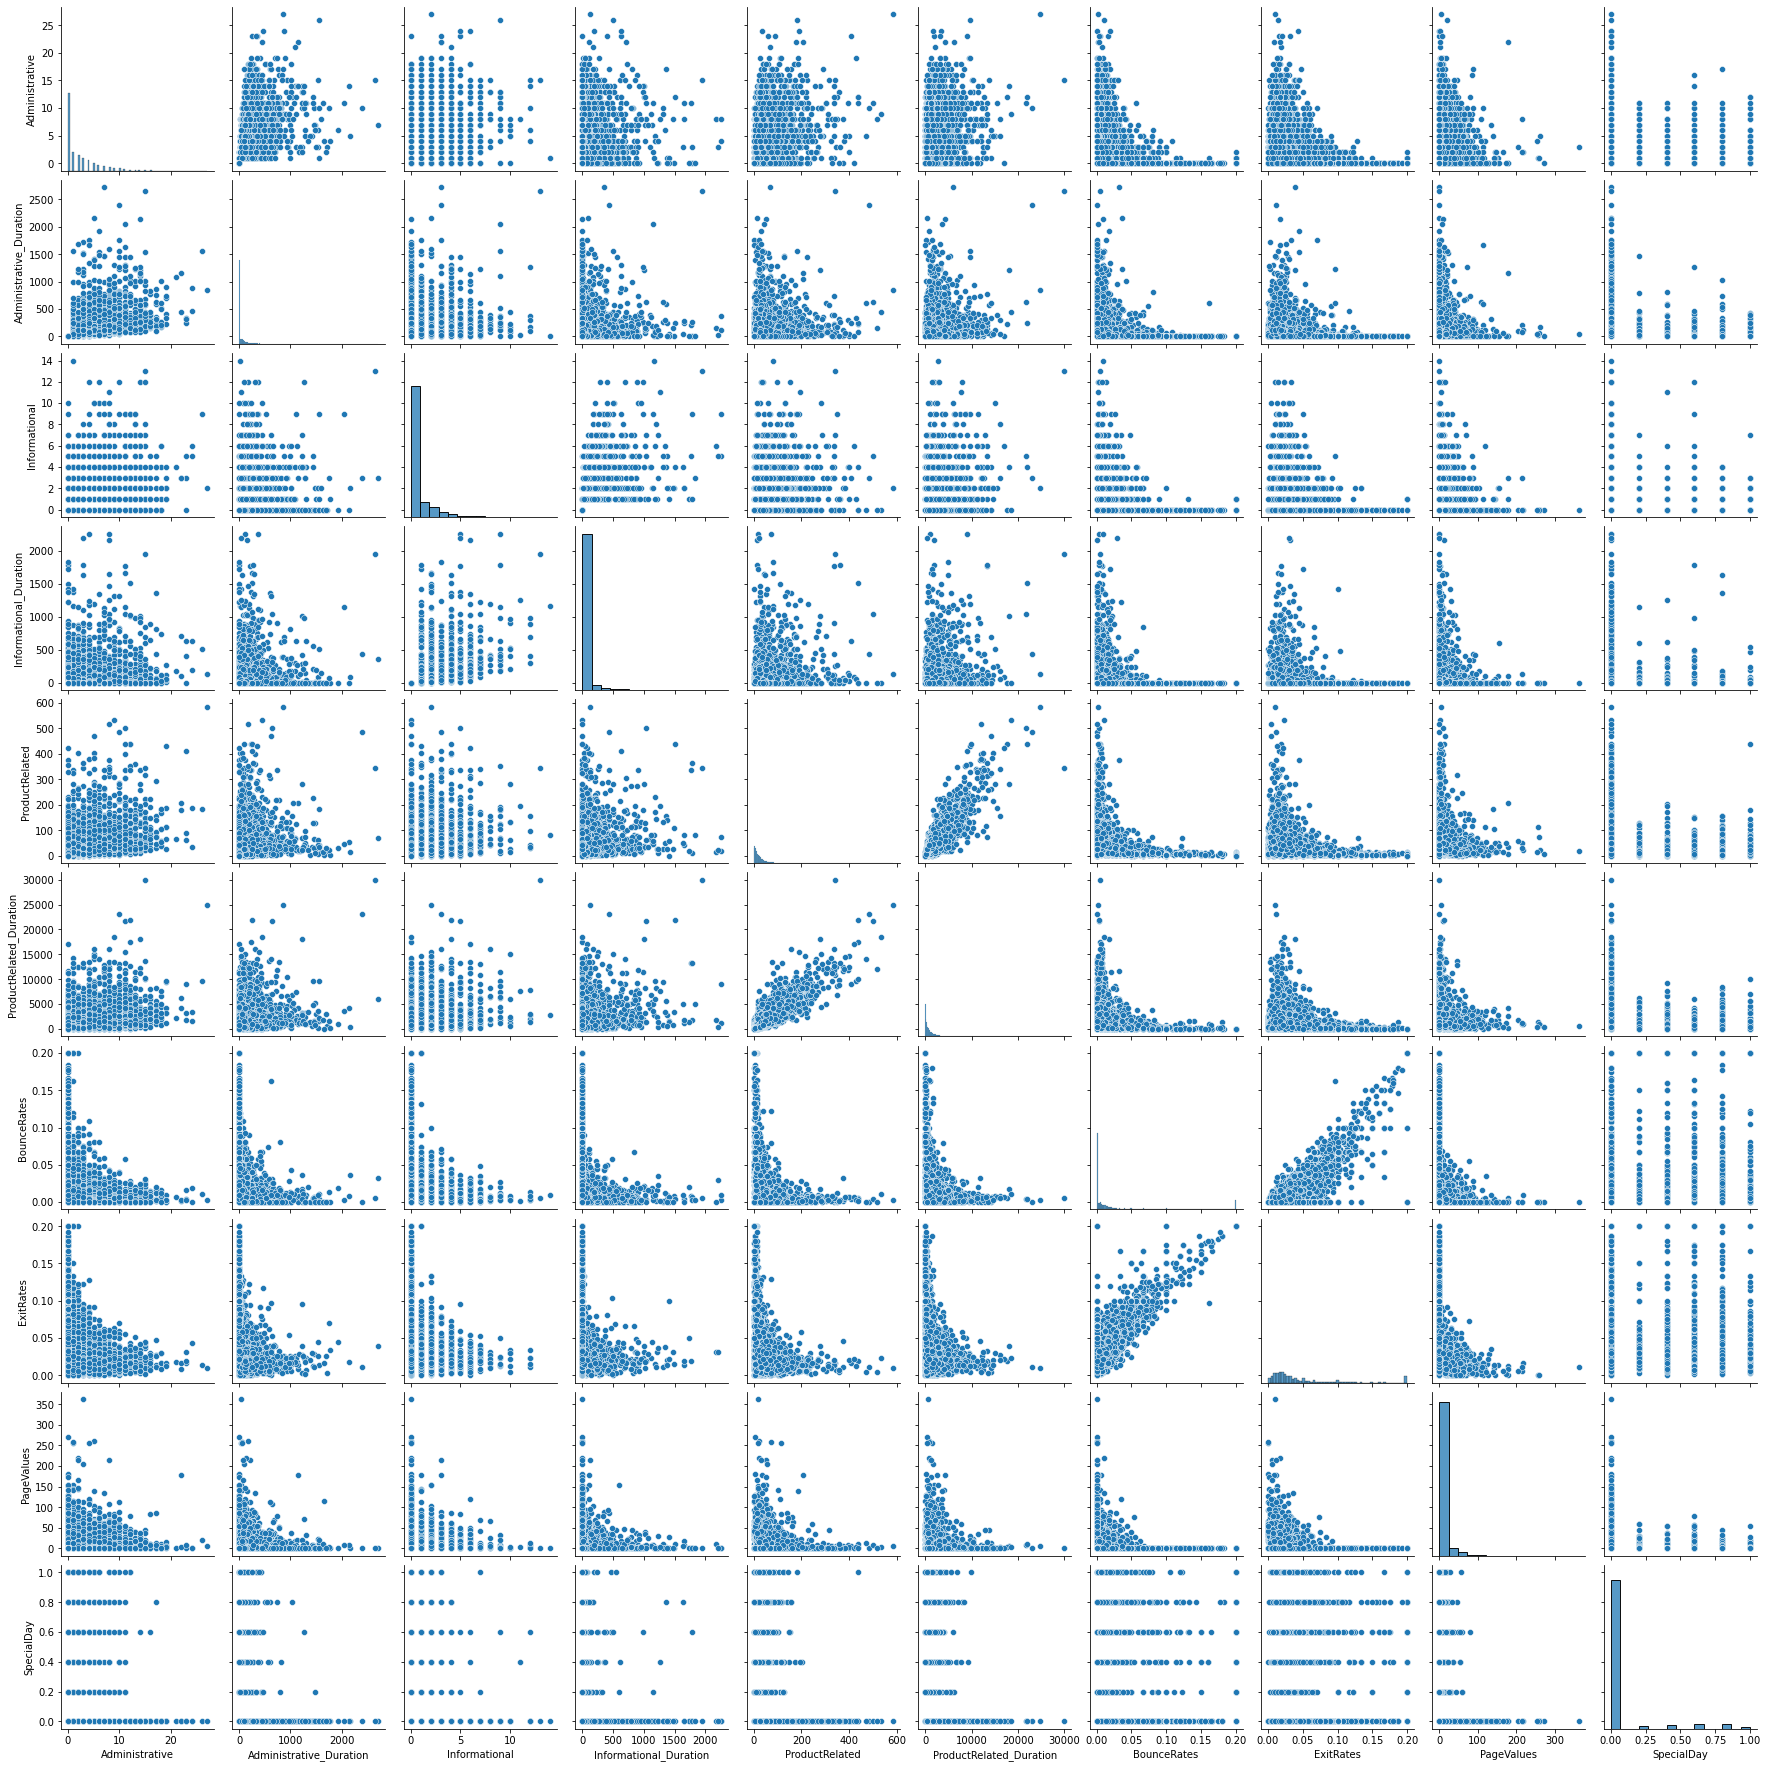

In [ ]:
sns.pairplot(separate_data, height=2.5)

From these plot we can see that there is a **strong positive correlation between ExitRates and BounceRates** and also a **strong positive correlation between ProductRelated and ProductRelated_Duration**, but to look more in detail we plotted the correlation matrix with the correlation indexes for each pair of variables.

<Figure size 960x800 with 0 Axes>

<AxesSubplot:>

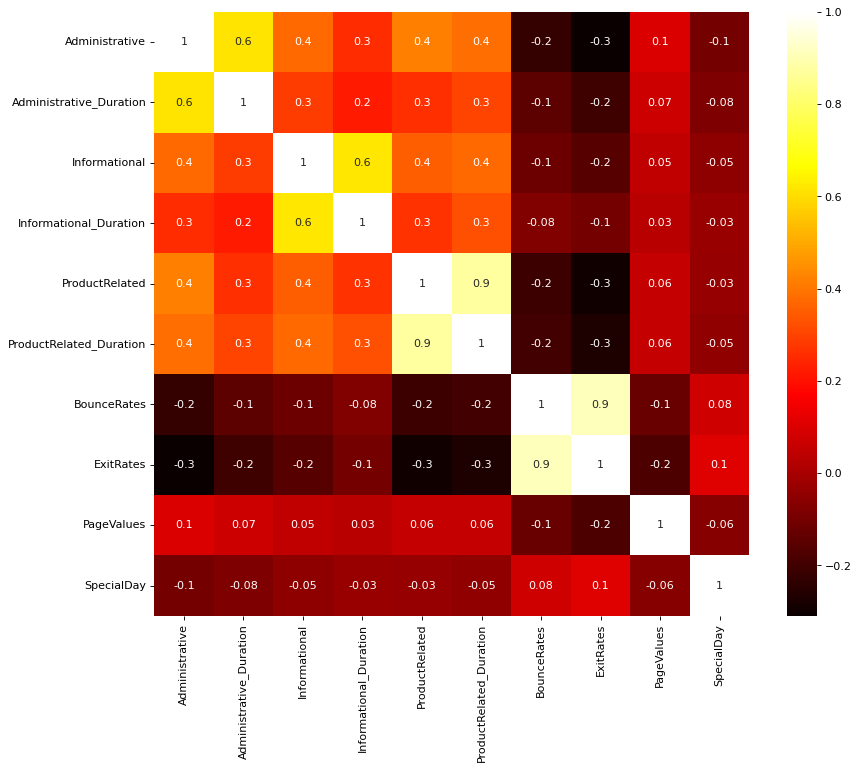

In [ ]:
# Correlation matrix
correlation_data = separate_data.corr()

# Plot the matrix using seaborn
figure(figsize = (12,10), dpi=80)
sns.heatmap(correlation_data, annot=True, fmt='.1g', cmap='hot')

From the correlation matrix we can see that most of the variables are not correlated between each other except for some of them. In detail for the positive correlation:

- ProductRelated_Duration is correlated with ProductRelated (correlation index = 0.9)

- Administrative_Duration is correlated with Administrative (correlation index = 0.6)

- Informational_Duration is correlated with Informational (correlation index = 0.6)

Looking specifically to ExitRates, our target variable, we can see that:

- There is a high correlation with BouncesRates (correlation index = 0.9)

- There is a slightly positive correlation with Special Day (correlation index = 0.1) 

While for the negative correlation of ExitRates:
     
- ExitRates and Administrative (correlation index = - 0.3), 
     
- ExitRates and Administrative_Duration (correlation index = - 0.2),
     
- ExitRates and Informational (correlation index = - 0.2),
     
- ExitRates and Informational_Duration (correlation index = - 0.1),
     
- ExitRates and Product Related (correlation index = - 0.3),
     
- ExitRates and ProductRelated_Duration (correlation index = - 0.3),
     
- ExitRates and PageValues (correlation index = - 0.2).

Then, from it, it is created the X matrix (all the observations) and the y vector (all the outputs)

In [ ]:
# X, a matrix that contains all the obsevations for each predictor
X_fetures = train_data.drop(['ExitRates'], axis = 1).columns
X = train_data[X_fetures].to_numpy()  
print('X is a matrix of dimentions {}'.format(X.shape)) # (6418, 45)
      
# y, a vector of the outputs
y = train_data['ExitRates'].to_numpy()  
print('y is a vector of dimentions {}'.format(y.shape)) # (6418,)


X is a matrix of dimentions (6418, 45)
y is a vector of dimentions (6418,)


## 1.6 - SPLIT OF THE DATA INTO TRAIN SET AND TEST SET

Before fitting a linear model on the data, it is essential to split the data without null values into two sets: a training set and a validation set. 

This is a critical step because it allows us to tune the model parameters using the **training set** and then evaluate the model's performance on the **validation set**, which contains data that the model has not seen during training. This separation helps us understand how well the model generalizes to new, unseen data.

Even with a perfect model that is trained infinitely on a vast amount of data, there will always be an error when applied to a validation set. This inherent error is called the additive noise (𝜖) and is independent of the variables we observe. It represents the _irreducible error_, meaning we cannot eliminate it regardless of the complexity of the model.

However, what we can aim to minimize is the error that depends on the model we choose, referred to as the _reducible error_. This is achieved by selecting the appropriate model and optimizing its parameters based on the training set.

$$
\mathbb{E}[(y-\hat{y})^{2}]=\mathbb{E}[(f(\mathbf{x})+\epsilon-\hat{f}(\mathbf{x}))^{2}]
=\underbrace{\mathbb{E}[f(\mathbf{x})-\hat{f}(\mathbf{x})]^{2}}_{\text {Reducible }}+\underbrace{\operatorname{Var}(\epsilon)}_{\text {Irreducible }}
$$

Since our goal is to obtain the best model to predict the missing values in ExitRates, it is important to also consider the **bias-variance tradeoff**, a fundamental concept that plays a crucial role in model selection: it refers to the tradeoff between the model's bias and variance that may lead to either underfitting or overfitting new data.

   - **Bias** High bias occurs when a model is too simple and fails to capture the underlying patterns in the data. As a result, the model may not perform well on both the training and validation sets.
   - **Variance**: High variance occurs when a model is too complex and fits the training data too closely, capturing noise and random fluctuations. Such a model may perform exceptionally well on the training set but poorly on the validation set.

For example, when we were preparing our data for the analysis we performed some "simplification" of the categorical variables (such as Browser, TrafficType, Region exc.) in which we grouped together groups that had a low count. This action was designed to make sure that, when we turned them into qualitative predictors, the number of new variables would be as limited as possible. Infact, the variance element of the expected error of a Linear models directly proportional to the number of variables present - therefore, removing not useful variables will also lower the variance!

$$
\frac{1}{N} \sum_{i=1}^{N}Err(x_i) = \sigma^2 + \frac{1}{N} \sum_{i=1}^{N} \left[ f(x_i) - \mathbb{E} \hat{f}(x_i) \right]^2 + \frac{p}{N} \sigma^2
$$

Concluding, our goal is to **strike a balance between bias and variance to achieve the best model performance on new, unseen data**. This can be achieved through techniques like cross-validation, regularization, and hyperparameter tuning.

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the size and the seed for the validation set
osd_valid_size = 0.3
osd_valid_seed = 42

# Split X and y into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                  y, 
                                                  test_size = osd_valid_size, 
                                                  random_state = osd_valid_seed)

print("The dimension of X_train are:", X_train.shape)
print("The dimension of X_valid are:", X_valid.shape)

The dimension of X_train are: (4492, 45)
The dimension of X_valid are: (1926, 45)


## 1.7 - MULTIVARIATE LINEAR MODEL

As the first linear model to predict the Null Values present in the variable ExitRates, we used a multivariate linear model, which is a model that is _linear in both the parameters (𝛽) and the coefficients (x)_. 

At the beginning the complete model, which is a model that includes all of the 46 predictors of our dataframe, was **trained on the train set** and **evaluated on the validation set** that we previously created.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X_train, y_train)          # 2- model fitting
y_predict_valid = model.predict(X_valid)         # 3- prediction
y_predict_train = model.predict(X_train)


# Calculating the R2 score and the MSE score for the model on the train data
print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))
print("------------------------------------------")
# Calculating the R2 score and the MSE score for the model on the validation data
print("Valid R2 score ", r2_score(y_valid, y_predict_valid))
print("Valid MSE score ", mean_squared_error(y_valid, y_predict_valid))

Train R2 score  0.8658033347801896
Train MSE score  0.00031712290768078305
------------------------------------------
Valid R2 score  0.8525845928513635
Valid MSE score  0.0003173594190471072


From the results we can see that, the R^2 scores on the train and validation data are really high (0.866 and 0.852 respectively) and also the MSE scores on the train and validation data are really low (0.0003171 and 0.0003173 respectively). So we can say that the complete model performs slightly better on the test set (validation set) with respect to the train set.

These are the performances of the complete model (with all the 45 features), so we decide to look more in detail at the values of the coefficients to do an initial and quick analysis on which could be the most relevant features:

In [ ]:
for idx, col_name in enumerate(X_fetures):
    print("The coefficient for {} is {:0.10f}".format(col_name, model.coef_[idx]))
print("------------------------")
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for Administrative is -0.0008668048
The coefficient for Administrative_Duration is -0.0000031056
The coefficient for Informational is -0.0000262271
The coefficient for Informational_Duration is -0.0000005017
The coefficient for ProductRelated is -0.0001116577
The coefficient for ProductRelated_Duration is 0.0000004555
The coefficient for BounceRates is 0.8570029186
The coefficient for PageValues is -0.0000972031
The coefficient for SpecialDay is 0.0063247094
The coefficient for Weekend is -0.0005908871
The coefficient for Revenue is -0.0038387277
The coefficient for Fiscal_quarters_1 is -0.0007825047
The coefficient for Fiscal_quarters_2 is 0.0004907459
The coefficient for Fiscal_quarters_3 is -0.0001775274
The coefficient for Fiscal_quarters_4 is 0.0004692861
The coefficient for OperatingSystems_1 is -0.0003656470
The coefficient for OperatingSystems_2 is 0.0015611500
The coefficient for OperatingSystems_3 is -0.0021714032
The coefficient for OperatingSystems_Other_OP 

We can see that some of the coefficients associated to the variables are close to 0, while others are not. To analyse more in detail, we decided to perform an F-test on a subset of predictors to see if at least one of the coefficients associated to these predictors was not equal to 0. We perform an F-test instead of a T-test because the model that we were analysing was a multivariate linear regression, so we had more than two coeffients to test at the same time.

To perform the test it was necessary first to define different functions needed to calculate the F-statistics:

In [ ]:
from scipy.stats import t, f

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    # Helper function that uses scikit-learn models
    # and behaves as the function we implemented in
    # Lab02.01
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
 
# H0: all features in the subset are equal to 0    
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

For the F-test we used a threshold equal to 0.001. We performed a restricted F test on specific variables that were correlated to ExitRates.

In [ ]:
#Define the threshold
alpha = 0.001

# The Ftest_restricted function expect an input data that is a Pandas
# array (since it will use strings to select the restricted model's features)

# However X_train is a numpy array. Let's convert it back to Pandas
X_train_pd = pd.DataFrame(X_train, columns = X_fetures)
y_train_pd = pd.DataFrame(y_train)

features = ['Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates']
p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
print("------------------------------------------")
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")

p-value = 0.0
F-stat = 4093.548906582791
------------------------------------------
Reject H0: There evidence to say that at least one of the S features is useful


From the reults we can see that the F-Statistics is really high and above 1 so this means that we can reject the H0 (Null Hypothesis) and say that at least one of the features analysed is useful for the prediction. Even though the F-test gave us this output, we were not able to say yet which are the features that are really useful and which ones are not.

To decide which were the useful features, different feature selection algorithms (subset Selection, Shrinkage), with different evaluation methods were used. 

### FEATURE SELECTION AND MODEL SELECTION

Before doing model selection, we have to do feature selection. So we have to select for each level of complexity, depending on the number of predictors included in the model, the best model:

    - best model with 0 predictor included in the model (base model - only one model)
    - best model with 1 predictor included in the model (1° level of complexity)
    - best model with 2 predictors included in the model (2° level of complexity)
      .
      .
      .
    - best model with p predictors inclued in the model (p° level of complexity full model - only one model)
    
For each level of complexity the R^2 score or MSE can be used to assess what is the best model. After this step, we will be able to do MODEL SELECTION and to select the overall best model across all the ones that we selected with feature selection.

To perform feature selection there are different methods:

#### BEST SUBSET SELECTION
This type of feature selction fits a least squares regression for any possible input combination. So for each level of complexity (different numbers of predictors) it finds what is the best absolute combination of predictors. Even though with this type of feature selction we would have obtained the best absolute models for each level of complexity, this algorithm has a problem:
   
    A total of 2^p models (with p equals to the total number of variables) need to be compared. So it is computationally heavy (specifically in our case with a total of 59 variables) and is really slow.
    
   **For this reason it was decided to use other algorithm to perform feature selection.**

#### FORWARD STEPWISE FEATURE SELECTION

The Forward Stepwise feature selection is a computationally efficient algorithm that starts from the empty model with no predictors and it adds one predictor at the time until it reaches the complete model (with all the predictors, in our case 47 predictors). At each stage adds the "most improving" variable. This algorithm has two main differences with respect to the best subset selection:
   
   - The first difference is that, the forward stepwise feature selection is a greedy algorithm. Indeed it doesn't "reconsider" its choices and might result in a suboptimal subset. In particular, looking at a comparison for the first stages.
    
           1) the first step of the forward selection and of the best subset selection are the same. They start from the base model and add the first best predictors for the model of complexity one
        
           2) In the second step and in all the others, the best subset will "reconsider" all the possible combination of predictors to find which is the best one for a specific level of complexity. Instead the forward selection considers only the combination between a new predictor and all predictors present in the previous models(that's why it is called 'greedy') 
     
   - The second difference is related to the process previusly explained. Indeed the forward stepwise feature selection has to consider less combinations and so it is much faster than the best subset selection. 
        
        
#### BACKWARD STEPWISE FEATURE SELECTION

The Backward Stepwise Feature Selection is another computationally efficient algorithm which starts from the model having all predictors and at each 'stage' removes the least useful variable. The algorithm is very similar to the one of the FORWARD STEPWISE FEATURE SELECTION but it works in the different direction (complete model -> base model).

#### At the end we chose to use the FORWARD STEPWISE FEATURE SELECTION because it is a fast and efficient algorithm even though it is a greedy. We prefered this algorithm over the BACKWARD STEPWISE FEATURE SELECTION because our aim was to find the best model with not too many predictors.

N.B. To properly apply this type of feature selection, we have to transform the data (currently numpy arrays) into pandas dataframe as shown below.

In [ ]:
# Transforming the X_train matrix into a panda data frame
X_train_pd = pd.DataFrame(X_train, columns=X_fetures)

# Transforming the X_valid matrix into a panda data frame
X_valid_pd = pd.DataFrame(X_valid, columns=X_fetures)

In [ ]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim) # list of list of names [[name of first candidate, ...], [...]]
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

In [ ]:
# THIS FUCNTION GETS THE MODEL AS THE INPUT, THE IT FITS THE MODEL AND THEN WE GET THE SCORE OF THE MODEL TRAINED ON THE DATA
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator 

In [ ]:
from sklearn.metrics import mean_squared_error

from scipy.stats import t, f

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def estimate_sigma(X_train_pd, y_train):
    # Sigma is usually estimated using the model with all features
    n, p = X_train_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_pd, y_train)
    y_pred = model.predict(X_train_pd)
    RSS = rss(y_pred, y_train)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

from sklearn.metrics import mean_squared_error

def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

In [ ]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

In [ ]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []  # <------ !! We keep track of selected features !!
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    #!! The loop condition is slightly changed
    #!! How many iterations we need to perform?
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Given the previous Mk model, test remaining
        # features and select the one providing the best
        # performance increment
        # ===============================================
        remaining_features = Xtrain_pd.columns.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate in (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        #!!! Update selected feature
        # ==========================
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score_test = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score_test)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

Up to this point, the code written for the algorithm of the forward stepwise features selection is used to find the best model for each level of complexity according to RSS and R^2. To understand what is the best overall model, among each level of complexity, different approches were used. 
 - The first apporch was to use specific indexes to estimate the test error of the models. The indexed used are Mallow CP, Akaike information Criterion, Bayesian Information Criterion (they all have a strong statistical background).
 - The second way, to evaluate which was the best model, was to use cross validation. With cross validation, instead of estimating the test error, we can directly use part of your data as new data/test data and estimate the error on this part of the data.

#### - FORWARD FEATURE SELECTION EVALUATED WITH MALLOW CP

The Mallow CP is an index that was used to evaluate the best multivariate linear model. As like other indexes (Akaike Information Criterion and Bayesian Information Criterion) it has a strong statistical background.
For the Mallow CP, the test error is estimated as a combination of the RSS and of a new term. This new term depends on the degree of freedom (number of parameters used in the model) and on the estimate of the variance associated to the complete model. At the end this combination is divided by n (number of observations).

N.B. The new term (given by the deegree of freedom and by the estimate of the variance of the complete model) divided by n, rappresents the VARIANCE of our model.

Below it is written the formula of the index:

$$
C_p = \frac{1}{n}(RSS + 2d\hat{\sigma}^2)
$$


In [ ]:
# Formula transcribed into code of the Mallow CP index
def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

............
Best model (M0) with 1 features: ['BounceRates']
M0 subset score (3.): 0.0003877675897910175
............
Best model (M1) with 2 features: ['BounceRates', 'Administrative']
M1 subset score (3.): 0.00035887634971241197
............
Best model (M2) with 3 features: ['BounceRates', 'Administrative', 'ProductRelated']
M2 subset score (3.): 0.000348305675268811
............
Best model (M3) with 4 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor']
M3 subset score (3.): 0.0003365781228400321
............
Best model (M4) with 5 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues']
M4 subset score (3.): 0.0003303052546825916
............
Best model (M5) with 6 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2']
M5 subset score (3.): 0.00032718618076279225
............
Best model (M6) with 7 features: ['BounceRates', 'Administrati

............
Best model (M26) with 27 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5']
M26 subset score (3.): 0.0003211540188879905
............
Best model (M27) with 28 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'R

............
Best model (M41) with 42 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3', 'Browser_5', 'Region_6', 'Browser_Other_Br', 'TrafficType_13', 'TrafficType_1', 'Region_9', 'Informational_Duration', 'Region_1', 'Browser_1', 'Informational', 'Fiscal_quarters_2', 'Browser_2', 'Fiscal_quarters_4', 'OperatingSystems_Other_OP']
M41 subset score (3.): 0.00032311308628325347
............
Best model (M42) with 43 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingS

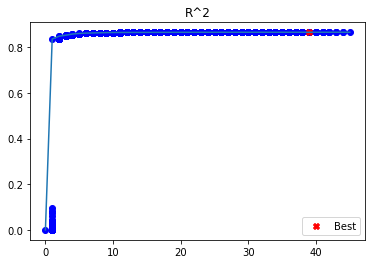

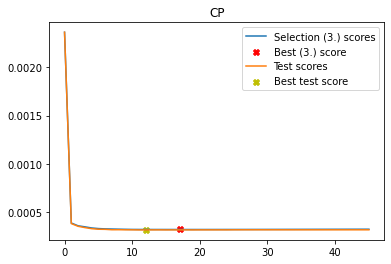

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

sigma = estimate_sigma(X_train, y_train)
forward_selection(X_train_pd, y_train, X_valid_pd, y_valid,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  # Evaluating the models with Mellow Cp, Akaike Information Criterion and Bayesian Information Criterion
                  get_evaluator(get_sigma_scorer(cp, sigma)), np.argmin,
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name= "CP",
                  verbose=True)

By using the Mallow CP we can see that the best model is the one with 17 features.
The features are:

- BounceRates
> This is the first variable added by the algorithm to the first model and kept also for all the others (because the forward feature selection is a greedy algorithm). It is probably the first one added because it has a very high correlation index (0.9) with ExitRates.
- Administrative
> As we can see, we found only the variable Administrative and not Administrative_Duration even though they have very similar correlation indexes (respectively -0.3 and -0.2) with ExitRates. This is probably due to the fact that alos, as said at the beginning, Administrative and Administrative_Duration positive correlated (0.6) so just by using the variable Administrative in the model we also take in account the information coming from Administrative_Duration.
- ProductRelated
- VisitorType_New_Visitor
- PageValues
- TrafficType_2
- OperatingSystems_2
- Revenue
- TrafficType_4
- SpecialDay
- OperatingSystems_3
- TrafficType_Other_TrTy
- Region_7
- Fiscal_quarters_1
- TrafficType_10
- TrafficType_6
- TrafficType_8

We decided to look at the performance of this model with these features:

In [ ]:
CP_features = ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8']
X_CP = train_data[CP_features].to_numpy()
X_train_CP, X_valid_CP, y_train_CP, y_valid_CP = train_test_split(X_CP, y,
                                                                test_size = osd_valid_size, 
                                                                random_state = osd_valid_seed)

model_CP = LinearRegression()                       # 1- hyperparams selection
model_CP = model.fit(X_train_CP, y_train)           # 2- model fitting
y_predict_valid_CP = model.predict(X_valid_CP)        # 3- prediction
y_predict_train_CP = model.predict(X_train_CP)


print("Train R2 score ", r2_score(y_train, y_predict_train_CP))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_CP))
print("------------------------------------------")
print("Valid R2 score ", r2_score(y_valid, y_predict_valid_CP))
print("Valid MSE score ", mean_squared_error(y_valid, y_predict_valid_CP))

Train R2 score  0.8653480181860324
Train MSE score  0.00031819887571633685
------------------------------------------
Valid R2 score  0.8530187067548529
Valid MSE score  0.00031642484823882824


From the results we can see that the model performs slightly better on the train data (R^2 =  0.865) with respect to the train data (R^2 = 0.853).

#### - FORWARD FEATURE SELECTION EVALUATED WITH AKAIKE INFORMATION CRITERION

The Akaike Information Criterion is the second index that was used to evaluate the best multivariate linear model. It is very similar to the Mallow CP. Indeed the test error is again estimated as a combination of the RSS and the same term seen for the Mallow CP (given by the degree of freedom and by the estimate of the variance of the complete model). The main difference is that this combination is divided, not only by the number of observations (n) but also by the estimate of the variance of the complete model as written in the formula below:

$$
AIC = \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2)
$$

In [ ]:
# Formula transcribed into code of the Akaike Information Criterion index
def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

............
Best model (M0) with 1 features: ['BounceRates']
M0 subset score (3.): 1.2105180630983856
............
Best model (M1) with 2 features: ['BounceRates', 'Administrative']
M1 subset score (3.): 1.120326492422475
............
Best model (M2) with 3 features: ['BounceRates', 'Administrative', 'ProductRelated']
M2 subset score (3.): 1.0873273643622685
............
Best model (M3) with 4 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor']
M3 subset score (3.): 1.0507167387588725
............
Best model (M4) with 5 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues']
M4 subset score (3.): 1.0311343383418887
............
Best model (M5) with 6 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2']
M5 subset score (3.): 1.0213973324149852
............
Best model (M6) with 7 features: ['BounceRates', 'Administrative', 'ProductRelated

............
Best model (M27) with 28 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3']
M27 subset score (3.): 1.002877437771696
............
Best model (M28) with 29 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4

............
Best model (M40) with 41 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3', 'Browser_5', 'Region_6', 'Browser_Other_Br', 'TrafficType_13', 'TrafficType_1', 'Region_9', 'Informational_Duration', 'Region_1', 'Browser_1', 'Informational', 'Fiscal_quarters_2', 'Browser_2', 'Fiscal_quarters_4']
M40 subset score (3.): 1.0082368655387353
............
Best model (M41) with 42 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue

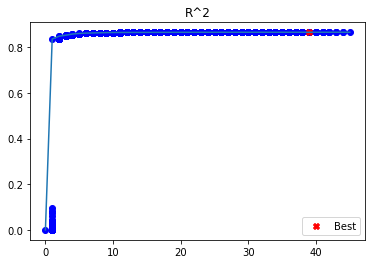

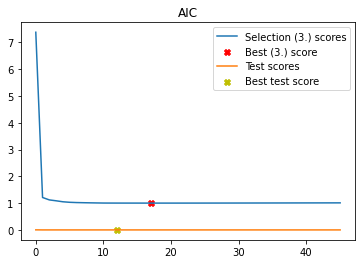

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

sigma = estimate_sigma(X_train, y_train)

forward_selection(X_train_pd, y_train, X_valid_pd, y_valid,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  # Evaluating the models with Mellow Cp, Akaike Information Criterion and Bayesan Information Criterion
                  get_evaluator(get_sigma_scorer(aic, sigma)), np.argmin,
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name= "AIC",
                  verbose=True)

By using the Akaike Information Criterion we can see that the best model is again the one with 17 features. 

The features are:
- BounceRates
- Administrative
- ProductRelated
- VisitorType_New_Visitor
- PageValues
- TrafficType_2
- OperatingSystems_2
- Revenue
- TrafficType_4
- SpecialDay
- OperatingSystems_3
- TrafficType_Other_TrTy
- Region_7
- Fiscal_quarters_1
- TrafficType_10
- TrafficType_6
- TrafficType_8

This is the same model with the same features that it was obtained by using the Mallow CP index. We were expecting this result because the Akaike Information Criterion is proportional to the Mallow CP. So since it was the same model, we didn't check again the performances.

#### - FORWARD FEATURE SELECTION EVALUATED WITH BAYESIAN INFORMATION CRITERION

The Bayesian Information Criterion is the third and last index used to evaluate the best model. Again it is very similar to the Mallow CP but more stringent. The main difference is given by the fact that the new term added to the RSS is multiplied by the logaritm of the number of observations, due to the fact that it takes into account the number of observations (n) it gives heavier penalty on models with many variables, and this is the reason that makes us say that we expect a lower number of features. Below is written the formula of this index:

$$
BIC = \frac{1}{n}(RSS + \log(n)d\hat{\sigma}^2)
$$

In [ ]:
def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

............
Best model (M0) with 1 features: ['BounceRates']
M0 subset score (3.): 1.2119450562675436
............
Best model (M1) with 2 features: ['BounceRates', 'Administrative']
M1 subset score (3.): 1.1231804787607915
............
Best model (M2) with 3 features: ['BounceRates', 'Administrative', 'ProductRelated']
M2 subset score (3.): 1.0916083438697428
............
Best model (M3) with 4 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor']
M3 subset score (3.): 1.056424711435505
............
Best model (M4) with 5 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues']
M4 subset score (3.): 1.0382693041876794
............
Best model (M5) with 6 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2']
M5 subset score (3.): 1.029959291429934
............
Best model (M6) with 7 features: ['BounceRates', 'Administrative', 'ProductRelated'

............
Best model (M28) with 29 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3', 'Browser_5']
M28 subset score (3.): 1.0445768676539193
............
Best model (M29) with 30 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Durati

Best model (M42) with 43 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3', 'Browser_5', 'Region_6', 'Browser_Other_Br', 'TrafficType_13', 'TrafficType_1', 'Region_9', 'Informational_Duration', 'Region_1', 'Browser_1', 'Informational', 'Fiscal_quarters_2', 'Browser_2', 'Fiscal_quarters_4', 'OperatingSystems_Other_OP', 'Region_3']
M42 subset score (3.): 1.0704880437626687
............
Best model (M43) with 44 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystem

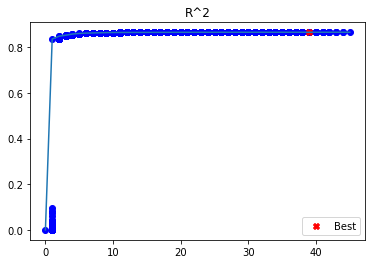

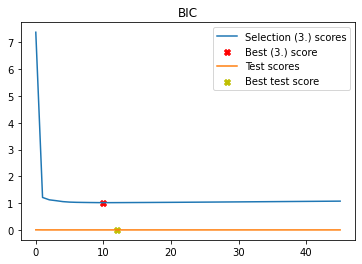

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

sigma = estimate_sigma(X_train, y_train)

forward_selection(X_train_pd, y_train, X_valid_pd, y_valid,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  # Evaluating the models with Mellow Cp, Akaike Information Criterion and Bayesan Information Criterion
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin,
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name= "BIC",
                  verbose=True)

By using the Byesian Information Criterion we can see that the best model is the one with 10 features and they are the following:

- BounceRates
- Administrative
- ProductRelated
- VisitorType_New_Visitor
- PageValues
- TrafficType_2
- OperatingSystems_2
- SpecialDay
- Revenue
- TrafficType_4

In this case we got that the best model had less features with respect, for example, to the model that we got by using Mallow CP. This was expected because the Bayesian Information Criterion is more stringent than the Mallow CP. We looked again at the performances of the model.

In [ ]:
BIC_features = ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4']
X_BIC = train_data[BIC_features].to_numpy()
X_train_BIC, X_valid_BIC, y_train_BIC, y_valid_BIC = train_test_split(X_BIC, y,
                                                                test_size = osd_valid_size, 
                                                                random_state = osd_valid_seed)

model_BIC = LinearRegression()                        # 1- hyperparams selection
model_BIC = model_BIC.fit(X_train_BIC, y_train)           # 2- model fitting
y_predict_valid_BIC = model_BIC.predict(X_valid_BIC)        # 3- prediction
y_predict_train_BIC = model_BIC.predict(X_train_BIC)


print("Train R2 score ", r2_score(y_train, y_predict_train_BIC))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_BIC))
print("------------------------------------------")
print("Valid R2 score ", r2_score(y_valid, y_predict_valid_BIC))
print("Valid MSE score ", mean_squared_error(y_valid, y_predict_valid_BIC))

Train R2 score  0.8646092591707949
Train MSE score  0.0003199446523837657
------------------------------------------
Valid R2 score  0.8527125999989941
Valid MSE score  0.00031708384219397034


As with the other models, the model obtained by evluation with BIC had a slightly better performances on the train data (R^2 =  0.864) with respect to the validation data (R^2 = 0.852).

#### - FORWARD FEATURE SELECTION EVALUATED WITH CROSS VALIDATION

There are different type of cross validation (ex. hold out set, leave one out set, ecc) and in the end we decided to use a k-fold cross validation with k = 10. 

#### Why did we used the k-folds cross validation?

   - The main reason of this decision is that in this way we were able to avoid any bias related to the division of the data in training/validation and test data. Indeed, with k-fold cross validation, the data are divided in k folds and each single model is trained on k - 1 different folds each time for k times (the fold that is not used for the train, is used as the test set).
       
       
   - The other reason is that we have enough data to use this technique. This is an important point because if the data are too few then we cannot use this type of cross validation.

............
Best model (M0) with 1 features: ['BounceRates']
M0 subset score (3.): 0.8334905831224078
............
Best model (M1) with 2 features: ['BounceRates', 'Administrative']
M1 subset score (3.): 0.8458475810428467
............
Best model (M2) with 3 features: ['BounceRates', 'Administrative', 'ProductRelated']
M2 subset score (3.): 0.8502939909343781
............
Best model (M3) with 4 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor']
M3 subset score (3.): 0.8554227530461098
............
Best model (M4) with 5 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues']
M4 subset score (3.): 0.8582228904134481
............
Best model (M5) with 6 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2']
M5 subset score (3.): 0.8596517364636925
............
Best model (M6) with 7 features: ['BounceRates', 'Administrative', 'ProductRelate

............
Best model (M27) with 28 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3']
M27 subset score (3.): 0.86197579569638
............
Best model (M28) with 29 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4'

............
Best model (M40) with 41 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4', 'Region_2', 'Region_8', 'OperatingSystems_1', 'Weekend', 'TrafficType_3', 'Browser_4', 'Region_5', 'Fiscal_quarters_3', 'Browser_5', 'Region_6', 'Browser_Other_Br', 'TrafficType_13', 'TrafficType_1', 'Region_9', 'Informational_Duration', 'Region_1', 'Browser_1', 'Informational', 'Fiscal_quarters_2', 'Browser_2', 'Fiscal_quarters_4']
M40 subset score (3.): 0.8614156305969107
............
Best model (M41) with 42 features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue

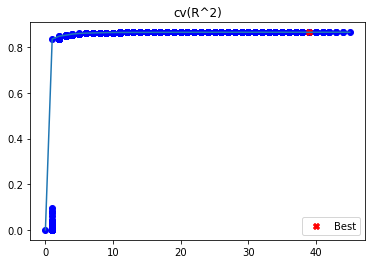

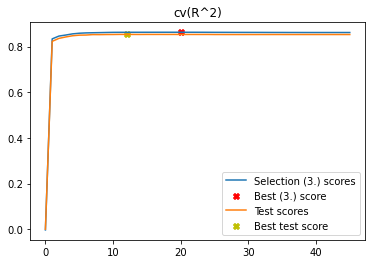

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def get_val_evaluator(scorer, val_size=0.3):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state= 42)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator


cv = 10
sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_valid_pd, y_valid,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  # Use either 5-fold CV or (1-fold cross) validation to 
                  # estimate the test R^2 error at step (3.) of the algorithm
                  get_cv_evaluator(make_scorer(r2_score), cv=cv), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

The model obtained after the evaaluation with cross-validation had 20 features:

- BounceRates
- Administrative
- ProductRelated
- VisitorType_New_Visitor
- PageValues
- TrafficType_2
- OperatingSystems_2
- SpecialDay
- Revenue
- TrafficType_4
- OperatingSystems_3
- Region_7
- TrafficType_10
- TrafficType_6
- TrafficType_Other_TrTy
- Fiscal_quarters_1
- TrafficType_8
- Administrative_Duration
- ProductRelated_Duration
- Region_4

The first 10 features are the same ones that were included in the best model evaluated with BIC. The remaining ones are the same ones that were also included in the model evaluated with the Mallow CP or AIC (since we got the same model). We evaluated the perfromance of this model:

In [ ]:
CV_features = ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'Revenue', 'TrafficType_4', 'OperatingSystems_3', 'Region_7', 'TrafficType_10', 'TrafficType_6', 'TrafficType_Other_TrTy', 'Fiscal_quarters_1', 'TrafficType_8', 'Administrative_Duration', 'ProductRelated_Duration', 'Region_4']
X_CV = train_data[CV_features].to_numpy()
X_train_CV, X_valid_CV, y_train_CV, y_valid_CV = train_test_split(X_CV, y,
                                                                test_size = osd_valid_size, 
                                                                random_state = osd_valid_seed)

model_CV = LinearRegression()                          # 1- hyperparams selection
model_CV = model_CV.fit(X_train_CV, y_train)           # 2- model fitting
y_predict_valid_CV = model_CV.predict(X_valid_CV)        # 3- prediction
y_predict_train_CV = model_CV.predict(X_train_CV)


print("Train R2 score ", r2_score(y_train, y_predict_train_CV))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_CV))
print("------------------------------------------")
print("Valid R2 score ", r2_score(y_valid, y_predict_valid_CV))
print("Valid MSE score ", mean_squared_error(y_valid, y_predict_valid_CV))

Train R2 score  0.8655149919237737
Train MSE score  0.0003178042966324816
------------------------------------------
Valid R2 score  0.8528370972620246
Valid MSE score  0.0003168158215044606


The model obtained by evaluation with cross-validation had a slightly better performances on the train data (R^2 =  0.865) with respect to the validation data (R^2 = 0.852).

#### IN THE END, WHAT IS IT THE BEST MODEL?

As seen before, all the models obtained from the different evaluation methods had very similar performances (usually they had slightly better performances on the training data with respect to the validation data). Even though the performances were similar, the number of features inclueded in each model was different, indeed all the models had different complexity.

Regarding the features, more in detail:
   - The first 11 features were the same in all the models. This means that these must be the most important features to predict the output (ExitRates).
   - In the model evaluated with cross validation, the remaining features were also included in the models evaluated with indexes like MallowCP and AIC.
   
By keeping this in mind, we also have to remember that Mallow CP, Akaike Information Criterion and Bayesian Information Criterion are all reliable indexes but, still an estimation based on the RSS and other different term. While the cross validation is a methods that evaluates the model on a part of the data that is not used for the fitting of the model (so almost like this part is completly new data).

Because of all of these reason we decided that the best linear regressor of grade 1 to predict ExitRates, was the one evaluated with **cross validation**.

## 1.8 - POLYNOMIAL REGRESSION

After finding the best linear model (linear in the parameters but also in the coefficients), we also wanted to look if there were models of higher grades with better performaces. Therefore, since up to this point only models of grade 1 were considered, this part of the analysis will focus instead on model with grade higher than 1, for example 2 or 3.

The analysis was done by using again 10-folds cross validation. We took into consideration polynomial linear models of grade 1, 2, 3. We tried to also find the best polynomial linear model of grade 4 but, probably because of the large number of predictors, the algorithm couldn't converge. This is the main reason why only polinomial linear models up to grade 3 were considered for this analysis.

Below you can see all the passages:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score, greater_is_better=True)

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,4))}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5, refit=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]},
             scoring=make_scorer(r2_score))

In [ ]:
pd.DataFrame(cv.cv_results_)
# Retrieve the best **trained** estimator
cv.best_estimator_
# Retrieve the best **CV** score
# I.e., mean of the scores on each fold
cv.best_score_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007689      0.000245         0.001004        0.000014   
1       0.547105      0.038865         0.012088        0.004010   
2      46.246433      6.020048         0.187327        0.029648   

  param_poly__degree               params  split0_test_score  \
0                  1  {'poly__degree': 1}       8.771637e-01   
1                  2  {'poly__degree': 2}       8.632006e-01   
2                  3  {'poly__degree': 3}      -2.667775e+06   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       8.440441e-01       8.850664e-01       8.460826e-01       8.549493e-01   
1       8.326734e-01       8.562813e-01       7.919452e-01       8.454668e-01   
2      -4.784338e+06      -2.711897e+06      -1.657252e+07      -2.739210e+06   

   mean_test_score  std_test_score  rank_test_score  
0     8.614612e-01    1.664953e-02                1  
1     8.379135e-01    2.519687e-02                2  
2    -5.895147e+06    5.399057e+06                3

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('linear', LinearRegression())])

0.861461217435056

In [ ]:
model_poly = cv.best_estimator_
y_predict = model_poly.predict(X_valid)
valid_score = r2_score(y_valid, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Valid score:", valid_score)

Best degree: 1
Train score: 0.861461217435056
Valid score: 0.8525845928513635


At the end the best model is the one with grade 1. 

The fact that model of grade 1 was better than models with higher grades (polynomial linear models) confirmed us that the assumption regarding the linearity of our data holds. Indeed if we checked, for the multivariate linear model (grade 1) the plot of the residuals versus predicted values, we should have seen all the residuals distributed around 0 without any specific patterns (this means an error with mean 0 and constant variance).

After this last check, we used the selected model to predict the null values present in the ExitRates variables on the train and test data.

## 1.9 - FILLING THE NULL VALUES ON THE TRAIN SET AND ON THE TEST SET

We selected the best model that was previously decided to predict the Null Values:

In [ ]:
# Select the best model and the features of that model
best_features = CV_features
best_model = model_CV

### ON THE TRAINING SET

Before doing the operation, we copied the original train data, as you can see below:

In [ ]:
train_data_full = original_train_data.copy()

**1) SEPARATE THE NULL VALUES FROM THE ORIGINAL TRAIN DATA**

In [ ]:
null_data_training = original_train_data[original_train_data['ExitRates'].isnull()]

**2) PREDICTION OF THE NULL VALUES**

In [ ]:
selected_variables_training = null_data_training[best_features].to_numpy()

# We used the function clip to limit the predicted values because ExitRates is a percentage (so all the values should be bounded between 0 and 1)
predicted_values_train = np.clip(best_model.predict(selected_variables_training), 0, 1)

**3) FILLING THE NULL VALUES WITH THE PREDICTED DATA**

In [ ]:
train_data_full.loc[train_data_full['ExitRates'].isna(), 'ExitRates'] = predicted_values_train
train_data_full.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               5               158.700000              0   
2               7                87.916667              1   
3               1                 4.000000              0   
4               2               132.400000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               5                19.000000   
1                     0.0              51              1364.266667   
2                     0.0              46              1621.025379   
3                     0.0              37              1296.942857   
4                     0.0              11               296.300000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Region_7  Region_8  \
0     0.000000   0.080000    0.000000         0.6  ...       0.0       0.0   
1     0.007692   0.011987    0.000000         0.0  ...       0.0       0.0   
2     0.004082   0.020544    6.023523         0.0  ...       0.0       0.0   
3     0.013889   0.041645    0.000000         0.8  ...       0.0       0.0   
4     0.000000   0.018886    0.000000         0.0  ...       0.0       0.0   

   Region_9  Browser_1  Browser_2  Browser_4  Browser_5  Browser_Other_Br  \
0       0.0        0.0        1.0        0.0        0.0               0.0   
1       0.0        0.0        1.0        0.0        0.0               0.0   
2       0.0        1.0        0.0        0.0        0.0               0.0   
3       0.0        0.0        1.0        0.0        0.0               0.0   
4       0.0        0.0        0.0        1.0        0.0               0.0   

   VisitorType_New_Visitor  VisitorType_Returning_Visitor  
0                      0.0                            1.0  
1                      0.0                            1.0  
2                      0.0                            1.0  
3                      0.0                            1.0  
4                      1.0                            0.0  

[5 rows x 46 columns]

### ON THE TEST SET

Before doing the operation, we copied the original train data, as you can see below:

In [ ]:
test_data_full = original_test_data.copy()

**1) SEPARATE THE NULL VALUES FROM THE ORIGINAL TEST DATA**

In [ ]:
null_data_test = original_test_data[original_test_data['ExitRates'].isnull()]

**2) PREDICTION OF THE NULL VALUES**

In [ ]:
selected_variables_test = null_data_test[best_features].to_numpy()
# As said before, we are prediciting values that are percentages so they should be bounded between 0 and 1
predicted_values_test = np.clip(best_model.predict(selected_variables_test), 0, 1)

**3) FILLING THE NULL VALUES WITH THE PREDICTED DATA**

In [ ]:
test_data_full.loc[test_data_full['ExitRates'].isna(), 'ExitRates'] = predicted_values_test
test_data_full.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 2.666667   
2                     0.0              19               154.216667   
3                     0.0               7               280.500000   
4                     0.0               2                68.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Region_7  Region_8  \
0     0.200000   0.203825         0.0         0.0  ...       0.0       0.0   
1     0.050000   0.067753         0.0         0.0  ...       0.0       0.0   
2     0.015789   0.024561         0.0         0.0  ...       0.0       0.0   
3     0.000000   0.028571         0.0         0.0  ...       0.0       0.0   
4     0.000000   0.030241         0.0         0.0  ...       0.0       0.0   

   Region_9  Browser_1  Browser_2  Browser_4  Browser_5  Browser_Other_Br  \
0       0.0        1.0        0.0        0.0        0.0               0.0   
1       0.0        0.0        1.0        0.0        0.0               0.0   
2       0.0        0.0        1.0        0.0        0.0               0.0   
3       0.0        1.0        0.0        0.0        0.0               0.0   
4       0.0        0.0        1.0        0.0        0.0               0.0   

   VisitorType_New_Visitor  VisitorType_Returning_Visitor  
0                      0.0                            1.0  
1                      0.0                            1.0  
2                      0.0                            1.0  
3                      0.0                            1.0  
4                      0.0                            1.0  

[5 rows x 46 columns]

Moreover, the results we obtained using the train data are close to the one present in the original dataframe (provided without NaN values) so our model is pretty accurate.
Considering the first two NaN we have in the training dataset we see:

    - True value: 0.0398  --> Predicted Value: 0.041
    - True value: 0.0154  --> Predicted Value: 0.018

## 2 - CLASSIFICATION

   - **2.0 - VISUAL ANALYSIS**
   - **2.1 - SPLIT OF THE DATA**
   - **2.2 - ERROR FUNCTION**
   - **2.3 - POSSIBLE CLASSIFICATION MODELS**
   - **2.4 - LOGISTIC REGRESSION**
   - **2.5 - LDA (LINEAR DISCRIMINANT ANALYSIS)**
   - **2.6 - QDA (QUADRATIC DISCRIMINANT ANALYSIS)**
   - **2.7 - KNN (K-NEAREST NEIGHBOUR)**
   - **2.8 - SVC (SUPPORT VECTOR CLASSIFIER)**
   - **2.9 - EVALUATION OF THE BEST MODEL IN THE VALIDATION SET**

After having filled the NaN values in the training set and in the test set we now have:

   - **train_data_full** (after filling all the NaN values)
   - **test_data_full** (after filling all the NaN values)
   
In this part our initial aim is to find the best classifier algorithm to correctly predict if an online shopper is likely to
perform a purchase. Before doing that we visualized our data and divided them in two classes:
   - **CLASS 1** (ONLINE SHOPPERS WHO BUY) - ORANGE POINTS
   - **CLASS 2** (ONLINE SHOPPERS WHO DO NOT BUY) - BLUE POINTS
      
The first that we did was to look at the data, in deatil at the number of online shoppers in class 0 and online shoppers in class 1:

In [ ]:
n_class_0 = (train_data_full['Revenue'] == 0).sum()
n_class_1 = (train_data_full['Revenue'] == 1).sum()
print(n_class_0)
print(n_class_1)

7753
1429


From the plot we can see that online shopper in class 0 are 7753 while online shopper who are in class 1 are 1429. So we can define the two classes as unbalanced and we keep this in mind while fitting the different algorithms.

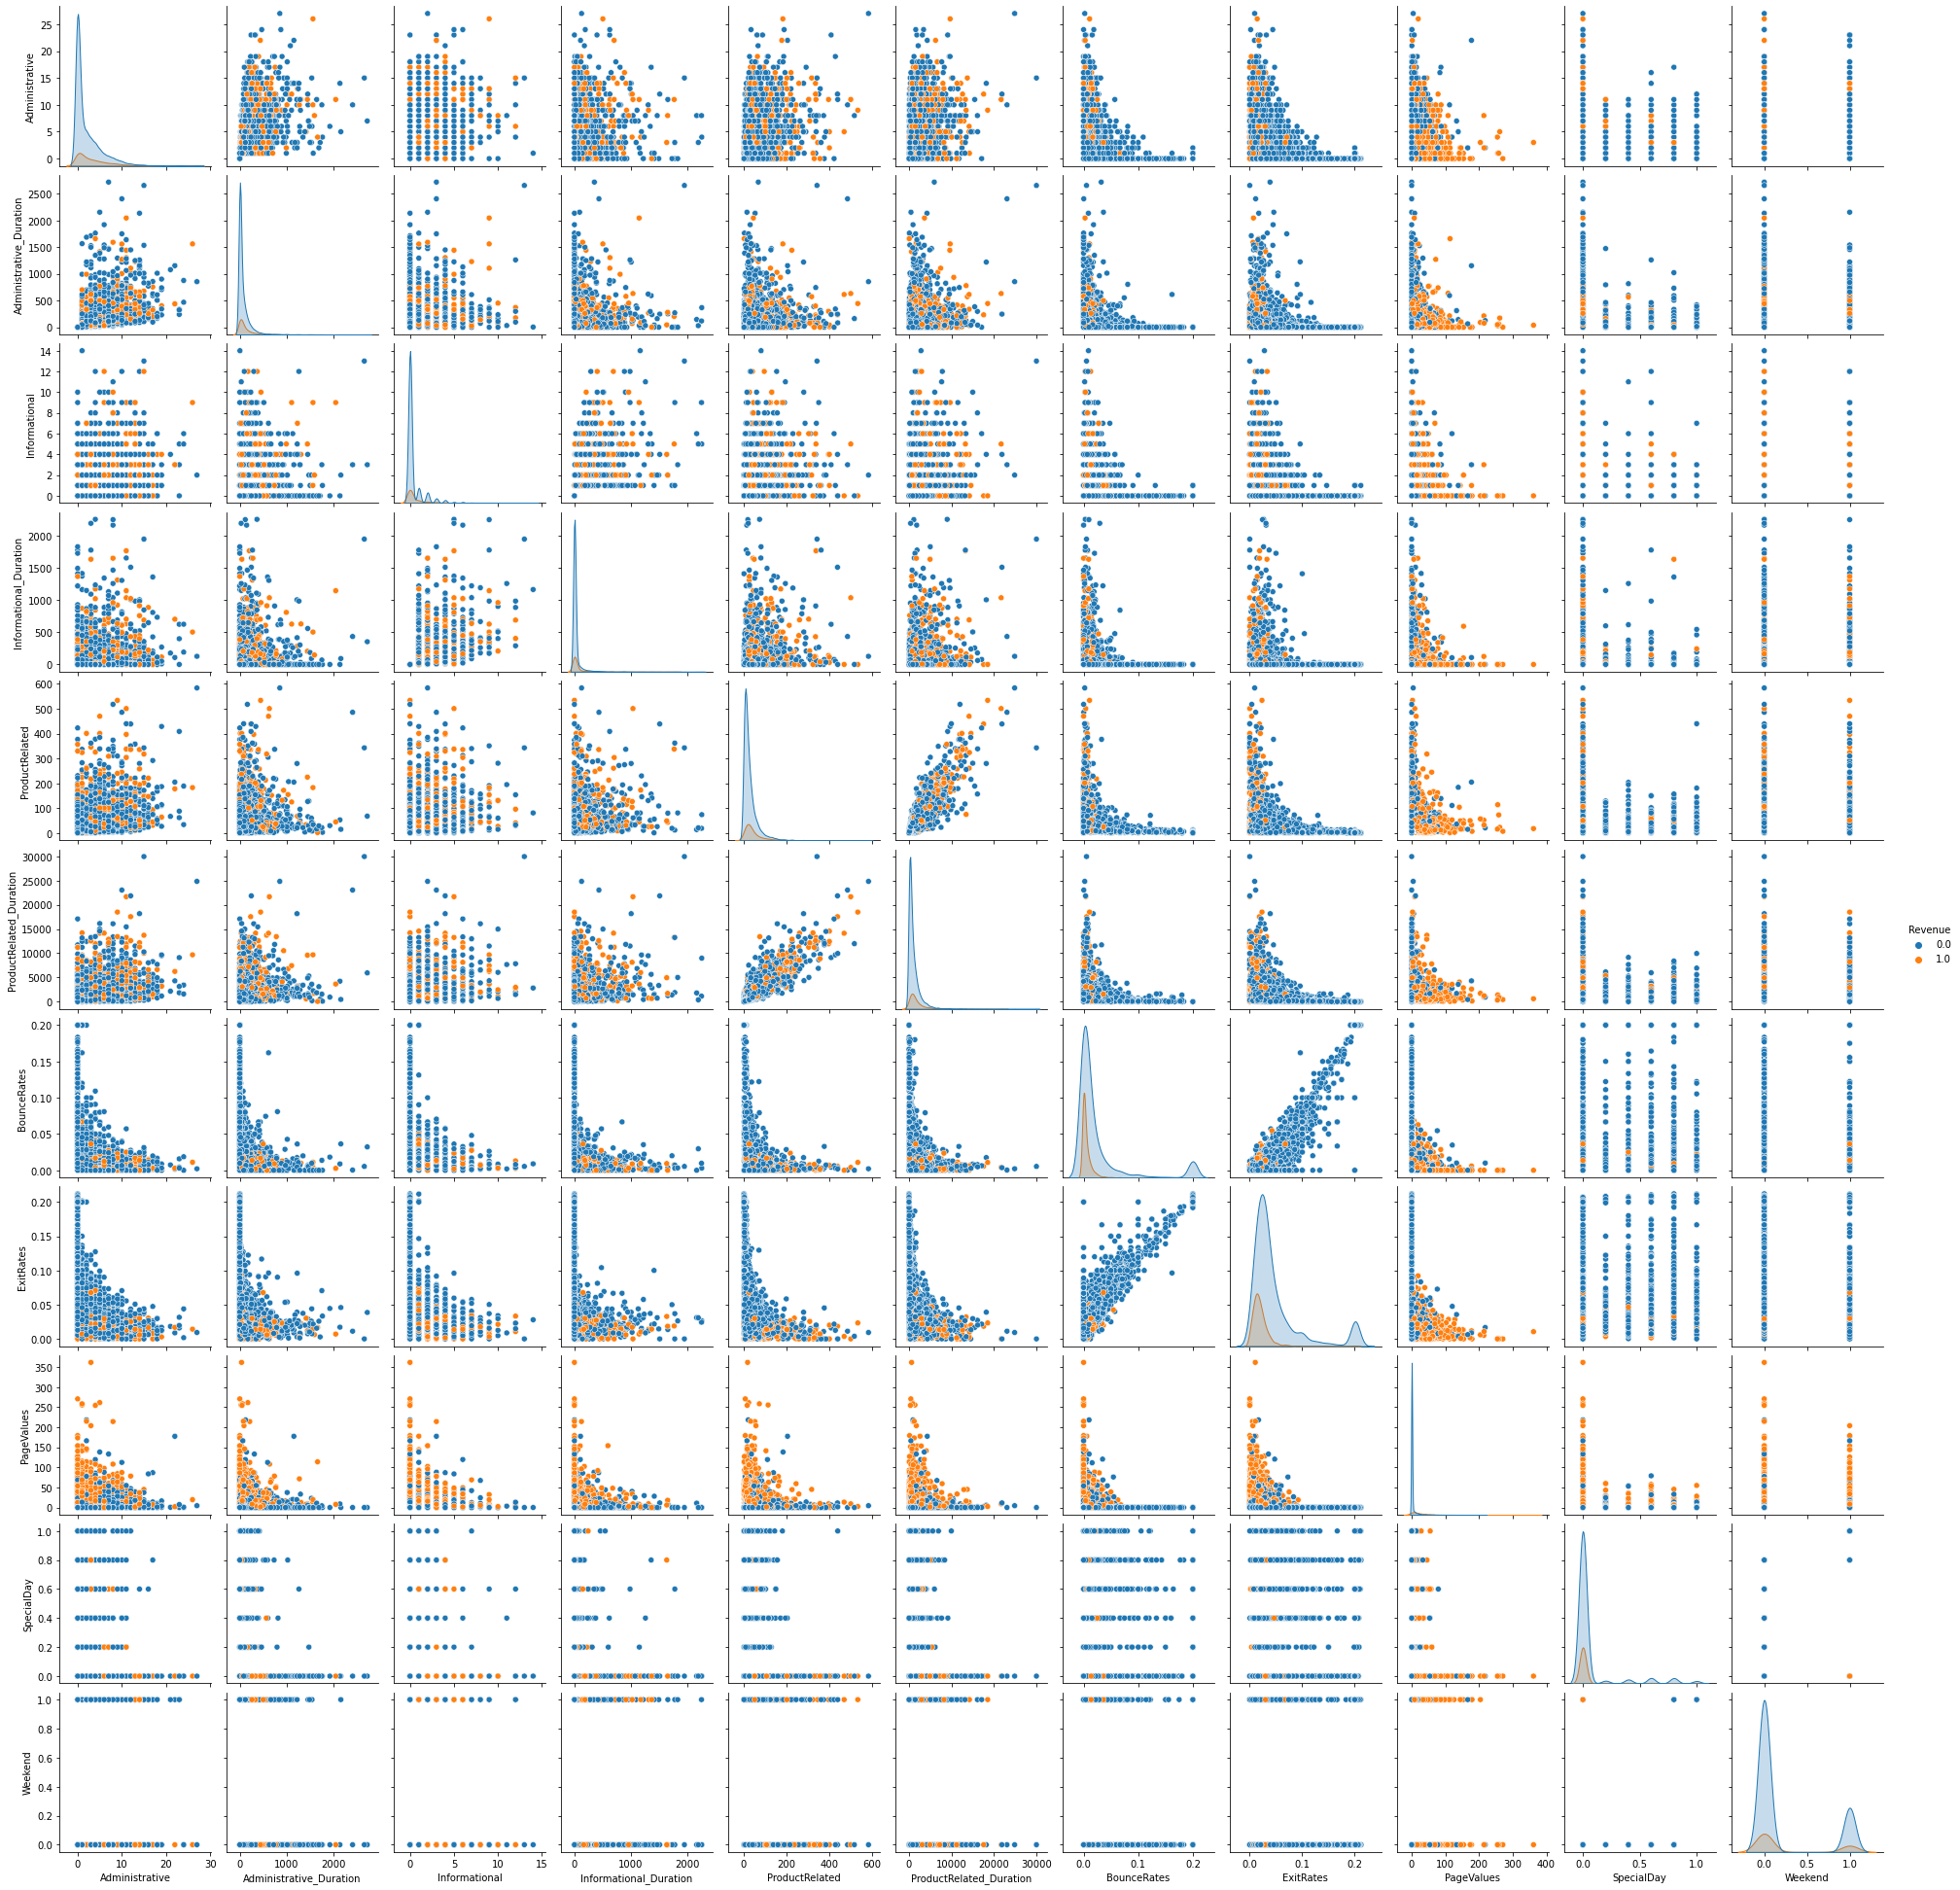

In [ ]:
sns.pairplot(train_data_full[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue']], hue='Revenue')

It can be very visible the fact that in this pairplot there seems to be a lack of clear division of classes; this could be influenced by the class imbalance of our dataset which favors people who didn't buy.

PageValues is the only variable in which it seems like there is a better separation between the groups: in particular the people who bought seem to have visited pages with a higher average value compared to people who didn't buy. 

If we consider the diagonal of the graph, we can say that most of the variables have a normal distribution so we expect to have an LDA with quite accurate results.

## 2.0 VISUAL ANALYSIS

Before performing the actual classification we decided to analyze our data in order to understand better the correlation between our features. We did this in order to better understand the type of Visitors and the relationship between some features that we thought could give interesting results.

In [ ]:
train_graph = pd.read_csv("training_set_online_shoppers_intention.csv")
train_graph = train_graph.drop(columns="Unnamed: 0")
train_graph = train_graph.drop(train_graph[train_graph['VisitorType'] == 'Other'].index)

month_to_season = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Autumn',
    'Oct': 'Autumn',
    'Nov': 'Autumn',
    'Dec': 'Winter'
}

train_graph['Season'] = train_graph['Month'].map(month_to_season)

### - REVENUE

Class Distribution:
False    7753
True     1429
Name: Revenue, dtype: int64
-----------------------------
Imbalance Ratio: 5.43


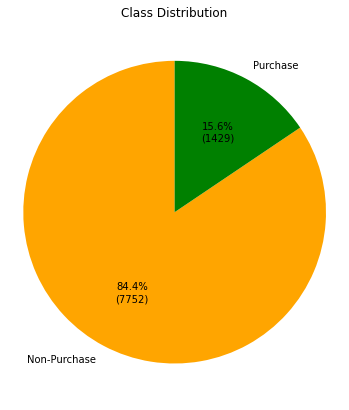

In [ ]:
# Calculate Class Distribution
class_counts = train_graph['Revenue'].value_counts()
print("Class Distribution:")
print(class_counts)

# Visualize Class Distribution
class_labels = ['Non-Purchase', 'Purchase']
plt.figure(figsize=(6, 7))

def pie_label_format(pct, count):
    absolute = int(pct / 100.*np.sum(count))
    percentage = '{:.1f}%'.format(pct)
    count_label = '({})'.format(absolute)
    return '{}\n{}'.format(percentage, count_label)

plt.pie(class_counts, labels=class_labels, autopct=lambda pct: pie_label_format(pct, sum(class_counts)),startangle=90, colors = ["orange", "green"])
plt.title("Class Distribution")
plt.axis('equal')



# Identify Class Imbalance
if len(class_counts) == 2:
    minority_class = class_counts.min()
    majority_class = class_counts.max()
    imbalance_ratio = majority_class / minority_class
    print("-----------------------------")
    print("Imbalance Ratio: {:.2f}".format(imbalance_ratio))
    
plt.show();

### PAGE VALUES

PageValueClass    Revenue      Count    Percentage %
----------------  ---------  -------  --------------
0 to 5$           False         7067           76.97
0 to 5$           True           410            4.47
5 to 50$          False          630            6.86
5 to 50$          True           785            8.55
50 to 150$        False           53            0.58
50 to 150$        True           218            2.37
> than 150$       False            3            0.03
> than 150$       True            16            0.17


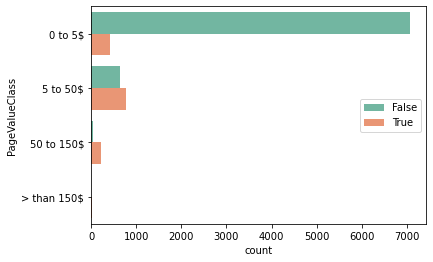

In [ ]:
# Define the ranges and labels for the classes
ranges = [0, 5, 50, 150, float('inf')]
labels = ['0 to 5$', '5 to 50$', '50 to 150$', '> than 150$']

# Create a new column with the transformed classes
train_graph['PageValueClass'] = pd.cut(train_graph['PageValues'], bins=ranges, labels=labels, right=False)

# Percentages
count_table = train_graph.groupby(['PageValueClass', 'Revenue']).size().reset_index(name='Count')
percentages = round(train_graph.groupby(['PageValueClass', 'Revenue']).size() / len(train_graph) * 100, 2)
percentages = percentages.reset_index(name='Percentage %')

result_table = pd.merge(count_table, percentages, on=['PageValueClass', 'Revenue'])
print(tabulate(result_table, headers='keys', tablefmt='simple_grid', showindex=False))
   
    
sns.countplot(y='PageValueClass',hue='Revenue', data=train_graph, palette="Set2")
plt.legend(loc='center right')
plt.show();


Then we wanted to compare the classes of PageValue we created with the count, still based on the Revenue. We found out that the great majority of Visitors that doesn't buy anything visit the class that goes from 0 to 5$, and we can also see that in the other classes there are more Visitors that buy something respect to the ones that doesn't buy anything, Therefore we can say that if the PageValue increase also the relative number of Visitor in that class that buy something increase. We can see it better in the graph below

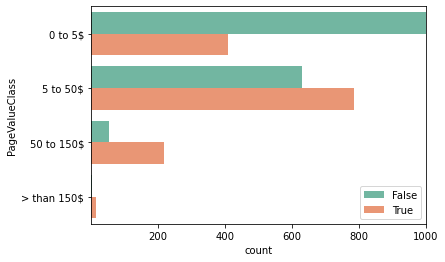

In [ ]:
# A closer look
ax = sns.countplot(y='PageValueClass',hue='Revenue', data=train_graph, palette="Set2")
plt.legend(loc='lower right')
ax.set_xlim(1, 1000)
plt.show();

### BounceRates and ExitRates

Since it is quite difficult to understand if there is a class disticntion in these two variables we decided to give a closer look.

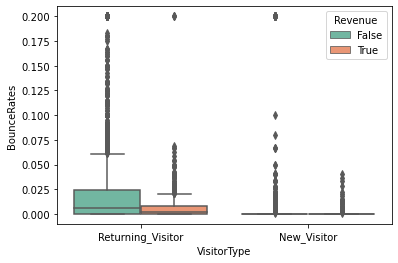

In [ ]:
sns.boxplot(y='BounceRates', x = 'VisitorType', hue='Revenue', data=train_graph, palette="Set2")
plt.show();

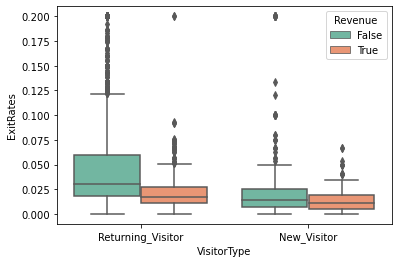

In [ ]:
sns.boxplot(y='ExitRates', x = 'VisitorType', hue='Revenue', data=train_graph, palette="Set2")
plt.show();

Even if the graph is heavily influenced by the class imbalance of Revenue we can see that, generally speaking, if a person bought something they also had lower ExitRates and BounceRates, regardless of being a New Visitor or a Returning Visitor.

### BounceRates - ProductRelated_Duration

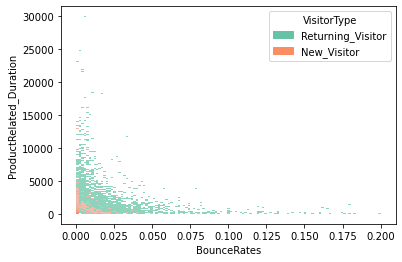

--------------------------------------

                 Average BounceRates 
 VisitorType
New_Visitor          0.005513
Returning_Visitor    0.025323
Name: BounceRates, dtype: float64


In [ ]:
ax = sns.histplot(y='ProductRelated_Duration', x = 'BounceRates', hue='VisitorType', data=train_graph, palette="Set2")
plt.show();

print("--------------------------------------\n")
average_bounce_rates = train_graph.groupby('VisitorType')['BounceRates'].mean()
print(f"                 Average BounceRates \n {average_bounce_rates}")



BounceRate indicate that a visitor enter a specific site and then exit whitout looking at pages different from the first he entered. Therefore we decided to look if it was related to the amount of time that this visitor spend on a page that contains some products, this was done differentiating the visitor considering if is a new visitor or not. Even if the returning visitor are more than the new ones, we can see that new visitors have a lower BounceRate and they also spend generally less time visiting the page.

 
### 2.1 - SPLIT OF DATA

After filling the Null values with the regression model we divided our train data in two parts:

**- TRAIN SET**: part of the data used to train the different classification models

**- VALIDATION SET**: part of the data used to evaluate the different classification models

In [ ]:
# X_full_train, a matrix that contains all the obsevations for each predictor
X_full_features = train_data_full.drop(['Revenue'], axis = 1).columns
X_full_train = train_data_full[X_full_features]

# y_full_train, a vector of the outputs on the train set
y_full_train = train_data_full['Revenue'].to_numpy() 

split_test_size = 0.2
split_seed = 40

X_cl_train, X_cl_val, y_cl_train, y_cl_val = train_test_split(X_full_train, y_full_train,
                                                              test_size = split_test_size, 
                                                              random_state = split_seed)

# Train set
print('X_cl_train is a matrix of dimentions {}'.format(X_cl_train.shape)) # (7345, 45)
print('y_cl_train is a vector of dimentions {}'.format(y_cl_train.shape)) # (7345,)

# Validation set
print('X_cl_val is a matrix of dimentions {}'.format(X_cl_val.shape)) # (1837, 45)
print('y_cl_val is a vector of dimentions {}'.format(y_cl_val.shape)) # (1837,)

X_cl_train is a matrix of dimentions (7345, 45)
y_cl_train is a vector of dimentions (7345,)
X_cl_val is a matrix of dimentions (1837, 45)
y_cl_val is a vector of dimentions (1837,)


**- TEST SET**: part of the data used to test the models on new data

In [ ]:
# X_full_test, a matrix that contains all the obsevations for each predictor
X_full_test = test_data_full[X_full_features]
print('X_full_test is a matrix of dimentions {}'.format(X_full_test.shape)) # (3063, 5852)

# y_full_train, a vector of the outputs on the train set
y_full_test = test_data_full['Revenue'].to_numpy()  
print('y_full_test is a vector of dimentions {}'.format(y_full_test.shape)) # (3063,)

X_full_test is a matrix of dimentions (3063, 45)
y_full_test is a vector of dimentions (3063,)


## 2.2 - ERROR FUNCTION

The error function used for all the classification models is the **ACCURACY**. At the numerator there is a function that takes values of 1 when the condition is true (y_pred == y_true) and 0 when the condition is not true, and at the denominator there is n which represents the total number of observations.

This means that, if the accuracy is equal to 1, then our classifier is a good model and it is capable to associate each point to the right class each time. Instead if it is close to 0, then the classifier does a lot of incorrect classifications/misclassification.

In [ ]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

## 2.3 - POSSIBLE CLASSIFICATION MODELS

To predict if an online shopper was likely to perform a purchase, we could choose among different classification models:

#### - PARAMETRIC MODELS:
    
   - With parametrics model we first have to formulate different assumptions about the data on which we want to fit the model. Among all the different paramtric models we used:
     - **Linear classifiers**: they are linear in the decision bondary. Among these classifiers we used the logistic regression model and the LDA (Linear Discriminant Analysis) model.
     - **Quadratic classifiers**: they have a curve as the decision bondary like QDA (Quadratic Discriminant Analysis) model.
    
#### - NON PARAMETRIC MODELS:

   - With non paramtric models we can directly fit the model on the data without formulating any assumption in advance. Among these types of models we used:
     - **KNN** (k-Neirest Neighbourhoud) classifier
     - **SVC** (Support Vector Classifier)
 
We first started the analysis with the parametric models, in particular, the first model that we used was the Logistic Regression:

## 2.4 - LOGISTIC REGRESSION

The Logistic regression is a linear classifier (linear in the decision boundary between the classes). We used this classifier to predict the class of the varibale called 'Revenue':

    - CLASS 0: online shopper that doesn't buy
    - CLASS 1: online shopper that buy
    
As said before, with parametric test we make different assumption on the data. In the case of the Logistic Regression the two main assumption that we considered are:

   - We assume that the probability of the data given the class is described by an exponential function
   - We assume that the log(ODDS) is a linear function (the logit = 0 rapresents the linear boundary between the two classes)

The model was fitted on the **train set** and evaluated on the **validation set**.

In [ ]:
from sklearn.linear_model import LogisticRegression                                   
model_lgr = LogisticRegression(solver='newton-cg', penalty='none', max_iter = 5000)
model_lgr.fit(X_cl_train, y_cl_train)                                                  
y_predicted_cl_train = model_lgr.predict(X_cl_train)
y_predicted_cl_val = model_lgr.predict(X_cl_val)

print("Train accuracy:", accuracy(y_predicted_cl_train, y_cl_train))
print("Validation accuracy:", accuracy(y_predicted_cl_val, y_cl_val))

LogisticRegression(max_iter=5000, penalty='none', solver='newton-cg')

Train accuracy: 0.8840027229407761
Validation accuracy: 0.8780620577027762


The logistic regression model with all the features has an accuracy on the train set of 0.849 and on the validation set of 0.843. The accuracy on the train and validation data is very similar but slightly better on the train data. All in all, the accuracy of the complete logistic regression model is really high, so this mean that the model is able to correctly classify most of the points.

To analyse which were the most important features, we decided to use a Z-test. Before the test we define the function to perform the test:

In [ ]:
from scipy.stats import norm, zscore
import warnings

warnings.filterwarnings('ignore')
def z_test(X, y, model, names, alpha=None):
    n_samples, n_features = X.shape
    betas = np.concatenate([model.intercept_, model.coef_.reshape(-1)])
    
    # Compute the prediction
    pred = model.predict_proba(X) # [N, 2]
    y = y.reshape(-1)    
    X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    n_samples, n_features = X.shape
    
    V = np.diagflat(np.product(pred, axis=1))
    covLogit = np.linalg.inv(np.dot(np.dot(X.T, V), X))
    se_b = np.sqrt(np.diag(covLogit)) 
    
    z_stat_b = (betas-0)/se_b

    # Compute the p-value (two-sided test)
    p_values = np.array([2 * norm.sf(np.abs(z_stat)) for z_stat in z_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = np.round(se_b, decimals=4)
    df["Z-stat"] = np.round(z_stat_b, decimals=1)
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    return df

In [ ]:
# How many features do I need? I could run a Z test
z_test(X_cl_train, y_cl_train, model_lgr, ["Intercept", *X_full_features], alpha=0.005)

Name  Coefficients  Standard Errors  Z-stat  \
0                       Intercept     -0.799620              NaN     NaN   
1                  Administrative     -0.009316     1.430000e-02    -0.6   
2         Administrative_Duration     -0.000287     3.000000e-04    -1.1   
3                   Informational      0.057994     3.410000e-02     1.7   
4          Informational_Duration     -0.000183     3.000000e-04    -0.6   
5                  ProductRelated      0.000930     1.500000e-03     0.6   
6         ProductRelated_Duration      0.000119     0.000000e+00     3.2   
7                     BounceRates     14.039719     4.536000e+00     3.1   
8                       ExitRates    -29.787224     4.120400e+00    -7.2   
9                      PageValues      0.077672     3.100000e-03    24.7   
10                     SpecialDay     -0.469842     3.263000e-01    -1.4   
11                        Weekend      0.120720     9.270000e-02     1.3   
12              Fiscal_quarters_1     -0.592967     1.324407e+06    -0.0   
13              Fiscal_quarters_2     -0.530553     1.348313e+06    -0.0   
14              Fiscal_quarters_3      0.188234     1.358525e+06     0.0   
15              Fiscal_quarters_4      0.135666     1.185595e+06     0.0   
16             OperatingSystems_1     -0.270338     4.523264e+06    -0.0   
17             OperatingSystems_2      0.085863     4.619043e+06     0.0   
18             OperatingSystems_3     -0.188483     4.669145e+06    -0.0   
19      OperatingSystems_Other_OP     -0.426662     4.727788e+06    -0.0   
20                  TrafficType_1     -0.238252     1.570159e+06    -0.0   
21                 TrafficType_10      0.281886     1.565681e+06     0.0   
22                 TrafficType_13     -0.870019     1.583456e+06    -0.0   
23                  TrafficType_2     -0.065782     1.561592e+06    -0.0   
24                  TrafficType_3     -0.384666     1.565281e+06    -0.0   
25                  TrafficType_4     -0.134185     1.563280e+06    -0.0   
26                  TrafficType_5      0.044073     1.556919e+06     0.0   
27                  TrafficType_6     -0.269374     1.564481e+06    -0.0   
28                  TrafficType_8      0.500508     1.570159e+06     0.0   
29         TrafficType_Other_TrTy      0.336191     1.561020e+06     0.0   
30                       Region_1     -0.053905     2.398663e+05    -0.0   
31                       Region_2      0.167454              NaN     NaN   
32                       Region_3     -0.127908     6.584608e+05    -0.0   
33                       Region_4     -0.168608              NaN     NaN   
34                       Region_5     -0.020037              NaN     NaN   
35                       Region_6      0.190635              NaN     NaN   
36                       Region_7     -0.020601     1.028751e+06    -0.0   
37                       Region_8     -0.157846              NaN     NaN   
38                       Region_9     -0.608803     9.805767e+05    -0.0   
39                      Browser_1      0.031496     2.104923e+06     0.0   
40                      Browser_2     -0.293489     2.104923e+06    -0.0   
41                      Browser_4     -0.197483     2.104923e+06    -0.0   
42                      Browser_5     -0.063526     2.104923e+06    -0.0   
43               Browser_Other_Br     -0.276618     2.104923e+06    -0.0   
44        VisitorType_New_Visitor     -0.350317              NaN     NaN   
45  VisitorType_Returning_Visitor     -0.449302              NaN     NaN   

          p-value  reject H0  
0             NaN      False  
1    5.157179e-01      False  
2    2.678060e-01      False  
3    8.857138e-02      False  
4    5.206525e-01      False  
5    5.467586e-01      False  
6    1.630639e-03       True  
7    1.967123e-03       True  
8    4.861142e-13       True  
9   3.182369e-135       True  
10   1.498732e-01      False  
11   1.926695e-01      False  
12   9.999996e-01      False  
13   9.999997e-01     

In the table, there are some NaN values mostly because the Z-test is ideal to be used on data with only numerical variables and not on mixed data.

Up to this point the logistic regression was fitted by using all the possible variables in our dataset (52 variables). So it was decided to apply features selection on this model. The features selection algorithms that can be applied to the logistic regression are the same ones that can be applied on the linear regression.

For the reasons explained before in the linear regression part, the first algorithm used was the forward feature selection.

#### - FORWARD STEPWISE FEATURE SELECTION WITH CROSS VALIDATION

First we defined the function to perform the forward stepwise feature selection algorithm. The evaluation method used in this case was the 10 folds cross validation.

In [ ]:
# All the steps are the same ones that we find in the figure, so the algorithm is divided into 3 main steps
# 1) Only the base model
# 2) Start adding features
# 2.b) Evaluate all the model for that level of complexity (we evelaute using the accuracy matrix)
# 3) we find the best method

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# These are functions that returns functions
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y) # its fits the model
        score = scorer(model, X, y) # gives me the score of the model
        return model, score # it gives me back the model and the score
    return evaluator   

# This is an evaluator for the cross validation
def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

# This is another evaluator for the cross validation with an hold-out precedure
def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        # before doing, I split the data in smaller parts
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        # this block of code is the same of the first function
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            # //==========================================\\
            # || ***** Difference from previous lab ***** ||
            # \\==========================================//
            model = LogisticRegression(solver="newton-cg", penalty='none')
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8808739735676288
............
Best model (M2) with 2 features: ['PageValues', 'ExitRates']
M2 subset score (3.): 0.8835963595247363
............
Best model (M3) with 3 features: ['PageValues', 'ExitRates', 'OperatingSystems_2']
M3 subset score (3.): 0.8846857217001242
............
Best model (M4) with 4 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1']
M4 subset score (3.): 0.8846853509796289
............
Best model (M5) with 5 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br']
M5 subset score (3.): 0.8848215907616451
............
Best model (M6) with 6 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5']
M6 subset score (3.): 0.8848215907616452
............
Best model (M7) with 7 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', '

............
Best model (M28) with 28 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', 'Region_3', 'TrafficType_8', 'BounceRates', 'TrafficType_13', 'Browser_2', 'TrafficType_1', 'Region_2', 'Browser_4', 'OperatingSystems_1', 'OperatingSystems_3', 'TrafficType_Other_TrTy', 'TrafficType_6', 'OperatingSystems_Other_OP', 'Region_5', 'TrafficType_5', 'Region_7', 'Region_6', 'Region_4', 'TrafficType_3', 'Weekend', 'TrafficType_10', 'Region_8']
M28 subset score (3.): 0.8848210346809025
............
Best model (M29) with 29 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', 'Region_3', 'TrafficType_8', 'BounceRates', 'TrafficType_13', 'Browser_2', 'TrafficType_1', 'Region_2', 'Browser_4', 'OperatingSystems_1', 'OperatingSystems_3', 'TrafficType_Other_TrTy', 'TrafficType_6', 'OperatingSystems_Other_OP', 'Region_5', 'TrafficType_5', 'Region_7', 'Region_6', 'Region_4', 'TrafficType_3',

............
Best model (M41) with 41 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', 'Region_3', 'TrafficType_8', 'BounceRates', 'TrafficType_13', 'Browser_2', 'TrafficType_1', 'Region_2', 'Browser_4', 'OperatingSystems_1', 'OperatingSystems_3', 'TrafficType_Other_TrTy', 'TrafficType_6', 'OperatingSystems_Other_OP', 'Region_5', 'TrafficType_5', 'Region_7', 'Region_6', 'Region_4', 'TrafficType_3', 'Weekend', 'TrafficType_10', 'Region_8', 'TrafficType_2', 'TrafficType_4', 'Region_1', 'Fiscal_quarters_2', 'Fiscal_quarters_3', 'Region_9', 'Administrative_Duration', 'SpecialDay', 'ProductRelated_Duration', 'Administrative', 'ProductRelated', 'Informational', 'VisitorType_New_Visitor']
M41 subset score (3.): 0.883324250681199
............
Best model (M42) with 42 features: ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', 'Region_3', 'TrafficType_8', 'BounceRates', 'TrafficType_13', 'Brow

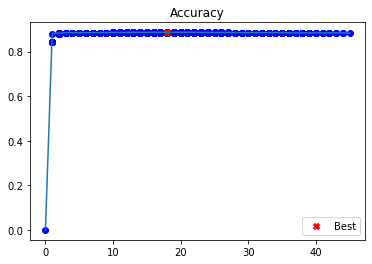

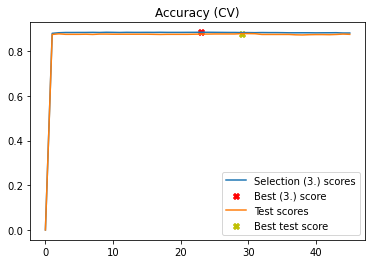

In [ ]:
cv = 10
# Each time we have to sleect the correct:
# - candidate evaluator (the matrix is accuracy, models with the highest accuracy are the best ones)
# - subset evaluator (here I will use a cross validation evaluator)
# - test evaluator (to evaluate also on the test set)
    
forward_selection(X_cl_train, y_cl_train, X_cl_val, y_cl_val,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

From the forward stepwise feature selection evaluated with cross validation the best configuration was the one with 23 features and they are:

- PageValues
- ExitRates
- OperatingSystems_2
- Browser_1
- Browser_Other_Br
- Browser_5
- Region_3
- TrafficType_8
- BounceRates
- TrafficType_13
- Browser_2
- TrafficType_1
- Region_2
- Browser_4
- OperatingSystems_1
- OperatingSystems_3
- TrafficType_Other_TrTy
- TrafficType_6
- OperatingSystems_Other_OP
- Region_5
- TrafficType_5
- Region_7
- Region_6

After this, we decded to look at the performance of the model after feature selection:

In [ ]:
X_cv_lgr_features = ['PageValues', 'ExitRates', 'OperatingSystems_2', 'Browser_1', 'Browser_Other_Br', 'Browser_5', 'Region_3', 'TrafficType_8', 'BounceRates', 'TrafficType_13', 'Browser_2', 'TrafficType_1', 'Region_2', 'Browser_4', 'OperatingSystems_1', 'OperatingSystems_3', 'TrafficType_Other_TrTy', 'TrafficType_6', 'OperatingSystems_Other_OP', 'Region_5', 'TrafficType_5', 'Region_7', 'Region_6']
X_CV_lgr = X_full_train[X_cv_lgr_features].to_numpy()
X_cv_lgr_train, X_cv_lgr_val, y_cv_lgr_train, y_cv_lgr_val = train_test_split(X_CV_lgr, y_full_train,
                                                              test_size = split_test_size, 
                                                              random_state = split_seed)


model_cv_lgr = LogisticRegression(solver='newton-cg', penalty='none', class_weight= 'balanced') 
model_cv_lgr.fit(X_cv_lgr_train, y_cv_lgr_train)                          
y_predicted_cv_lgr_train = model_cv_lgr.predict(X_cv_lgr_train)
y_predicted_cv_lgr_val = model_cv_lgr.predict(X_cv_lgr_val)


print("Train accuracy:", accuracy(y_predicted_cv_lgr_train, y_cv_lgr_train))
print("Validation accuracy:", accuracy(y_predicted_cv_lgr_val, y_cv_lgr_val))

LogisticRegression(class_weight='balanced', penalty='none', solver='newton-cg')

Train accuracy: 0.859496255956433
Validation accuracy: 0.869896570495373


After forward stepwise feature selection with cross-validation, we can see that the logistic model has a very similar performance to the complete model on the train data (reduced model R^2 = 0.859, complete model R^2 =  0.849). While, regarding the performances on the validation set, we can see that the model after feature selection has better performances. Indeed on the reduced model we have an R^2 = 0.869.

#### - LASSO REGRESSION

This is another algortihm to perform feature selection. Beafore applying this method we normalised our data in order that the distribution has mean 0 (so all the data centered in the origin).

LogisticRegression(C=0.0001, penalty='l1', solver='saga')

LogisticRegression(C=0.00514949494949495, penalty='l1', solver='saga')

LogisticRegression(C=0.010198989898989898, penalty='l1', solver='saga')

LogisticRegression(C=0.015248484848484848, penalty='l1', solver='saga')

LogisticRegression(C=0.020297979797979798, penalty='l1', solver='saga')

LogisticRegression(C=0.025347474747474747, penalty='l1', solver='saga')

LogisticRegression(C=0.030396969696969697, penalty='l1', solver='saga')

LogisticRegression(C=0.03544646464646465, penalty='l1', solver='saga')

LogisticRegression(C=0.0404959595959596, penalty='l1', solver='saga')

LogisticRegression(C=0.04554545454545455, penalty='l1', solver='saga')

LogisticRegression(C=0.0505949494949495, penalty='l1', solver='saga')

LogisticRegression(C=0.05564444444444445, penalty='l1', solver='saga')

LogisticRegression(C=0.0606939393939394, penalty='l1', solver='saga')

LogisticRegression(C=0.06574343434343434, penalty='l1', solver='saga')

LogisticRegression(C=0.0707929292929293, penalty='l1', solver='saga')

LogisticRegression(C=0.07584242424242425, penalty='l1', solver='saga')

LogisticRegression(C=0.0808919191919192, penalty='l1', solver='saga')

LogisticRegression(C=0.08594141414141414, penalty='l1', solver='saga')

LogisticRegression(C=0.0909909090909091, penalty='l1', solver='saga')

LogisticRegression(C=0.09604040404040405, penalty='l1', solver='saga')

LogisticRegression(C=0.101089898989899, penalty='l1', solver='saga')

LogisticRegression(C=0.10613939393939394, penalty='l1', solver='saga')

LogisticRegression(C=0.11118888888888889, penalty='l1', solver='saga')

LogisticRegression(C=0.11623838383838385, penalty='l1', solver='saga')

LogisticRegression(C=0.12128787878787879, penalty='l1', solver='saga')

LogisticRegression(C=0.12633737373737372, penalty='l1', solver='saga')

LogisticRegression(C=0.13138686868686866, penalty='l1', solver='saga')

LogisticRegression(C=0.13643636363636363, penalty='l1', solver='saga')

LogisticRegression(C=0.14148585858585858, penalty='l1', solver='saga')

LogisticRegression(C=0.14653535353535352, penalty='l1', solver='saga')

LogisticRegression(C=0.1515848484848485, penalty='l1', solver='saga')

LogisticRegression(C=0.15663434343434343, penalty='l1', solver='saga')

LogisticRegression(C=0.16168383838383837, penalty='l1', solver='saga')

LogisticRegression(C=0.16673333333333332, penalty='l1', solver='saga')

LogisticRegression(C=0.17178282828282826, penalty='l1', solver='saga')

LogisticRegression(C=0.17683232323232323, penalty='l1', solver='saga')

LogisticRegression(C=0.18188181818181817, penalty='l1', solver='saga')

LogisticRegression(C=0.18693131313131311, penalty='l1', solver='saga')

LogisticRegression(C=0.19198080808080809, penalty='l1', solver='saga')

LogisticRegression(C=0.19703030303030303, penalty='l1', solver='saga')

LogisticRegression(C=0.20207979797979797, penalty='l1', solver='saga')

LogisticRegression(C=0.2071292929292929, penalty='l1', solver='saga')

LogisticRegression(C=0.21217878787878786, penalty='l1', solver='saga')

LogisticRegression(C=0.21722828282828283, penalty='l1', solver='saga')

LogisticRegression(C=0.22227777777777777, penalty='l1', solver='saga')

LogisticRegression(C=0.2273272727272727, penalty='l1', solver='saga')

LogisticRegression(C=0.23237676767676768, penalty='l1', solver='saga')

LogisticRegression(C=0.23742626262626262, penalty='l1', solver='saga')

LogisticRegression(C=0.24247575757575757, penalty='l1', solver='saga')

LogisticRegression(C=0.2475252525252525, penalty='l1', solver='saga')

LogisticRegression(C=0.25257474747474745, penalty='l1', solver='saga')

LogisticRegression(C=0.2576242424242424, penalty='l1', solver='saga')

LogisticRegression(C=0.26267373737373734, penalty='l1', solver='saga')

LogisticRegression(C=0.2677232323232323, penalty='l1', solver='saga')

LogisticRegression(C=0.2727727272727273, penalty='l1', solver='saga')

LogisticRegression(C=0.2778222222222222, penalty='l1', solver='saga')

LogisticRegression(C=0.28287171717171716, penalty='l1', solver='saga')

LogisticRegression(C=0.28792121212121213, penalty='l1', solver='saga')

LogisticRegression(C=0.29297070707070705, penalty='l1', solver='saga')

LogisticRegression(C=0.298020202020202, penalty='l1', solver='saga')

LogisticRegression(C=0.303069696969697, penalty='l1', solver='saga')

LogisticRegression(C=0.3081191919191919, penalty='l1', solver='saga')

LogisticRegression(C=0.3131686868686869, penalty='l1', solver='saga')

LogisticRegression(C=0.3182181818181818, penalty='l1', solver='saga')

LogisticRegression(C=0.32326767676767676, penalty='l1', solver='saga')

LogisticRegression(C=0.32831717171717173, penalty='l1', solver='saga')

LogisticRegression(C=0.33336666666666664, penalty='l1', solver='saga')

LogisticRegression(C=0.3384161616161616, penalty='l1', solver='saga')

LogisticRegression(C=0.34346565656565653, penalty='l1', solver='saga')

LogisticRegression(C=0.3485151515151515, penalty='l1', solver='saga')

LogisticRegression(C=0.35356464646464647, penalty='l1', solver='saga')

LogisticRegression(C=0.3586141414141414, penalty='l1', solver='saga')

LogisticRegression(C=0.36366363636363636, penalty='l1', solver='saga')

LogisticRegression(C=0.3687131313131313, penalty='l1', solver='saga')

LogisticRegression(C=0.37376262626262624, penalty='l1', solver='saga')

LogisticRegression(C=0.3788121212121212, penalty='l1', solver='saga')

LogisticRegression(C=0.3838616161616162, penalty='l1', solver='saga')

LogisticRegression(C=0.3889111111111111, penalty='l1', solver='saga')

LogisticRegression(C=0.39396060606060607, penalty='l1', solver='saga')

LogisticRegression(C=0.399010101010101, penalty='l1', solver='saga')

LogisticRegression(C=0.40405959595959595, penalty='l1', solver='saga')

LogisticRegression(C=0.4091090909090909, penalty='l1', solver='saga')

LogisticRegression(C=0.41415858585858584, penalty='l1', solver='saga')

LogisticRegression(C=0.4192080808080808, penalty='l1', solver='saga')

LogisticRegression(C=0.4242575757575757, penalty='l1', solver='saga')

LogisticRegression(C=0.4293070707070707, penalty='l1', solver='saga')

LogisticRegression(C=0.43435656565656566, penalty='l1', solver='saga')

LogisticRegression(C=0.4394060606060606, penalty='l1', solver='saga')

LogisticRegression(C=0.44445555555555555, penalty='l1', solver='saga')

LogisticRegression(C=0.4495050505050505, penalty='l1', solver='saga')

LogisticRegression(C=0.45455454545454543, penalty='l1', solver='saga')

LogisticRegression(C=0.4596040404040404, penalty='l1', solver='saga')

LogisticRegression(C=0.4646535353535354, penalty='l1', solver='saga')

LogisticRegression(C=0.4697030303030303, penalty='l1', solver='saga')

LogisticRegression(C=0.47475252525252526, penalty='l1', solver='saga')

LogisticRegression(C=0.4798020202020202, penalty='l1', solver='saga')

LogisticRegression(C=0.48485151515151514, penalty='l1', solver='saga')

LogisticRegression(C=0.4899010101010101, penalty='l1', solver='saga')

LogisticRegression(C=0.49495050505050503, penalty='l1', solver='saga')

LogisticRegression(C=0.5, penalty='l1', solver='saga')

Text(0.5, 0, 'C=1/lambda')

Text(0, 0.5, 'beta')

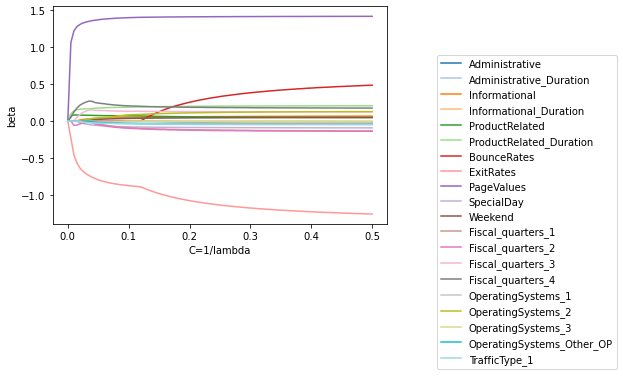

In [ ]:
C_vals = np.linspace(1e-4, 0.5, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X_cl_train)

for C in C_vals:
    model = LogisticRegression(solver='saga', penalty='l1', C=C)
    model.fit(X_std, y_cl_train)
    beta = model.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

colors = plt.cm.tab20.colors[:len(X_full_features)]

for beta, name, i in zip(betas, X_full_features, colors):
    plt.plot(C_vals, beta, label=name, color = i)
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.8))

From the plot we can see that the last features to disappear (to go to 0) are:
   - PageValues
   - ExitRates
   - Fiscal_quarters_4
   
This means that these features are the most important ones and they are also included in the model obtained by forward stepwise feature selection. Indeed they are the first 3 features in the model, so also the algorithm of the forward feature selection considered them as the most important one. So in the end as the best model for the logistic regression we kept the one obtained by forward stepwise feature selection with 23 features. So now we evaluated the model with the confusion matrix and with different indexes.

### EVALUATION OF THE LOGISTIC REGRESSION CLASSIFIER

#### - CONFUSION MATRIX ON THE TRAIN AND VALIDATION DATA

A confusion matrix is a table that is used to evaluate the performance of a classification model. It provides a comprehensive view of how well the model has classified instances from different classes. The confusion matrix compares the predicted class labels with the true class labels and counts the number of correct and incorrect predictions for each class.
Based on the values in the confusion matrix, we can calculate various evaluation metrics, such as:

Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}\$

Precision: $\frac{TP}{TP + FP}\$

Recall (or Sensitivity or True Positive Rate):$\frac{TP}{TP + FN}\$ 

Specificity (or True Negative Rate): $\frac{TN}{TN + FP}\$

F1 Score: 2 x $\frac{Precision * Recall}{Precision + Recall}\$

These metrics help us understand how well the model performs in terms of correctly identifying positive and negative instances, and they provide insights into the model's strengths and weaknesses.

In [ ]:
def sensitivity(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN / N

def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

def f1(cm):
    p = precision(cm)
    r = sensitivity(cm)
    return (2 * p * r) / (p + r)


#### - CONFUSION MATRIX ON THE VALIDATION DATA

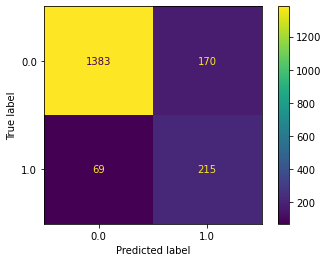

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Create the confusion matrix
cm_lgr = confusion_matrix(y_cv_lgr_val, model_cv_lgr.predict(X_cv_lgr_val))

# Plot test confution matrix
plot_confusion_matrix(model_cv_lgr, X_cv_lgr_val, y_cv_lgr_val)


#### - SENSITIVITY, SPECIFICITY, PRECISION AND F1-SCORE

In [ ]:
print("Sensitivity ", sensitivity(cm_lgr))
print("Specificity ", specificity(cm_lgr))
print("Precision ", precision(cm_lgr))
print("F1-score", f1(cm_lgr))

Sensitivity  0.7570422535211268
Specificity  0.8905344494526722
Precision  0.5584415584415584
F1-score 0.6427503736920778


The first time that we ran the logistic regression obtained by forward feature selection evaluated with cross validation, we observed a really high specificity but a low sensitivity. The main reason for this behavior is given by the fact that, as said before, the two classes are unbalanced.

For this reason we decided to add the parameter called class_weight and set it to 'balanced'. This new term uses the values of y to automatically adjust weights inversely proportional to class frequencies. Indeed after fitting the model with this change, we succeeded in raising the value of the sensitivity (from 0.431 to 0.757). 

We did this change because we were interested in having a good classifier to detect true positives, so online shoppers that really bought something on the website and before the change the model was only good at detecting online shoppers who didn't buy anything.

Sensitivity (recall) and specificity are not the only indexes that we used to evaluate the model, we also looked at the precision of the model, which is 0.55, so we can say that, out of all the online shoppers that the model considers as the ones who bought something, a little bit more than half of them are really true positive (so they really bought something on the website). While the F1-score, which is a measure that is very useful when the classes are unbalanced, as in our case, it summarize precision and sensitivity in one single values which in this case is 0.64 so we can say in the end that the logistic regression has mediocre performances on this dataframe.

Now we will also look at other classifiers to see if they are better than the logistic regression or not.

## 2.5 - LINEAR DISCRIMINANT ANALYSIS (LDA)

This is another linear classifier. With respect to the logistic regression, that tries to model the probability of the class given the data, LDA models the probability of the data gven the class and the probability a priori of the class .
 
With this model there are 2 main assumption:

   - All the features have the same covariance
   - The distribution of the features under a specific class can be summarize as a multivariate normal distribution
   
Below we fitted the model on the data:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA = model_LDA.fit(X_cl_train, y_cl_train)

print("Train accuracy:", accuracy(y_cl_train, model_LDA.predict(X_cl_train)))
print("Validation accuracy:", accuracy(y_cl_val, model_LDA.predict(X_cl_val)))

Train accuracy: 0.8808713410483322
Validation accuracy: 0.8709853021230267


The accuracy of the model on the train and on the validation set is high (0.880 and 0.870 respectively). We can see that the LDA model performs better on the train data even though it performs really good also on the validation set. After having analyzed the base LDA model, we also wanted to analyze the LDA polinomial model. We considered all the models of grade 1 and 2. To evaluate the best model we decided to use a 10 fold cross-validation as you can see below:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model_LDA_poly = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA())])
params = {'poly__degree': range(1, 3)}
cv_LDA_poly = GridSearchCV(model_LDA_poly, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))

cv_LDA_poly.fit(X_cl_train, y_cl_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lda', LinearDiscriminantAnalysis())]),
             param_grid={'poly__degree': range(1, 3)},
             scoring=make_scorer(accuracy))

In [ ]:
cv_LDA_poly.best_params_
best_model_LDA_poly = cv_LDA_poly.best_score_
pd.DataFrame(cv_LDA_poly.cv_results_)
best_model_LDA_poly = cv_LDA_poly.best_estimator_

{'poly__degree': 1}

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.068419      0.005683         0.002399        0.000437   
1       2.386968      0.186758         0.014950        0.003822   

  param_poly__degree               params  split0_test_score  \
0                  1  {'poly__degree': 1}           0.873469   
1                  2  {'poly__degree': 2}           0.884354   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.887075           0.865306           0.880272           0.878912   
1           0.889796           0.877551           0.877551           0.880272   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.893733           0.891008           0.880109           0.873297   
1           0.889646           0.873297           0.874659           0.876022   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.873297         0.879648        0.008416                1  
1           0.861035         0.878418        0.008025                2

The best LDA polynomial model is the one of grade 1 which is the same model that we previously analysed for the LDA. For this reason, we evaluated the LDA base model with a confusion matrix, as you can see below:

### EVALUATION OF THE LDA CLASSIFIER

#### - CONFUSION MATRIX ON THE VALIDATION DATA

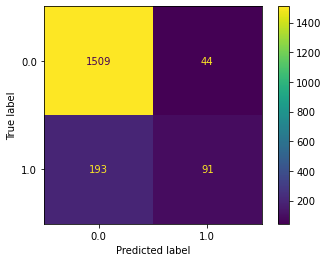

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Create the confusion matrix
cm_LDA = confusion_matrix(y_cl_val, model_LDA.predict(X_cl_val))

# Plot test confution matrix
plot_confusion_matrix(model_LDA, X_cl_val, y_cl_val)

#### - SENSITIVITY, SPECIFICITY, PRECISION AND F1-SCORE

In [ ]:
print("Sensitivity ", sensitivity(cm_LDA))
print("Specificity ", specificity(cm_LDA))
print("Precision ", precision(cm_LDA))
print("F1-score", f1(cm_LDA))

Sensitivity  0.3204225352112676
Specificity  0.9716677398583387
Precision  0.674074074074074
F1-score 0.43436754176610975


The overall accuracy of the model on the validation set (error function) is close to 1 (0.87). By looking more in detail, we can see that:

   - Sensitivity (percentage of true negative correctly identified) is 0.32, which is really low so this means that the LDA model is not good at identifying online shoppers that bought something on the website.
   - Specificity (percentage of true positive correctly identified) is 0.97, which is really high so this means that the LDA model is very good at identifying online shoppers that buy.
   - The precision of the model is 0.67 so out of all the users considered positive by the model, 67% are truly positive, while the F1-score which summarize the sensitivity and the precision is 0.43 which is lower with respect to the logistic regression but also we have to remember that for the LDA we still didn't do any adjustment on the threshold.
   
That's why we decided to try to use an empirical threshold. The empirical threshold was calculated as number of online shopper in class 1 (the ones who buy) over the total number of online shoppers:

In [ ]:
# Define the function
def predict_th(model, X, th=0.2):
    prob = model.predict_proba(X)
    return prob[:,1] >= th

# Define the empirical thresholds
th_empirical = n_class_1 / (n_class_0 + n_class_1)

# Build the confusion matrix with the new threshold
cm_LDA = confusion_matrix(y_cl_train, predict_th(model_LDA, X_cl_train, th=th_empirical))

print("Sensitivity ", sensitivity(cm_LDA))
print("Specificity ", specificity(cm_LDA))
print("Precision ", precision(cm_LDA))
print("F1-score", f1(cm_LDA))

Sensitivity  0.6139737991266375
Specificity  0.9269354838709677
Precision  0.6081314878892734
F1-score 0.611038678835289


From these results, we can see that using an empirical threshold helps in increasing the sensitivity from 0.32 to 0.61. Because there is a trade off between sensitivity and specificity, we can see that increasing one decreases the other, indeed the specificity is a little bit lower than before (0.97 -> 0.92). Because we are predicting more users as the ones who bought something (positive) also the precision is a little bit decreased (0.67 -> 0.60) while the F1-score is higher than before (0.43 -> 0.61) and that's because of the higher sensitivity. So in the end, with the empirical threshold, the performances of the LDA model are better than before.

## 2.6 - QUADRATRIC DISCRIMINANT ANALYSIS

Up to this point only classifiers with a linear boundary were considered. Indeed the QDA (quadratic discriminant analysis) model, as the name suggests, is a classifier with a quadratic boundary. Similar to the LDA model, with QDA there is a very important assumption:

   - All the features under a specific class follow a multivariate normal distribution
   
With respect to the LDA, for the QDA, all the features under a specific class have different covariates.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA(tol = 0)
model_QDA = model_QDA.fit(X_cl_train, y_cl_train)

print("Train accuracy:", accuracy(y_cl_train, model_QDA.predict(X_cl_train)))
print("Test accuracy:", accuracy(y_cl_val, model_QDA.predict(X_cl_val)))

Train accuracy: 0.8299523485364193
Test accuracy: 0.8127381600435493


### EVALUATION OF THE QDA CLASSIFIER

#### - CONFUSION MATRIX ON THE VALIDATION DATA

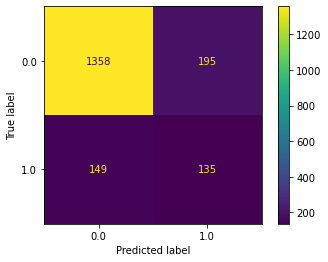

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Create the confusion matrix
cm_QDA = confusion_matrix(y_cl_val, model_QDA.predict(X_cl_val))

# Plot test confution matrix
plot_confusion_matrix(model_QDA, X_cl_val, y_cl_val)

#### - SENSITIVITY, SPECIFICITY, PRECISION AND F1-SCORE

In [ ]:
print("Sensitivity ", sensitivity(cm_QDA))
print("Specificity ", specificity(cm_QDA))
print("Precision ", precision(cm_QDA))
print("F1-score", f1(cm_QDA))

Sensitivity  0.4753521126760563
Specificity  0.8744365743721829
Precision  0.4090909090909091
F1-score 0.43973941368078173


In the case of the QDA model, the overall accuracy is 0.812 on the validation data which is lower than the LDA model (0.87). By looking more in detail the model, we can see that:
 
   - Sensitivity is low (0.47) so this means that the model is not able to correctly classify the true positive, but this is a common behavior that we also saw with the other classifiers and due to unbalanced classes.
   - Specificity (0.87) is high, so the model is able to correctly classify the true negative.
   - Out of all the true positives identified by the model only 40% are really users that bought something on the website. In the end because sensitivity and precision are low, also the F1 score is low (0.43).
   
As we did for the LDA model, we tried to improve these indexes by applying an empirical threshold:

In [ ]:
# Build the confusion matrix with the new threshold
cm_QDA = confusion_matrix(y_cl_train, predict_th(model_QDA, X_cl_train, th=th_empirical))

print("Sensitivity ", sensitivity(cm_QDA))
print("Specificity ", specificity(cm_QDA))
print("Precision ", precision(cm_QDA))
print("F1-score", f1(cm_QDA))

Sensitivity  0.6436681222707423
Specificity  0.8291935483870968
Precision  0.41035634743875277
F1-score 0.5011900714042842


With an empirical threshold the sensitivity increases from 0.47 to 0.64 so, using an empirical threshold instead of the default 0.5, slightly improves the sensitivity. As we saw also for the LDA model, increasing the sensitivity means to decrease the specificity (because we are predicting more users as positive so we will also have more false positives). The precision is still low, so even if the model predicts more users as true positive, among all these users, the ratio of ones who really bought something on the website with respect to all the positive identifiers by the model is still low (0.1). In the end, the F1-score, with respect to the logistic regression and LDA classifier, is lower.

After evaluating the QDA model, we can say that its performances are worse than the ones seen for the other two classifiers (this is something that we will confirm also with the ROC curves at the end of the classification part).

## 2.7 - KNN (K-NEAREST NEIGHBORS)

Up to this moment only parametric models were performed and evaluated, but they are not the only ones. Indeed, also a non parametric model was fitted on the data which is called KNN (k-nearest neighbor) classifier. With respect to the other parametric models, in this case no assumptions were made on the distribution of the data but the model was fitted directly on the train data.

For every new observation that needs to be classify, KNN takes the k most similar observation to the new one and classify the new observation only on the k neighbor. So before fitting the model on the data, we had to discover what was the best number of k neighbors and we evaluate this by using cross validation.

This step was necessary because, for example, with a really low K (ex. K = 1) the model would overfit the train data but also it wouldn't be a good classifier with a really high value of K (ex. K = 50). So for this reason we tested different models with a number of K between 1 and 15 and, with cross validation, we picked the best one.

Before the evaluation with cross validation, we define a new function 'show_results' to better visualize the results:


In [ ]:
# Define the function to plot the results
def show_results(cv, X_cl_val, params, prefix=''):
    prefix = ' ' + prefix    
    results = pd.DataFrame(cv.cv_results_)
    # Plot the CV (mean) scores for all possible parameters
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    # Find the best
    best_idx = np.argmax(results['mean_test_score'])
    # Plot it as a cross
    plt.plot(results[params][best_idx],
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Validation accuracy:", accuracy(y_cl_val, cv.best_estimator_.predict(X_cl_val)))

Evaluation with cross-validation of KNN models with 1 to 15 k-neighbors:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 15)}

cv = GridSearchCV(model, params, refit = True, cv = 5,
                 scoring = make_scorer(accuracy))
cv.fit(X_cl_train, y_cl_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring=make_scorer(accuracy))

  (best 4) CV accuracy: 0.8618107556160653
  (best 4) Validation accuracy: 0.854109961894393


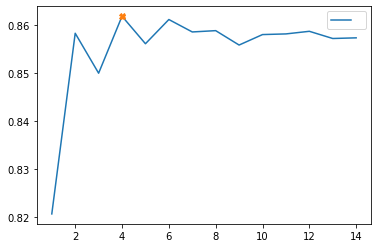

In [ ]:
show_results(cv, X_cl_val, "param_n_neighbors")

From the results we can see that the highest score is in correspondence of having a number of neighbor (k) equals to 4 with an associated CV score of 0.861 and a validation accuracy of 0.854. Before evaluating the model we also wanted to take into account:

#### ... AN IMPORTANT CONSIDERATION

When fitting a KNN classifier it could be necessary to normalize the data because it is a method based on sample distance. So we did a comparison between the performances obtained before on the unnormalized data with respect to the performances obtained on:
 - Data normalized with range normalization
 - Data normalized with z-score normalization

Below you can see the code used and the results:


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             scoring=make_scorer(accuracy))

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('norm', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             scoring=make_scorer(accuracy))

 Unnormalized (best 4) CV accuracy: 0.8618107556160653
 Unnormalized (best 4) Validation accuracy: 0.854109961894393
 StandardScaler (best 11) CV accuracy: 0.8592246380841164
 StandardScaler (best 11) Validation accuracy: 0.8513881328252586
 MinMaxScaler (best 17) CV accuracy: 0.8494227881888451
 MinMaxScaler (best 17) Validation accuracy: 0.8486663037561241


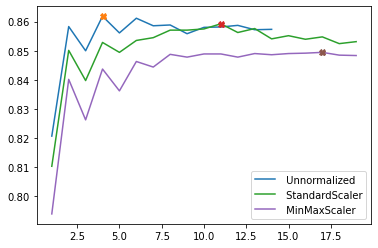

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

params = {'knn__n_neighbors': range(1, 20)}
model_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier())])
cv_std = GridSearchCV(model_std, params, refit=True, cv=10,
                     scoring = make_scorer(accuracy))

cv_std.fit(X_cl_train, y_cl_train)

model_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier())])
cv_minmax = GridSearchCV(model_minmax, params, refit=True, cv=10,
                        scoring = make_scorer(accuracy))

cv_minmax.fit(X_cl_train, y_cl_train)

# Plot the cv lines
show_results(cv, X_cl_val, "param_n_neighbors", prefix="Unnormalized")
show_results(cv_std, X_cl_val, 'param_knn__n_neighbors', "StandardScaler")
show_results(cv_minmax, X_cl_val, 'param_knn__n_neighbors', "MinMaxScaler")

From the plot we can see 3 lines that correspond to the performances of the models in the 3 different conditions:

   - The **blu line** represents the performances of the KNN model with different k values on the unnormalized data
   - The **green line** represents the performances of the KNN model with different k values on the data normalized with range normalization
   - The **purple line** represents the performances of the KNN model with different k values on the data normalized with z-score normalization

We can see that, for most of the k neighbor values, we obtain the best performances with the unnormalized data and as said before the best number of **k is 4**. So for this reason we decided to use this number of neighbors and look at the accuracy of the model.

In [ ]:
# Train a KNN with different k values
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(4)
model_KNN.fit(X_cl_train, y_cl_train)

print("Train accuracy:", accuracy(y_cl_train, model_KNN.predict(X_cl_train)))
print("Validation accuracy:", accuracy(y_cl_val, model_KNN.predict(X_cl_val)))

KNeighborsClassifier(n_neighbors=4)

Train accuracy: 0.8895847515316542
Validation accuracy: 0.854109961894393


From the results, we can see that the model has a slightly better performances on the train data (accuracy = 0.89) with respect to the validation data (accuracy = 0.85).

### EVALUATION ON THE KNN CLASSIFIER

#### - CONFUSION MATRIX ON THE VALIDATION DATA

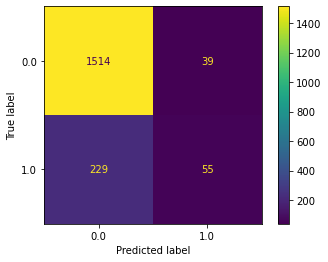

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Create the confusion matrix
cm_KNN = confusion_matrix(y_cl_val, model_KNN.predict(X_cl_val))

# Plot test confution matrix
plot_confusion_matrix(model_KNN, X_cl_val, y_cl_val)

#### - SENSITIVITY, SPECIFICITY, PRECISION AND F1-SCORE

In [ ]:
print("Sensitivity ", sensitivity(cm_KNN))
print("Specificity ", specificity(cm_KNN))
print("Precision ", precision(cm_KNN))
print("F1-score", f1(cm_KNN))

Sensitivity  0.1936619718309859
Specificity  0.9748873148744366
Precision  0.5851063829787234
F1-score 0.29100529100529104


For the KNN classifier, we can see that the sensitivity is really low (0.19) and this is the lowest value for the sensitivity that we saw up to this point. While the specificity is almost 1 (0.97). Regarding the precision we can see that out of the users considered as true positive, more than half are really users who bought something (if compared to the previous classifiers the precision might look higher but we have to remember that the number of users considered as true positive by the KNN model is much lower). Also the F1-score is really low. To try to increase the performances of the model, we decide to use an empirical threshold as we did before:

In [ ]:
# Build the confusion matrix with the new threshold
cm_KNN = confusion_matrix(y_cl_train, predict_th(model_KNN, X_cl_train, th=th_empirical))

print("Sensitivity ", sensitivity(cm_KNN))
print("Specificity ", specificity(cm_KNN))
print("Precision ", precision(cm_KNN))
print("F1-score", f1(cm_KNN))

Sensitivity  1.0
Specificity  0.7680645161290323
Precision  0.443283004258614
F1-score 0.6142703862660944


By using an empirical threshold, we can clearly see that the sensitivity increases to a much higher value than before (0.19 -> 1). As we also saw before, because there is the sensitivity-specificity trade-off, the specificity is lower (0.97 -> 0.76). Also the precision is lower and this is probably due to the fact that we are predicting more true positives but still the model cannot really identify the real true positives. Everything is summarized with the F1-score which is around 0.6.

### 2.8 - SVC (SUPPORT VECTOR CLASSIFIER)

SVC is a classifier algorithm that finds the best separating boundary to divide the data in two classes that reduces the classifier error. To find the best line, the algorithm maximizes the margin, which is defined by the support vectors. When applying this type of classifier algorithm, we do not have to do any statistical assumption on our data, indeed the main goal of these classifiers is the prediction (similar to the KNN classifier). Instead with other classifiers like logistic regression or LDA, the main aim was to study the inference.

A really important function that can be used for the SVC is the kernel function. With the kernel function we can calculate the linear boundary in a multidimensional space. The main advantage of the kernel trick is that we don't have to transpose all the points/observations in the new multidimensional space and calculate the boundary in this new space, but with the kernel trick we already know the results of the transformation in the new space.

Among all the different types of kernel function and depending on our data, we decided to apply the kernel function called **radial basis function**, as you can see below:

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X_cl_train, y_cl_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

After having performed cross-validation, we picked the model with the best performances and analyzed it on the train and validation data:

In [ ]:
model_SVC_rbf = rbf_poly.best_estimator_

train_acc = accuracy(y_cl_train, model_SVC_rbf.predict(X_cl_train))
test_acc = accuracy(y_cl_val, model_SVC_rbf.predict(X_cl_val))

print("SVM train accuracy:", train_acc)
print("SVM validation accuracy:", test_acc)

SVM train accuracy: 0.9873383253914227
SVM validation accuracy: 0.8600979858464889


We can see that the accuracies on the validation and also on the training data set are high (0.86 on the validation data and 0.98 on the train data). As we previously saw with other classifiers, the overall accuracy not always is a precise measurement of the performance of the model, so we decided to further analyze the sensitivity and sensibility and other indexes of this model.

### EVALUATION ON THE SVC CLASSIFIER

#### - CONFUSION MATRIX ON THE VALIDATION DATA

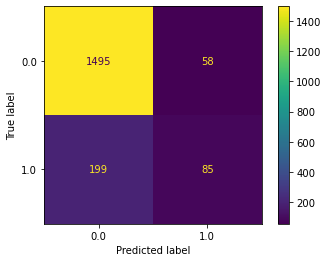

In [ ]:
# Create the confusion matrix
cm_SVC_rbf = confusion_matrix(y_cl_val, model_SVC_rbf.predict(X_cl_val))

# Plot test confution matrix
plot_confusion_matrix(model_SVC_rbf, X_cl_val, y_cl_val)

#### - SENSITIVITY, SPECIFICITY, PRECISION AND F1-SCORE

In [ ]:
print("Sensitivity ", sensitivity(cm_SVC_rbf))
print("Specificity ", specificity(cm_SVC_rbf))
print("Precision ", precision(cm_SVC_rbf))
print("F1-score", f1(cm_SVC_rbf))

Sensitivity  0.2992957746478873
Specificity  0.9626529298132647
Precision  0.5944055944055944
F1-score 0.39812646370023425


For the SVC with the kernel RBF we can see that the specificity is really high while the sensitivity is much lower (0.299) so this means that this classifier is not able to correctly classify the online shoppers who bought something on the website. Among the ones that it identifies as true positive, the ratio of the users that really bought something on the website is 0.59. The low values of sensitivity and precision affect also the value for F1-score (0.39).

To see if there was a possibility to increase the values of the indexes we tried with an empirical threshold, as we did for all the other classifiers:

In [ ]:
# Build the confusion matrix with the new threshold
cm_SVC_rbf = confusion_matrix(y_cl_train, predict_th(model_SVC_rbf, X_cl_train, th=th_empirical))

print("Sensitivity ", sensitivity(cm_SVC_rbf))
print("Specificity ", specificity(cm_SVC_rbf))
print("Precision ", precision(cm_SVC_rbf))
print("F1-score", f1(cm_SVC_rbf))

Sensitivity  0.9606986899563319
Specificity  0.9970967741935484
Precision  0.9838998211091234
F1-score 0.9721608484312859


By using an empirical threashold we can see that both the sensitivity and the specificity are both really high, also the precision and the F1-score are both high.

## 2.9 - EVALUATION OF THE BEST MODEL ON THE VALIDATION SET

After having fitted all the classifier models on the training data, to choose which one was the best we looked at the performances of these models on the validation set. To evaluate which one has the best performances we looked at the ROC curves for each single model.

The ROC curve is a plot were:

   - on the x axis there is the **False Positive Rate** which corresponds to **1 - Specificity**
   - on the y axis there is the **True Positive Rate** which corresponds to the **Sensitivity**
   
An important parameter to evaluate the goodness of a classifier is the **AUC** (Area Under the Curve). The bigger the AUC is, the better the model is. So by keeping this in mind, we first define a function to plot the ROC curves and then we analyzed them:

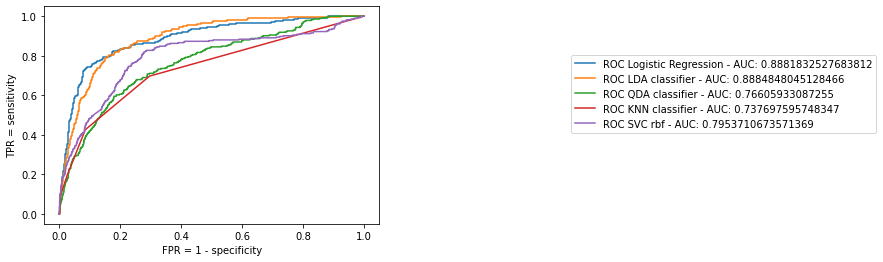

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Define the function to plot the ROC curves
def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,-1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label="ROC "+label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend(loc='upper right', bbox_to_anchor=(2.5, 0.8))

# Plot the ROC curves and also visualize the AUC in the legend
plot_roc(model_cv_lgr.predict_proba, X_cv_lgr_val, y_cv_lgr_val, "Logistic Regression - AUC: {}".format(roc_auc_score(y_cv_lgr_val, model_cv_lgr.predict_proba(X_cv_lgr_val)[:, 1])))
plot_roc(model_LDA.predict_proba, X_cl_val, y_cl_val, "LDA classifier - AUC: {}".format(roc_auc_score(y_cl_val, model_LDA.predict_proba(X_cl_val)[:, 1])))
plot_roc(model_QDA.predict_proba, X_cl_val, y_cl_val, "QDA classifier - AUC: {}".format(roc_auc_score(y_cl_val, model_QDA.predict_proba(X_cl_val)[:, 1])))
plot_roc(model_KNN.predict_proba, X_cl_val, y_cl_val, "KNN classifier - AUC: {}".format(roc_auc_score(y_cl_val, model_KNN.predict_proba(X_cl_val)[:, 1])))
plot_roc(model_SVC_rbf.predict_proba, X_cl_val, y_cl_val, "SVC rbf - AUC: {}".format(roc_auc_score(y_cl_val, model_SVC_rbf.predict_proba(X_cl_val)[:, 1])))


The first thing that we can see is that all the curves/models are over the diagonal (AUC = 0.5) which means that they are all better than a random model. But which one is the best for correctly predicting if an online shopper is likely to perform a purchase?

From the plot we can see that one of the worst classifier for this data-frame is KNN classifier, indeed the AUC for the **KNN classifier** is equal to 0.73 which is the smallest one. The other two classifiers with similar performances are the **QDA** (quadratic linear discriminant analysis) and the **SVC** with a radial basis function kernel. They both have an AUC equal to 0.76 and 0.79.

Instead the performances of the **logistic regression** and the **LDA classifier** on this dataset are both high and really similar. In detail we can see that:

   - For **low thresholds** the Logistic regression classifier is better
   - For **medium thresholds** both models perform the same (indeed the curve overlaps)
   - For **high thresholds** the LDA classifier is slightly better

As we can see both have high AUC, respectively of 0.8884 (**LDA**) and 0.8881 (**Logistic Regression**). This is probably due to the fact that the distribution of the features under each class was very similar to a normal distribution. Even though both model have a very similar AUCs, in the end the LDA classifier is the model with the highest AUC, thus we chose this as the **best classifier** for the train data.

Now we looked at the performances of the LDA classifier on new data (test data) and also evaluated the importance of the ExitRates variable.

LinearDiscriminantAnalysis()

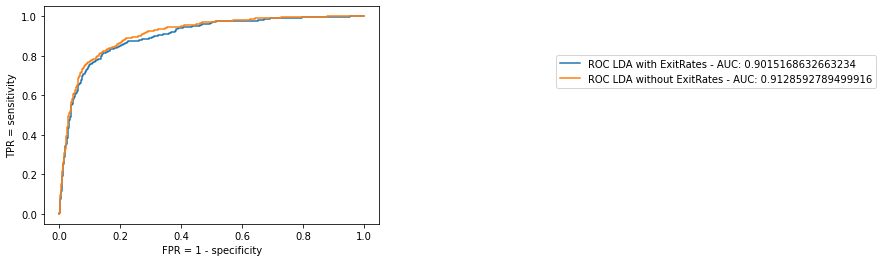

In [ ]:
# Define the data
# With ExitRates
X_full_test_with = X_full_test

# Without ExitRates
X_full_test_without = X_full_test_with.drop(['ExitRates'], axis = 1)

# Transform to Numpy
X_full_test_with = X_full_test_with.to_numpy()
X_full_test_without = X_full_test_without.to_numpy()

# Fitting the model
LDA_model_reduce = LDA()
LDA_model_reduce.fit(X_full_test_without, y_full_test) 

# Plotting the ROC curves
plot_roc(model_LDA.predict_proba, X_full_test_with, y_full_test, "LDA with ExitRates - AUC: {}".format(roc_auc_score(y_full_test, model_LDA.predict_proba(X_full_test_with)[:, 1])))
plot_roc(LDA_model_reduce.predict_proba, X_full_test_without, y_full_test, "LDA without ExitRates - AUC: {}".format(roc_auc_score(y_full_test, LDA_model_reduce.predict_proba(X_full_test_without)[:, 1])))


The first thing that we can observe is that both models, the first one with the variable ExitRates and the second one without exitRates, perform in a very good way on new data/test data. Indeed, for the most part, the two ROC curves overlap (only in a small part they don't). By looking at the AUC we can see that the model with the highest AUC, corresponding to 0.89, is the LDA model without the variable ExitRates.

#### In the end, we can conclude by saying that, even if the two models have similar performances, the reduced model is better than the complete one.

## 3 - CLUSTERING

- **3.1 - METHODS USED FOR THE EVALUATION OF THE CLUSTERING ALGORTHMS**
- **3.2 - HIERARCHICAL CLUSTERING**
- **3.3 - K-MEANS**
- **3.4 - K- PROTOTYPES**
- **3.5 - DBSCAN**
- **3.6 - EVALUATION OF THE BEST MODEL ON THE TEST SET**


Packages and libraries needed for the first part of the analysis:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
from sklearn.metrics import silhouette_score
np.random.seed(0)

To find regularities or groups in our data we decide to use different clustering algorithms. In detail, as in the previous part, we wanted to divide our data in two specific clusters, the first one containing all the online shoppers that bought something on the website and then the second one containing all the online shopper who did not buy anythin gon the website.

The cluster algorithms that we used are divided in two main typologies:

   - **Hierarchical clustering** (it gives us the possible combinations for each k number of cluster)
    
Partitioning clustering:

   - **KNN** (K-nearest neighbour)
   - **DBSCAN** (it is a density based cluster)

An important step to do, before appling all the different clustering algorithm, was to visualize the data. We have to remember that at the moment the data are in a multidimentional space and this means that if we want to visualize them, we have to apply a dimentionality reduction on the data.     

To do that we first had to reshape our data and then we applied different dimensionality reduction algorithms:

   - **PCA** (principal component analysis)
   - **T-sne** (t-distributed stochastic neighbor embedding) 
   - **Umap** (Uniform Manifold Approximation and Projection)

To plot the data in a 2D space we used the function 'scatterplot' from matplotlib while for plotting the data in a 3D space we define a new function:

In [ ]:
def plot3d(X, labels): # each point will be associated to a label
    # Set matplotlib to generate static images
    # %matplotlib inline # To make the plot iterative and explore the plot
    # Set matplotlib as interactive
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    unique_labels = np.unique(labels) #collecting all the unique labels
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))

As said before we reshape the data and then we applied the different algorithm. Because all the cluster algorithms are in an euclidian space, to avoid probelms with the scale of the date we decided to normalize the data:

In [ ]:
from sklearn.preprocessing import StandardScaler

# The train data from which we start
X_cluster_numerical = X_full_train[['Administrative', 'Administrative_Duration', 'Informational',
                                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

X_cluster_categorical = X_full_train[['Weekend', 'Fiscal_quarters_1', 'Fiscal_quarters_2', 'Fiscal_quarters_3',
                                     'Fiscal_quarters_4', 'OperatingSystems_1', 'OperatingSystems_2',
                                     'OperatingSystems_3', 'OperatingSystems_Other_OP', 'TrafficType_1',
                                     'TrafficType_10', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
                                     'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
                                     'TrafficType_Other_TrTy', 'Region_1', 'Region_2', 'Region_3',
                                     'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
                                     'Browser_1', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_Other_Br',
                                     'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor']]

# Scale only the numerical variables
scaler_method = StandardScaler()
X_cluster_scaled = scaler_method.fit_transform(X_cluster_numerical.values)
X_cluster_scaled = pd.DataFrame(X_cluster_scaled)
X_cluster_scaled.columns = X_cluster_numerical.columns
# Concatenate the two arrays
train_cluster = pd.concat((X_cluster_scaled.reset_index(), X_cluster_categorical.reset_index()), axis = 1)
train_cluster = train_cluster.drop(columns = ['index'])

# Just as a confimation
train_cluster.head()

Administrative  Administrative_Duration  Informational  \
0       -0.697766                -0.460811      -0.402177   
1        0.811654                 0.458200      -0.402177   
2        1.415422                 0.048303       0.394542   
3       -0.395882                -0.437648      -0.402177   
4       -0.093998                 0.305900      -0.402177   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.249288       -0.608122                -0.651746   
1               -0.249288        0.434452                 0.098327   
2               -0.249288        0.321129                 0.241486   
3               -0.249288        0.117147                 0.060789   
4               -0.249288       -0.472134                -0.497134   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Region_7  Region_8  \
0    -0.460920   0.765926   -0.320709    2.671109  ...       0.0       0.0   
1    -0.303633  -0.653601   -0.320709   -0.313209  ...       0.0       0.0   
2    -0.377461  -0.475003    0.014806   -0.313209  ...       0.0       0.0   
3    -0.176929  -0.034607   -0.320709    3.665881  ...       0.0       0.0   
4    -0.460920  -0.509613   -0.320709   -0.313209  ...       0.0       0.0   

   Region_9  Browser_1  Browser_2  Browser_4  Browser_5  Browser_Other_Br  \
0       0.0        0.0        1.0        0.0        0.0               0.0   
1       0.0        0.0        1.0        0.0        0.0               0.0   
2       0.0        1.0        0.0        0.0        0.0               0.0   
3       0.0        0.0        1.0        0.0        0.0               0.0   
4       0.0        0.0        0.0        1.0        0.0               0.0   

   VisitorType_New_Visitor  VisitorType_Returning_Visitor  
0                      0.0                            1.0  
1                      0.0                            1.0  
2                      0.0                            1.0  
3                      0.0                            1.0  
4                      1.0                            0.0  

[5 rows x 45 columns]

In [ ]:
dim = train_cluster.shape[1]

# Reshape of the data to allow dimensionality reduction
X_cluster = train_cluster.to_numpy().reshape(-1, dim)
print('X_cluster is a matrix of dimentions: {}'.format(X_cluster.shape))

y_cluster = y_full_train
print('y_cluster is a matrix of dimentions: {}'.format(y_cluster.shape))

X_cluster is a matrix of dimentions: (9182, 45)
y_cluster is a matrix of dimentions: (9182,)


### - PCA (PRINCIPAL COMPONENT ANALYSIS)

The first dimentionality reduction that was applied on our data is PCA. With PCA all the observations present in our data are transpose in a new space that it is identify buy the principal components, which are orthonormal basis. After having projected our data in this new space, we only considered the first 3 PCs and that's because we had to plot them. 

So the plot that you can see below shows all the points in the 3-D space identified by the first (x) principal component, that captures the highest variablity in the data, and by the second (y) and third (z) principal component.

In [ ]:
# FIRSY WE TRANSPOSE THE DATA IN THE NEW SPACE

from sklearn.decomposition import PCA
# Define PCA with 3 components 
pca_3 = PCA(n_components=3)

# Project the data on a 2D space indentified by the first two principal component
X_prj_3 = pca_3.fit_transform(X_cluster)
print('Dimentions of the data after PCA: {}'.format(X_prj_3.shape))

Dimentions of the data after PCA: (9182, 3)


After translating the data in the new space definied by only the **first 3 principal component** we can see that the dimentions of the data now consist of 9182 rows and the 3 principal component. So we plotted the data:

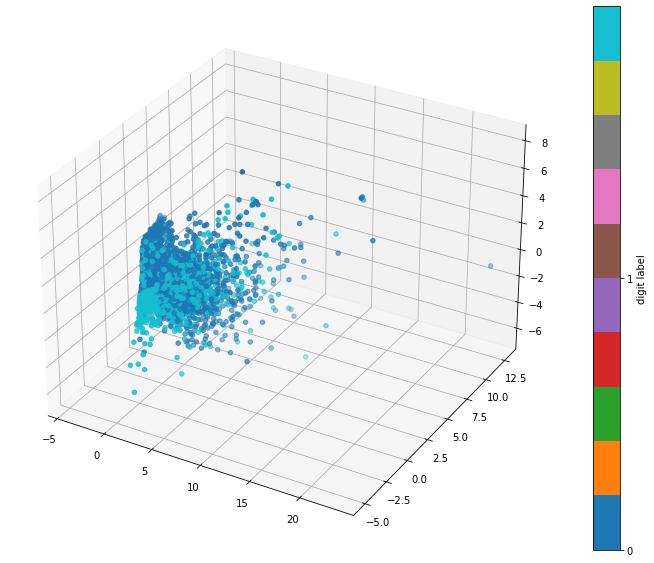

In [ ]:
plot3d(X_prj_3, labels=y_cluster)

From the plot we can see that there are two clusters (the blu and light-blue one) but the plot doesn't show us if and how these two groups/clusters are divided. This result was exepted because the PCA is a very good dimentionality reduction algortihm but it is not suggest it to use it to visualize the data. Indeed plotting the data along the first, the second and the third princpial components (PCs) doesn't give us a lot of information.

So, because PCA is not the best method for clustering visualization, to inspect in a better way our data, we decided to plot it in a 2D space after using the dimensionality reduction tools called **Tsne** and **Umap**. These other two algorithms instead are very good for the visualization of the data and so more 'human-eye frendly'.

### - TSNE (T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING) 

As before, we did the transformation with the provided function (TSNE) and them we plotted the data in a 2-D space:

In [ ]:
from sklearn.manifold import TSNE

def plot_TSNE(X, labels):
    # Defining the TSNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=0)

    # Applying TSNE on our data
    X_tsne = tsne.fit_transform(X) 

    # Ploting the data
    sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue = labels,
                    palette=sns.color_palette("hls", 2), s= 2,
                    data=X_tsne).set(title="T-SNE projection") 

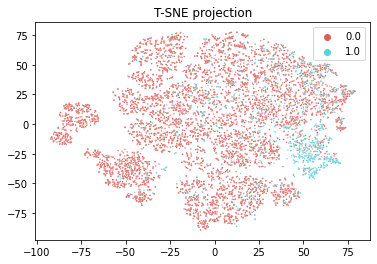

In [ ]:
plot_TSNE(X_cluster, labels = y_cluster)

As expected, we can better observed the distribution of the data but it is still difficult to identify a cluster for the online shoppers who buy and the ones that don't buy. To look even better we also used another dimentionality reduction method called UMAP.


## 3.1 - METHODS USED FOR THE EVALUATION OF THE CLUSTERING ALGORTHMS

To evaluate the different clustering methods used in the analysis we decide to use correlation between matrixes, internal indexes and also external indexes. We were able to use external indexes because we had the information of the variable 'Revenue'. Usually this is something really rare, indeed clustering is usually done in a unsupervided environment or on data where only a small portion is labeled. For us, this wasn't the case because, as said before, we had all the point already labeled.

#### - INTERNAL INDEXES

We used different internaal indexes to evaluate the clustering methods:

   - WSS (Within Sum of Squares) score (measures the affinity amog all clusters)
   - BSS (Between Sum of Squares) score (menasures how weel-sapareted a cluster is from the others)
   - Silhuette score (is a combination of the WSS and of the BSS)

#### - EXTERNAL INDEXES INDEXES
As said before, we were able also to use external indexes such as:

   - Recall: number of elements of cluster K also belonging to class j over the number of elements of class j
   - Precision: number of elements of cluster K also belonging to class j over the number of elements of cluster k
   - Purity: maximum precision of a class into a specific cluster
   - Total Purity: How much the clustering method is good in dividing the data

Below we define the different functions for each single evaluation method:

In [ ]:
# INTERNAL INDEXES

def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = dist_mat * inc
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    wss = (dist_mat[triu_idx] ** 2).sum()
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat =  dist_mat * (1 - inc)
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = (dist_mat[triu_idx] ** 2).sum()
    
    return bss

In [ ]:
# EXTERNAL INDEXES

from sklearn.metrics import jaccard_score

def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    _, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    _, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r + 1e-8)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

def jaccard_index(y_predict, y_true):
    s = jaccard_score(y_true, y_predict)
    return s

In [ ]:
# DEFINE FUNCTIONS FOR SIMILARITY MATRIX, INCIDENCE MATRIX AND CORRELATION BETWEEN THE TWO

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred) # what are the label of the cluster
    nclusters = clusters.shape[0] # how many cluster do we have
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i) #indices of the samples in this cluster
        # Compute combinations of these indices
        xx, yy = np.meshgrid(sample_idx, sample_idx)
        mat[xx, yy] = 1
        
    return mat

# This function is useful to compute all the possible pairwise distances
def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = inc @ sim.T # dot product
    
    return corr[0,0]

## 3.2 - HIERARCHICAL CLUSTERING

With this clustering method, all the points/observations are divided in a hierachy of clusters. For this project we decide to use **Bottom-up** or **agglomerative** hierarchical clustering. 

This type of algorithm starts assuming that each single observation is cluster so, at the beginning, there are k cluster formed by only one observation. After that, depending on the chosen distance matrix and the type of the linkage, the algorithm merges together the two closest/most similar clusters. This step is repeated until all the clusters are merged into one single one (so from k cluster of 1 observation, with K equals to number of points, we will get 1 cluster of k observations).

One of the main advantages of hierarchical clustering, with respect to other clustering algorithm as k-means, is that we didn't have to choose the number of cluster a priori. This is because with the hierarchical clustering we obtain a solution for each number of cluster. So we can choose the number of cluster based on the results that we have obtained.

### - PLOTTING THE DENDROGRAM

The dendrogram is a graph that dispalys the different clusters and by tracing the lines in the graph we can see how similar of dissimilar two groups of data are. At each step of the graph, that corriponds to a specific number of clusters/groups, we can see how the data is divided depending on their similarities and dissimilarities.

Even though we will later see what is the best number of cluster, for the moment we choose to use 2 as the number of cluster. So on the dendrogram we initially set the threshold for the number of cluster to 2. We chose this specific number because, as said before, we want to divide the online shoppers in two groups:

   - the ones who bought something on the website
   - the ones who didn't buy anything on the website
   
Below we define the function to plot the dendrogram:

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)
    
    # Not all the model can create a linkage matrix but also it could be expensive
    # to create a likage matrix
    
    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
        #kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs)
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

In [ ]:
# Recursively backtrack the dendrogram, collecting
# the list of sample id starting from an initial point
def get_node_leaves(Z, idx, N):
    n1, n2 = int(Z[idx,0]), int(Z[idx,1])
    leaves = []
    for n in [n1, n2]:
        if n < N:
            leaves += [n]
        else:
            leaves += get_node_leaves(Z, n-N, N)
    return leaves

In [ ]:
# Plot a number of images (at most maxn) under a cluster/sample id
def plot_node(Z, X, y, idx, maxn=15*15):
    leaves = get_node_leaves(Z, idx, X.shape[0])
    labels, counts = np.unique(y[leaves], return_counts=True)
    nleaves = len(leaves)
    print(pd.DataFrame(np.array(counts).reshape(1,-1), 
                       columns=labels, index=["Frequency:"]))
    print("Images in the cluster:", len(leaves), "/", X.shape[0])

    random.shuffle(leaves)
    leaves = leaves[:maxn]
    h = min((nleaves // 15)+1, 15)
    w = nleaves if nleaves < 15 else 15
    
    fig, axes = plt.subplots(h, w, figsize=(w, h),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

    # For each subfigure (from 0 to 100 in the 10x10 matrix)
    for i, ax in enumerate(axes.flat):
        if i < nleaves:
            ax.imshow(X[leaves[i]].reshape(8, 8), cmap='binary', interpolation='nearest')
            ax.text(0.05, 0.05, str(y[leaves[i]]), transform=ax.transAxes, color='r')
        else:
            ax.set_axis_off()

### LINKAGE METHODS

For the hierarchical cluster, we have different type of linkage methods and depending on the type of chosen linkage, the final results and the divison of the points in different clusters might change. So we analyzed one by one all the different types of linkage and we evaluate the best one with external indexes.

#### - SINGLE LINKAGE
The first type of linkage that we tried is the single linkage, so this means that the distance between two clusters is calculated as the distance between the two closest points of the two clusters. This type of linkage has the advantage to handle non elliptical shaped clusters and so is appropriate for elongated or chain-like clusters but has the disadvantage of being sensitive to noise and outliers.

Below we define the linkage and then looked at the dendrogram:

Text(0.5, 1.0, 'single')

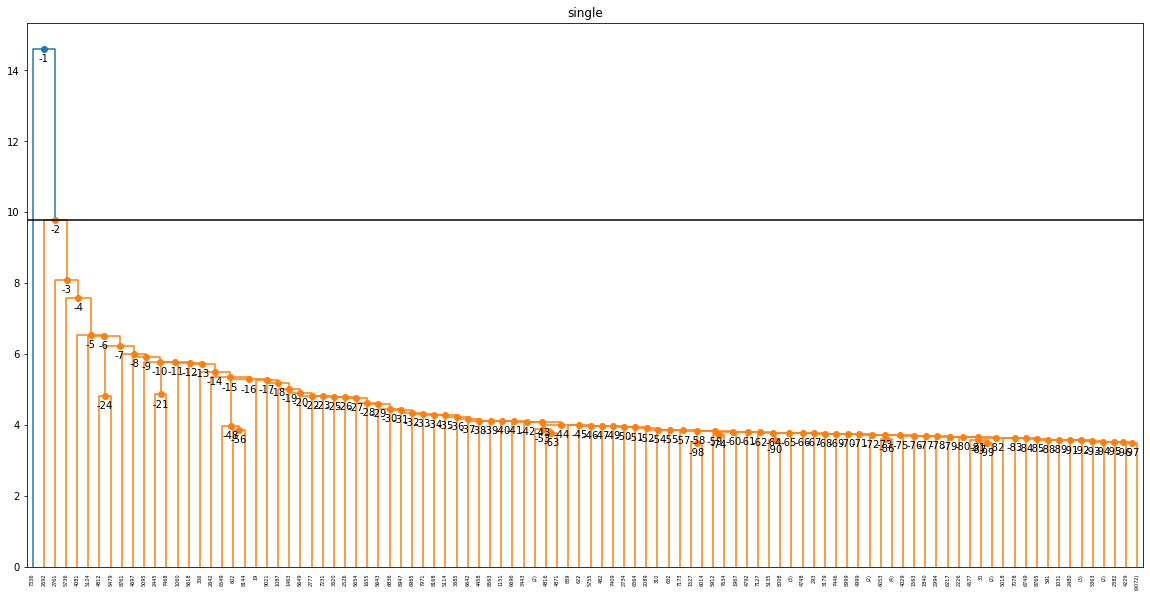

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Define the parameters and the number of clusters
distance_threshold=None
n_clusters=2

# Dendrogram plot
Z_single = linkage(X_cluster, method='single', metric='euclidean')
fig, ax = plot_dendrogram(Z=Z_single, X=X_cluster, truncate_mode='lastp', 
                              p=100, n_clusters=2)
ax.set_title('single')

From the dendrogram we can see that with the single linkage almost all of the observations are grouped in the orange cluster, while only a few observations are in the blue cluster. This is probably due to the fact that our points are close together. We can also see in the dendrogram, as expected, that we got really small jumps.

To better look at the results we fit the hierarchical clustering algorithm with single linkage on the data and looked at the visualization with the different dimensionality reduction tools:

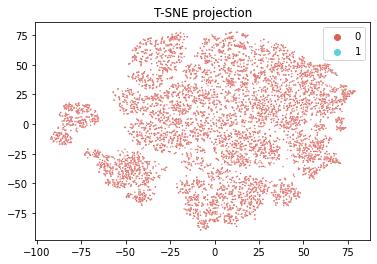

In [ ]:
# Define the model with the single linkage
model_HC_single = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'single')

y_predict_single = model_HC_single.fit_predict(X_cluster)

# Plot the data with TSNE
plot_TSNE(X_cluster, labels = y_predict_single)
plt.show()

As previously saw from the dendrogram (where all the points were grouped in a single cluster) we can also see from the visualization with PCA and TSNE that almost all the points are clustered in one single group. The reason why the single linkage did not wrok good on our data is because the shape of data is not ideal for this type of linkage and also because all the points are close together.

In [ ]:
from sklearn.metrics import silhouette_score

# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_single, y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_single, y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_single, y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_single, y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_single, y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_single, y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_single, y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_single, y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_single, y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_single, y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_single, y_cluster)))

silhouette_score(X_cluster, y_predict_single, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.8443524670505997
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.9999999900000002
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.15564753294831102
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.0
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.9998710176692895
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.000128982329420703
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.9999999999930022
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.0
Purity for cluster 0: 0.8443524670505997
Purity for cluster 1: 0.9999999900000002
Total purity is: 0.8443694184253492


0.8319097235768009

The information captures from the **external indexes** are:

- From the results of the **precision**, we can see that almost all the observations included in cluster 0 and 1 are online shoppers who did not buy anything on the website (class 0) while online shoppers who bought something on the website are all in cluster 0 (no one is included in cluster 1, indeed the precision for these observations is 0).

- From the **recall** values, we can see that out of all the observations associated to class 0 and also class 1, most of them are included in cluster 0 while in cluster 1 they are present only observations from class 0 (as we previously saw).

- Regarding the **purity** of cluster 0 we can see that it is very high (0.84) and this is probably due to the fact that we have unbalanced classes (most of the online shoppers belong to class 0) and also the purity of the cluster 1 is also high (0.99) and the reason is that, as we saw from precision and recall, all the online shopper in cluster 1 are from class 0.

- In the end the **total purity** is 0.844 which is, again, really high but this index can be affected by class balance (and in our dataset, as explained before, the classes are not balanced), therefore it is crucial to also use other evaluation matrices to have a broader view on the subject. For this reason, we decided also to look at the **silhouette index** which, for the single linkage, was equal to 0,832.

After the evaluation on the single linkage we can see that this type of linkage is not able to correctly divide the online shoppers between the ones that bought something on the website with respect to the ones that didn't buy anything. The main reasons for this behavior are:

    - The shape of the cluster, indeed as explained before, the single linkage works the best with elongated or chain-like clusters, which is not our case
    - It is sensitive to noise and usually doesn't work the best with clusters that are close together like in our case.
    
Therefore it tends to group all the observations mostly in 1 big cluster.


### - COMPLETE LINKAGE
The next type of linkage that we evaluated was the complete linkage. In this case the distance between two clusters is calculated as the distance between the two most distance points of the two clusters. This type of linkage, with respect to the single, is robust to noise and outliers but usually, when we have very large clusters, it breaks them into smaller clusters; moreover, Complete linkage works well for data that we expect to have compact, spherical clusters.

As before, we first analyzed the dendrogram:

Text(0.5, 1.0, 'complete')

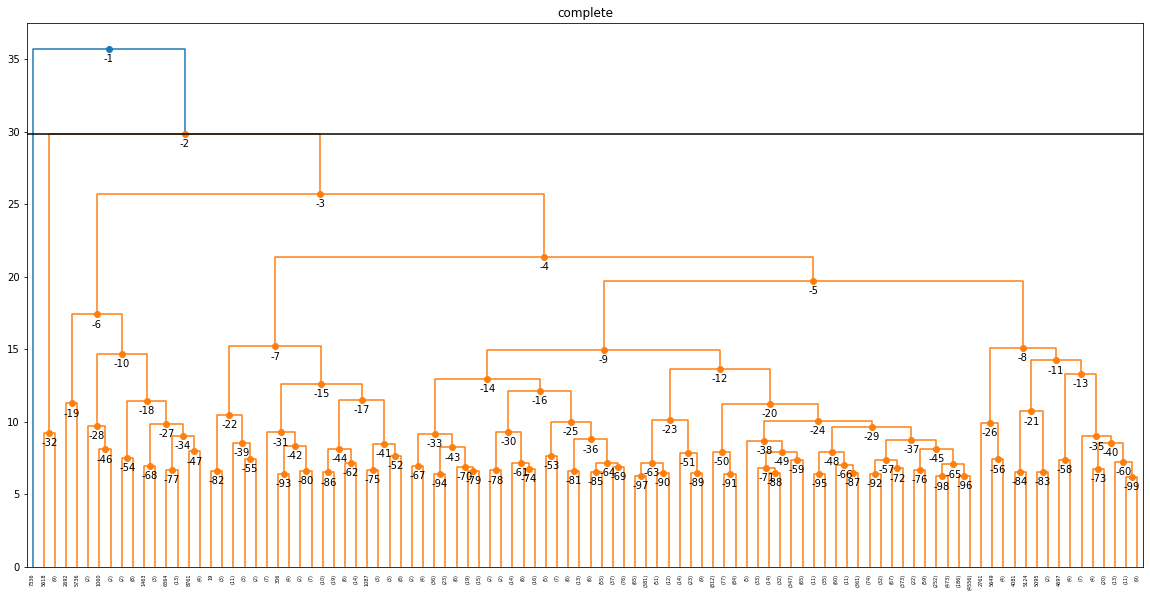

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Define the parameters and the number of clusters
distance_threshold=None
n_clusters=2

# Dendrogram plot
Z_complete = linkage(X_cluster, method='complete', metric='euclidean')
fig, ax = plot_dendrogram(Z=Z_complete, X=X_cluster, truncate_mode='lastp', 
                              p=100, n_clusters=2)
ax.set_title('complete')

With the complete linkage we got a dendrogram where almost all the points are again clustered in one single cluster but in this case, with respect to the single linkage, we can see from the dendrogram that the jumps among clusters are much bigger than before. 

As before, we looked also at the visualization of the data with the different dimensionality reduction methods:

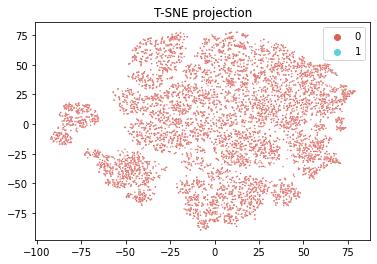

In [ ]:
# Define the model with the complete linkage
model_HC_complete = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'complete')

y_predict_complete = model_HC_complete.fit_predict(X_cluster)

# Plot the data with TSNE
plot_TSNE(X_cluster, labels = y_predict_complete)
plt.show()

Very similar to the single linkage, we obtained almost all the points in one single cluster (red cluster). We evaluated this type of linkage with external linkage:

In [ ]:
from sklearn.metrics import silhouette_score

# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_complete, y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_complete, y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_complete, y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_complete, y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_complete, y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_complete, y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_complete, y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_complete, y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_complete, y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_complete, y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_complete, y_cluster)))

silhouette_score(X_cluster, y_predict_complete, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.8443524670505997
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.9999999900000002
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.15564753294831102
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.0
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.9998710176692895
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.000128982329420703
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.9999999999930022
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.0
Purity for cluster 0: 0.8443524670505997
Purity for cluster 1: 0.9999999900000002
Total purity is: 0.8443694184253492


0.8319097235768009

The values we obtained are identical to the analysis done with the single linkage, therefore what we already commented can be applied also here.

From the theory we know that the main issue with complete linkage is that it is sensitive to the problem of  “crowding” when clusters are of varying densities, and in our specific case our clusters have very different densities, therefore it explain why it tends to group all the observation mostly in one big cluster.

### - AVERAGE LINKAGE
The third type of linkage used is called 'average linkage' and the distance between two clusters is represented by the mean of the all pairwise distances between all the observations of the first cluster and the observation of the second cluster. So it is a type of linkage in between the complete linkage and the single linkage and it overcomes the disadvantage of these two types of linkage but, because every time the algorithm has to calculate the average of the pairwise distance, it is a very heavy computational algorithm.

As for the others types of linkage, we first looked at the dendrogram:

Text(0.5, 1.0, 'average')

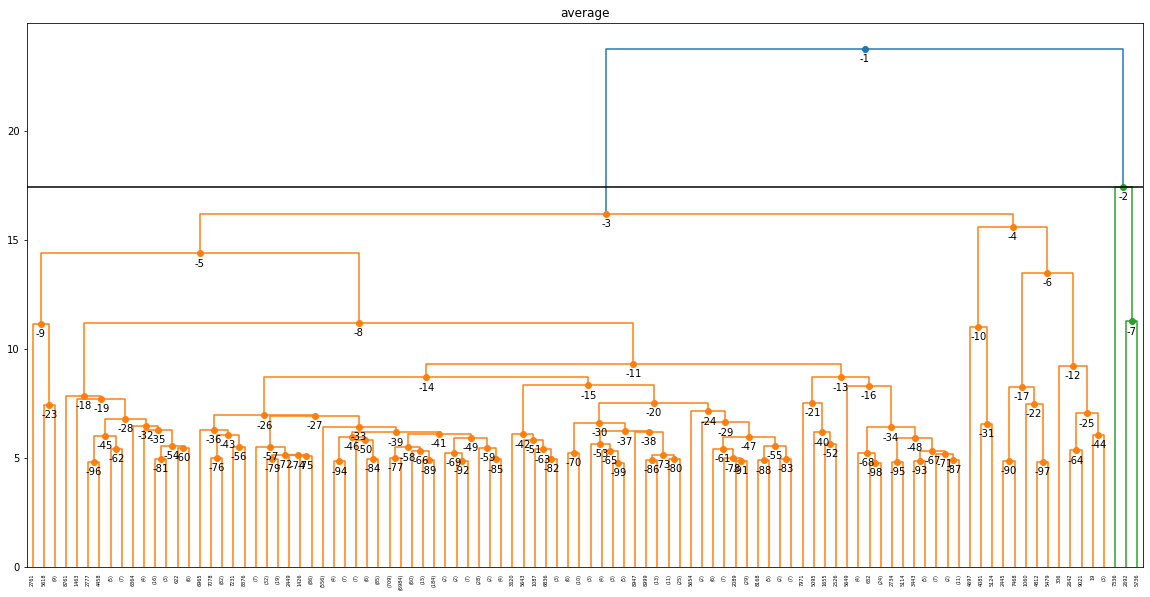

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Define the parameters and the number of clusters
distance_threshold=None
n_clusters=2

# Dendrogram plot
Z_complete = linkage(X_cluster, method='average', metric='euclidean')
fig, ax = plot_dendrogram(Z=Z_complete, X=X_cluster, truncate_mode='lastp', 
                              p=100, n_clusters=2)
ax.set_title('average')

As we can see from the dendrogram, the observations are better divided in the two clusters. We can always see that in one cluster (the green one) we have far less observations but this is also due to the fact that the two groups defined in the variable Revenue are not balanced. Indeed as we saw in the second selection we have 1429 online shoppers who bought something and 7752 online shoppers that did not buy anything.

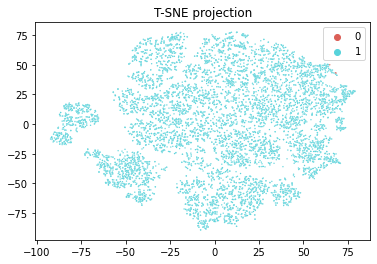

In [ ]:
# Define the model with the average linkage
model_HC_average = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'average')

y_predict_average = model_HC_average.fit_predict(X_cluster)

# Plot the data with TSNE
plot_TSNE(X_cluster, labels = y_predict_average)
plt.show()

With the average linkage we can see that we still obtain all the points clustering in one main cluster. So, again, the results are similar to the ones obtained with single and complete linkage.

In [ ]:
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average, y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average, y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average, y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average, y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_average, y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_average, y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_average, y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_average, y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_average, y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_average, y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_average, y_cluster)))

silhouette_score(X_cluster, y_predict_average, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.9999999966666667
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.844318553218385
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.0
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.15568144678052545
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.0003869469882621089
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.9996130530104481
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.0
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.9999999999930022
Purity for cluster 0: 0.9999999966666667
Purity for cluster 1: 0.844318553218385
Total purity is: 0.8443694184253491


0.7949394442347415

- From the precision values we can see that in cluster 0 we found almost all of the observations of class 0 and class 1. While  in cluster 1 we found observations from class 1, and we didn't find observations from cluster 0.

- The Recall values show that complete linkage can divide quite well the observations in the 2 clusters, thought it still tends to put some observations of class 1 in cluster 0 it is less common respect to the previous types of linkage we tried. 
- For the average linkage purity for cluster 1 is 0,844 while for cluster 0 is 0,999, those values are high but as said before we should also look at the total purity and silhouette score to confirm that. The total purity is 0.844 which means that this type of clustering method might be able to divide the observations between class 0 and class 1. The same thing was confirmed by the high silhouette score of 0,795.

From the theory we know that the main issue of Average Linkage is that it is computationally more expensive with respect to single and complete linkage, it is also sensitive to noise and outliers, even if less with respect to single linkage. Therefore, we can say that most of the problems related to single and complete linkage can be overcome.

As a final consideration we wanted to highlight the fact that in all the 3 types of linkages we have tried so far, most of the observations are grouped in 1 big cluster since we have 84,4% of observations that represent people who hadn’t bought anything.

### - WARD LINKAGE

In this case, the distance between two clusters is given by the distance between the two centroids of the two clusters. A centroid represents the center of the cluster, so at each step the algorithm calculates again the position of the clusters and then it computes the distance between the centroids. Ward's method is often preferred for balanced, compact clusters and when you want to minimize the variance within clusters. It is also the default method used for linkage.

As for all the other linkages, we did an explorative analysis on the dendrogram:

Text(0.5, 1.0, 'ward')

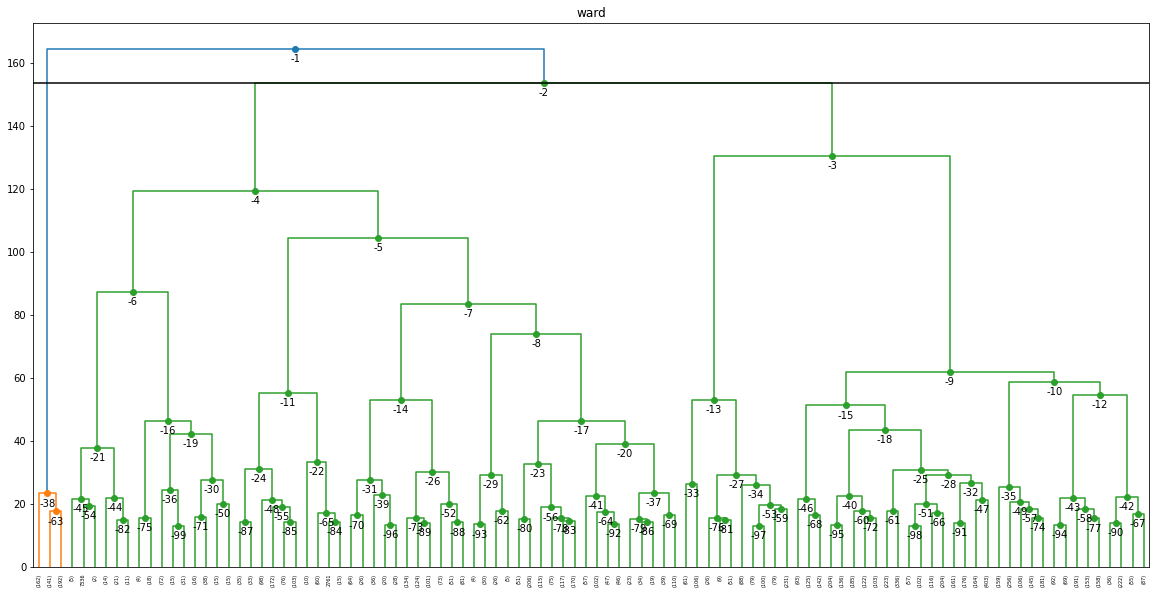

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Define the parameters and the number of clusters
distance_threshold=None
n_clusters=2

# Dendrogram plot
Z_ward = linkage(X_cluster, method='ward', metric='euclidean')
fig, ax = plot_dendrogram(Z=Z_ward, X=X_cluster, truncate_mode='lastp', 
                              p=100, n_clusters=2)
ax.set_title('ward')

With the ward linkage and by considering only 2 main clusters we can see that some of the points are clustered in the orange cluster while the majority of tthe points are in the second cluster.

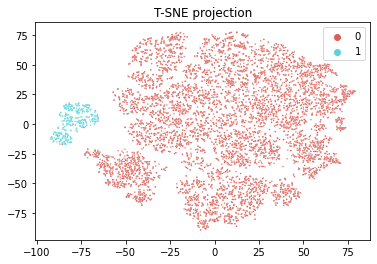

In [ ]:
# Define the model with the single linkage
model_HC_ward = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'ward')

y_predict_ward = model_HC_ward.fit_predict(X_cluster)

# Plot the data with TSNE
plot_TSNE(X_cluster, labels = y_predict_ward)
plt.show()

This is the only type of linkage where the observations were divided into two main clusters (red and blue). Even though we can clearly see the division, we can also see that the blue cluster, which represents the **class 1**, if compared to the visualization with true labels, doesn't overlap or is not close to the observation that represents the online shopper that bought something. Even though this is the case, the further analyzed this type of linkage also with different evaluating methods:

**- EVALUATION WITH EXTERNAL INDEXES**

In [ ]:
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_ward, y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_ward, y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_ward, y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_ward, y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_ward, y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_ward, y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_ward, y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_ward, y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_ward, y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_ward, y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_ward, y_cluster)))

silhouette_score(X_cluster, y_predict_ward, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.8358466674331346
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.9939393939193143
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.1641533325657141
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.006060606060483624
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.9365406939237243
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.06345930607498587
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.9979006298040736
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.002099370188928626
Purity for cluster 0: 0.8358466674331346
Purity for cluster 1: 0.9939393939193143
Total purity is: 0.844369418425365


0.3120740504315671

- From the precision values we can see that in cluster 0, like in the previous cases we have both observation coming from class 1 and class 0, Instead in cluster 1 most of the observations are from class 0 and just a few of them are from class 1.

- From the recall values we can see that out of all the observations in class 0 most of the observations are in cluster 0 while for cluster 1 we can see that it has more observations coming from class 0 than from class 1.

- The purity for all the two clusters is high in both cases (for cluster 1 it is 0.995 and for cluster 0 it is 0.835) while the total purity is equal to 0.844. As we did also for the other linkage types, we analyzed the silhouette score and it was 0.312, which is quite low.

from the theory we know that Ward linkage, has the same problems of average linkage, but in our case it tends to create a cluster (cluster 1) that has more observation with respect to the cluster that is created with the previous linkage methods (we see it from the tsne), but it put in this clusters observations from the wrong class, so we decided not to use this method as the selected one.

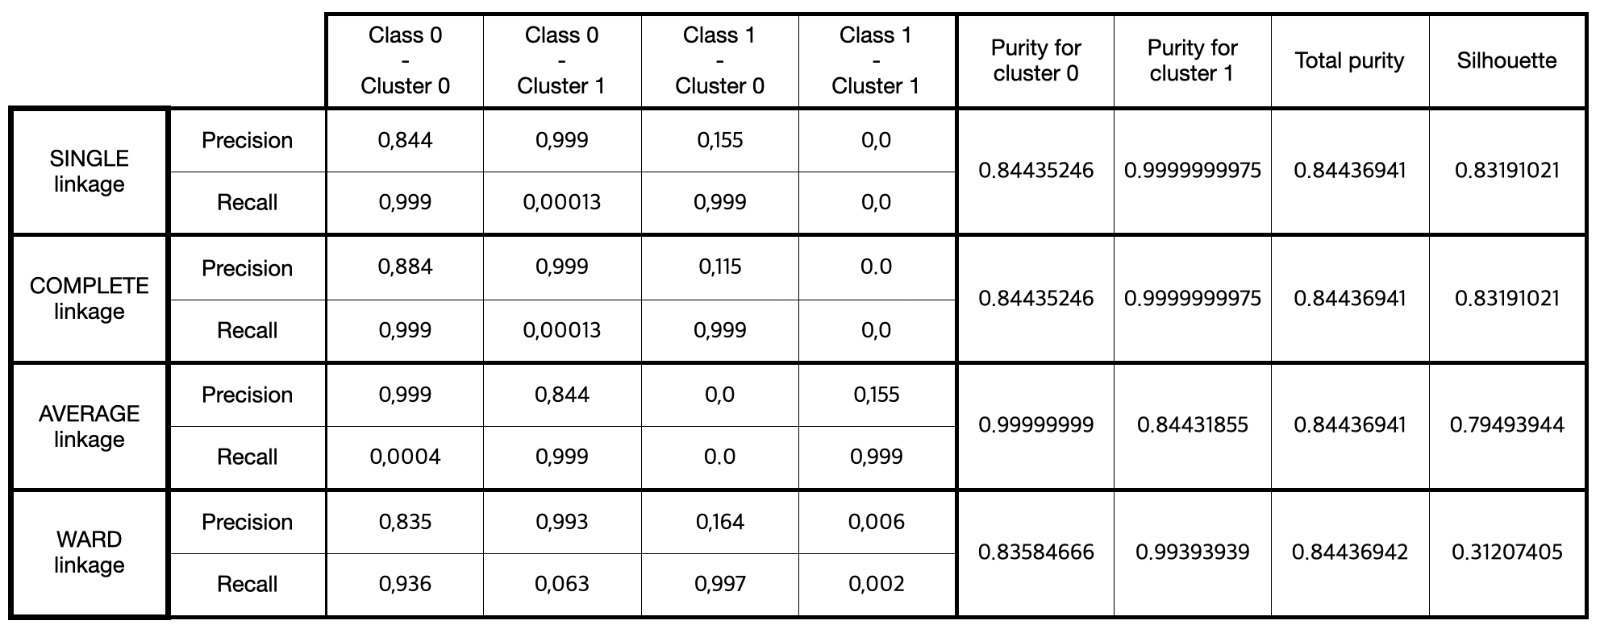

Finally, comparing all the results from the various types of linkages, we decided to consider the average linkage as the best one: indeed, while it has slightly worse outcomes than both the single and the complete linkage it is the one that can be considered “in between” the complete linkage and the single linkage and it overcomes the disadvantage of these two types of linkage (even if it is more computationally heavy).

### WHAT IS THE BEST NUMBER OF CLUSTER FOR HIERARCHICAL CLUSTERING?

Up to this point, we always use the number 2 as the thresholds on the dendrogram plot for identifying the clusters in our data because, as explained before, we were looking to group online shoppers who bought something and online shoppers who didn't buy anything on the website. To find if this is really the best number of cluster for the hierarchical clustering with ward linkage out, we decided to use different internal indexed like:

   - WSS (Within Sum of Squares) score quantifies how tightly the data points are clustered around their respective cluster centers. A lower WSS value indicates better cohesion and, consequently, better-defined and compact clusters. the formula used to calculate WSS is:
   $$
   WSS = \sum_{i=1}^{n} \sum_{j=1}^{k} ||x_i - c_j||^2
   $$
   where:
            -x_i represents a data point in the dataset,
            -c_j represents the centroid (cluster center) of the cluster to which the data point x_i belongs,
            -||x_i - c_j|| is the Euclidean distance between the data point x_i and the centroid c_j.

   - BSS (Between Sum of Squares) score measures the dispersion or variance between the cluster centroids in a clustering algorithm. It quantifies how distinct or well-separated the clusters are from each other. The formula used to calculate BSS is:
   $$
   BSS = \sum_{j=1}^{k} n_j \cdot ||c_j - c||^2
   $$
   where:
            -n_j represents the number of data points in cluster j,
            -c_j represents the centroid (cluster center) of cluster j,
            -c represents the overall centroid (mean) of all data points.
   
   - Silhouette score (is a combination of the WSS and of the BSS),it measures how well-separated clusters are and how similar data points are to their own cluster compared to other clusters. The Silhouette Score ranges from -1 to 1, where: a score close to 1 indicates that data points are well-clustered and appropriately assigned to the correct clusters. A score close to 0 indicates overlapping clusters or that data points are on or very close to the decision boundary between clusters. A score close to -1 indicates that data points may have been assigned to the wrong clusters. the formula here is:
  
   $$
   silhouette(i) = (b(i) - a(i)) / max(a(i), b(i))
   $$
   where:
            -a(i) is the average distance between data point i and all other data points in the same cluster (intra-cluster distance).
            -b(i) is the average distance between data point i and all data points in the nearest neighboring cluster (inter-cluster distance).
  
We first calculated the values for the WSS and BSS and then we plotted the results:

In [ ]:
print("WSS", wss(X_cluster, y_predict_ward, 'euclidean'))
print("BSS", bss(X_cluster, y_predict_ward, 'euclidean'))

WSS 971890789.8109355
BSS 196215677.18906537


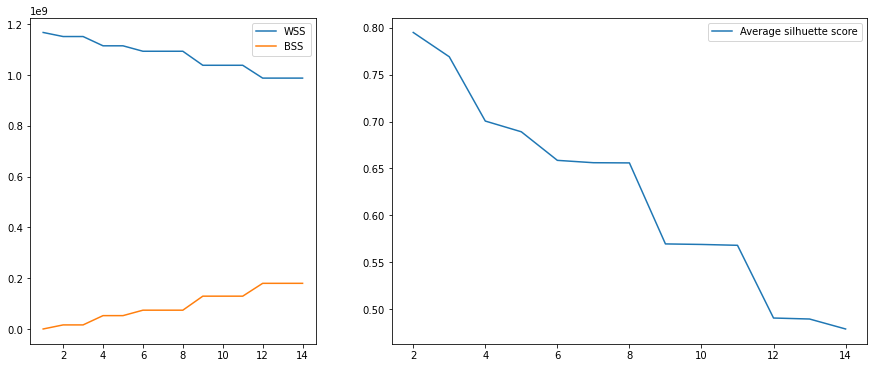

In [ ]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model_HC_average = AgglomerativeClustering(n_clusters=nc,
                                    affinity='euclidean', 
                                    linkage='average')

    y_predict_average = model_HC_average.fit_predict(X_cluster) # Doing the prediction
    
    wss_list.append(wss(X_cluster, y_predict_average, 'euclidean'))
    bss_list.append(bss(X_cluster, y_predict_average, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X_cluster, y_predict_average, metric='euclidean'))

# Create the graph and table side by side
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 5])

# Plotting the elbow plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(clus_list, wss_list, label='WSS')
ax1.plot(clus_list, bss_list, label='BSS')
ax1.legend()

# plotting the siluette score (the higher the better)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(clus_list[1:], sil_list, label='Average silhuette score')
ax2.legend()

#### WHAT ARE THE INFORMATION THAT WE CAN LEARN FROM THESE PLOTS?

In the first plot there are two lines:
   - The **blue line**, which represents the scores of the WSS (Within Sum of Squares) for each number of clusters (from 1 to 15). This specific plot is also called an elbow plot because we should observe that the line has an initial quick drop followed by a plateau. In our case, because the most of the observation are grouped in one single cluster, we do not observe the usual elbow plot. Indeed, all the obeservation in the same cluster are all far from one another. So in our case this plot was not very informative.
   - The **orange line** represents the score of the BSS (Between Sum of Squares) for each number of clusters evaluated. The analysis and the considerations that we did are very similar to the ones that we already did for the WSS. Indeed by looking at the plot, it was not very informative.
   
N.B. Even though the first plot is not very informative we also have to remember that WSS takes in consideration only the cohesion as the SSE (Sum of Square Error) while BSS takes in consideration only the separation so in the end the silhouette score (that takes in consideration both of them) is more reliable.
   
Indeed on the second plot, we can see a different Silhouette score for each number of clusters that we considered. In this case the best number of clusters corresponds to the highest score observed and in this case it is again 2. Moreover we can also see that in the first plot the point where the 2 curves converge is 2 and this confirm what we obtain from the second plot

Therefore, after analyzing these results, we confirmed that the best number of clusters was 2. This is in agreement with the fact that we expect to obtain 2 clusters, one for the people that bought something and one for those that hadn't bought anything.

Regarding another type of evaluation, we didn't evaluate the clustering methods with the correlation between similarity matrix and incidence matrix because when the clusters are not well separated, as in our case, they are not a good measure of evaluation.

## 3.3 - K-MEANS
K-means, as said before, is a heuristic algorithm which is included among the partitional clustering methods. A very important step for the k-means algorithm is the initialization of the algorithm and the choice for the final number of clusters.
Regarding the final number of clusters, because we know a priori that we had two main classes considering the variable 'Revenue', we decided to use 2 as the final number of clusters. While for the initialization step we tried different initialization for the k means and in tìdetail we tried:

   - **K-Means++**
   - **Random initialization**
   
Below we started with analyzing the first type of initialization:

#### - FIRST INITIALIZATION: K-MEANS++

This type of initialization chooses first centroids in a random way while the second centroid is assigned depending on the position of the first centroid. Indeed the second centroid is placed maximizing the squared distance from the first centroid. The same operation is repeated with all the other centroids. In our case, as previously said, we set the number of cluster equal to 2.

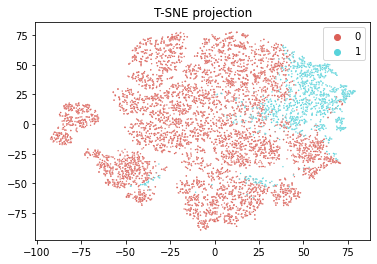

In [ ]:
from sklearn.cluster import KMeans

# K-Means++
kmeans_plus = KMeans(n_clusters = 2, init='k-means++', random_state=0)             

plot_TSNE(X_cluster, labels = kmeans_plus.fit_predict(X_cluster))
plt.show()

From the visualization with TSNE we can see that with this type of initialization most of the observations belong to the first cluster (red cluster) while a minority belong to the second cluster (blue cluster). If we compare this visualization with the one obtain using the true labels of the points (saw at the beginning of the clustering part), we can see that k-means is able to cluster some online shopper who bought something on the website in the same cluster (cluster blue) and differentiating them from the users of class 0. After looking at these results we also looked at the other initialization (random) to see if there were any differences.

#### - SECOND INITIALIZATION: RANDOM

With this type of initialization the algorithm chooses the centroids in a random way, for this reason it is not very reliable but we chose to do it to have a comparison with the first initialization which is very robust.

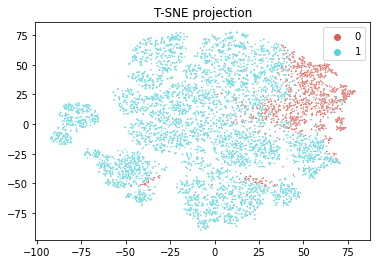

In [ ]:
# Random
kmeans_random = KMeans(n_clusters= 2, init='random', random_state=0)             

# Plot with TSNE
plot_TSNE(X_cluster, labels = kmeans_random.fit_predict(X_cluster))
plt.show()

From the plot we can see a very similar result to the one that we obtained with the other initialization, which is more robust than the random one. The fact that the results are very similar is probably due to the fact that we are dividing our data in only two clusters, so the algorithm of k-means has to assign only two centroids. The first one in both initialization is decided at random (so it is the same) while the two initializations differ on the assignment of the second centroid, but even if in one case is random, where the second centroid is placed should be very similar.

### WHAT IS THE BEST NUMBER OF CLUSTER FOR K-MEANS CLUSTERING?

After we analyzed the two initializations and decided that to continue with with the k-means ++ initialization (which is more robust), we wanted to see if the best number of clusters was really 2 or it was a different number of clusters. For this reason we plotted the WSS, BSS and the silhouette scores.

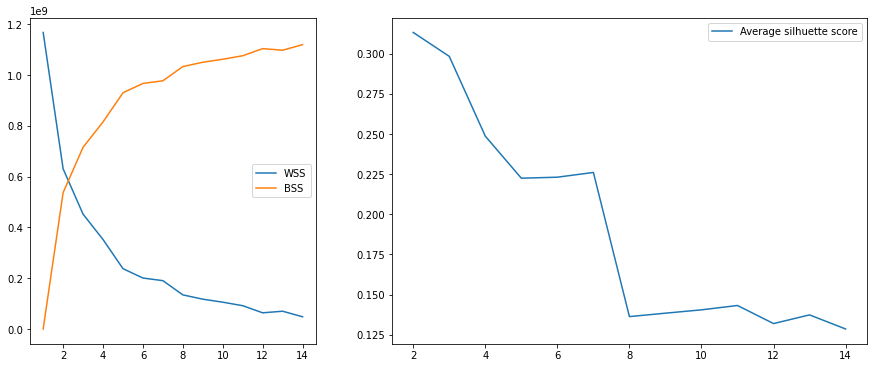

In [ ]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    kmeans_plus = KMeans(n_clusters = nc, init='k-means++', random_state=0)    

    y_predict_kmeans = kmeans_plus.fit_predict(X_cluster) # Doing the prediction
    
    wss_list.append(wss(X_cluster, y_predict_kmeans, 'euclidean'))
    bss_list.append(bss(X_cluster, y_predict_kmeans, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X_cluster, y_predict_kmeans, metric='euclidean'))

# Create the graph and table side by side
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 5])

# Plotting the elbow plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(clus_list, wss_list, label='WSS')
ax1.plot(clus_list, bss_list, label='BSS')
ax1.legend()

# plotting the siluette score (the higher the better)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(clus_list[1:], sil_list, label='Average silhuette score')
ax2.legend()

As before for the hierarchical clustering, the first graph represents the **WSS** (blu line) and the **BSS** (orange line) the best number of clusters should be around 6 and 8 while from the second plot which represents the Silhouette score for each number of clusters (from 1 to 15) we can see that the highest score is obtained when there are only 2 clusters. Because the **silhouette score** takes into account the cohesion and the separation at the same time, we decided that also for the k-means clustering method the best number of clusters was 2. We also evaluate this clustering method with the correlation between the Similarity Matrix and the Incidence Matrix.

**- EVALUATION WITH RESPECT TO RANDOM CLUSTER**

We also analyzed the difference between the k-means method and one with random y predicted to see if there was a difference between the two:

In [ ]:
# correlation score for k-means
corr_kmeans = correlation(X_cluster, kmeans_plus.fit_predict(X_cluster), 'euclidean')
print('The correlation score for k-means is: {}'.format(corr_kmeans))

# correlation score for k-means
y_rand = np.random.randint(0, 10, kmeans_plus.fit_predict(X_cluster).shape[0])
corr_rand = correlation(X_cluster, y_rand, 'euclidean')
print('The correlation score for for k-means is: {}'.format(corr_rand))

The correlation score for k-means is: 0.877448906036105
The correlation score for for k-means is: 0.31556959449620214


As we can see there is a big difference between the random results and the one obtained with the predicted outputs of k-means

**- EVALUATION WITH EXTERNAL INDEXES**

We looked also at all the others external indexes:

In [ ]:
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(X_cluster), y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(X_cluster), y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(X_cluster), y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(X_cluster), y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(X_cluster), y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(X_cluster), y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(X_cluster), y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(X_cluster), y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(kmeans_plus.fit_predict(X_cluster), y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(kmeans_plus.fit_predict(X_cluster), y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(kmeans_plus.fit_predict(X_cluster), y_cluster)))

silhouette_score(X_cluster, kmeans_plus.fit_predict(X_cluster), metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.8667948717937606
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.7178002894304067
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.13320512820495742
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.2821997105623575
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.8720495292133729
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.12795047078533736
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.7270818754322808
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.2729181245607214
Purity for cluster 0: 0.8667948717937606
Purity for cluster 1: 0.7178002894304067
Total purity is: 0.8443694184256322


0.31329606473149596

As we can see for the k-means with the best initialization we got:

   - From the results of the **precision**, we can see that the observations of class 0 are splitted between cluster 0 and 1, indeed they represent some of the observations in cluster 0 and almost 0.72 of the observations are in cluster 1. Regarding the observations of class 1, as the other ones, they are divided in cluster 0 and 1 and represents the remaining percentages. 
   - From the **Recall** values we can see that, out of all the observations of class 0 and 1, the highest values are in cluster 0.

- The purity and the total purity are all very high but this is due to, as we said previously:
    - The fact that almost all the observation (from class 0 and 1) are all grouped in cluster 0 
    - The fact that the two classes (as we saw in the classification part) are unbalanced
  To further analyse the total purity we also looked at the silhoutte score, which in this case is 0.31.
    
So in the end we can see that by using k-means a lot of points with the same label are clustered in the same group while others are mixed up in the two cluster, so this algorithm is  able to correctly divide the observations corresponding to the two classes only in few cases (but still better to what we saw with other clustering methods). This is something that we observed also in the hierarchical clustering and, as we said before, is probably due to the fact that the clustering methods are algorithm that work in an unsupervised learning so in this case k-means divides the points depending on all the information in the dataframe and not specifically on the information contained in 'Revenue'.

## 3.4 - K-PROTOTYPES

Before we used K-means to find regularities in our data but usually are indicated to use that cluster algorithm on data with only numerical data. Because in our data we can find both numerical and categorical variables, we decided also to implement another which is an extension of k-means and it was invented to deal with mixed data as ours. This clustering method is called **K-prototypes** and we used the **Huang initialization**. We also decided to implement this type of clustering method because we wanted to see if we could obtain better performances with respect to the ones obtained with k-means.
   
First of all we had to install the library called 'kmodes' to be able to fit this type of clustering algorithm on our data:

In [ ]:
pip install kmodes

After having installed the library, we fitted the model on the data, as you can see below the first type of initialization that we tried was the one called **'Huang'**. Other than the initialization, one other main difference with respect to k-means was to define in the prediction of the y, the indexes of the categorical data (in our case all the columns obtained after one-hot encoding).

In [ ]:
from kmodes.kprototypes import KPrototypes
Kprot_Huang = KPrototypes(n_clusters=2, init= 'Huang', verbose=0, random_state=0)
y_predict_KPH = Kprot_Huang.fit_predict(X_cluster, categorical = list(range(10,45)))

We visualize how the data were divided by k-prototypes with Huang initialization with the TSNE dimensionality reduction tool as you can see below:

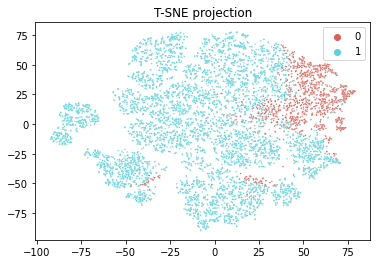

In [ ]:
# Plotting the data with TSNE
plot_TSNE(X_cluster, labels = y_predict_KPH)
plt.show()

From the visualization we can observe that the result is very similar to the one that we obtained by fitting k-means. Indeed the data is divided in two main clusters and if we compare it to clusters defined by the original true labels, we can see that:

- some of the observations of **class 0** are divided from observations of **class 1** (which is what we wanted) but others are still mixed up in the same cluster. We also looked at the visualization with TSNE for the other initialization.

As a further analysis we decide to look at the external indexes:

In [ ]:
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_KPH, y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_KPH, y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_KPH, y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_KPH, y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_KPH, y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_KPH, y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_KPH, y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_KPH, y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_KPH, y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_KPH, y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_KPH, y_cluster)))


from sklearn.metrics import silhouette_score
silhouette_score(X_cluster, y_predict_KPH, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.7181883536972093
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.8668977024761046
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.2818116462956017
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.13310229752261185
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.12885334709128227
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.8711466529074279
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.27431770468667377
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.7256822953063283
Purity for cluster 0: 0.7181883536972093
Purity for cluster 1: 0.8668977024761046
Total purity is: 0.8443694184256316


0.3127382418887423

As we said before and now confirmed with external indexes, the results that we obtained are the same one obtained with k-means.

**What does it mean?** It means that, even if **k-prototypes** is a clustering algorithm that is ideal for mixed data (numerical and categorical data), on this dataset, its performances are the same ones that we had obtained with k-means. So in the end there is no difference in using one or the other. 

## 3.5 - DBSCAN
DBSCAN is a density based clustering algorithm. Even though DBSCAN is a partitioning clustering algorithm, we don't have to specify at the beginning the number of final clusters with respect, for example, to K-means. Instead of the number of clusters, there are other two important parameters that we had to set before clustering the data.

These two parameters are called:

   - **Eps**: Maximum radius of the neighborhood
   - **MinPts**: Minimum number of points in a Eps-Neighbourhood of a specific point 
   
After setting these parameters DBSCAN analyzes all the points and labels them in different categories, as you can see below:

   - **Core points**, is a data point that has at least a minimum number of other data points (MinPts) within a specified distance (Eps) from it.
   - **Border points**, is a data point that is not a core point itself but lies within the neighborhood of a core point.
   - **Noise points**, also known as outliers, are data points that are not part of any cluster. These points do not have enough neighboring points to be classified as core points, nor do they lie within the neighborhood of any core point.

Starting from the closest core points, DBSCAN forms the clusters and associates each border point to the closest cluster while the noise points are not considered by the algorithm. By keeping this in mind, we can see one of the main advantages of DBSCAN which is not to be sensitive to noise. But the disadvantage of DBSCAN is that it has issues with high dimensional clusters when it is necessary to set different densities to separate them.

#### HOW DID WE CHOOSE THE PARAMETERS?

Based on the information that we obtained by visualizing the data divided with the true labels and because most of the parts in the clusters are high density regions (most of the points are close together) so we initially decided to use 10 as the value for **Eps** since is quite low in order not to have to many core points and 4 as the value for **MinPts**:

In [ ]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

model_DBSCAN = DBSCAN(eps=10, min_samples=4)
y_predict_DBSCAN = model_DBSCAN.fit_predict(X_cluster)
print("DBSCAN purity", tot_purity(y_predict_DBSCAN, y_cluster))

DBSCAN purity 0.8442605096919578


We can see that the purity of DBSCAN with **Eps = 10** and **MinPts = 4** is **0.844**, so we can say that this type of algorithm is a good clustering method. To see if there were better values for the parameters, we evaluated the performances of DBSCAN with different parameters using cross validation:

In [ ]:
from sklearn.model_selection import GridSearchCV

params_DBSCAN = {'eps': range(10,25), 'min_samples': range(1,15)}
cv = GridSearchCV(model_DBSCAN, params_DBSCAN, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X_cluster, y_cluster)

In [ ]:
print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X_cluster), y_cluster))

pd.DataFrame(cv.cv_results_)

{'eps': 19, 'min_samples': 1}
CV score 0.8443694184264382


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         1.304517      0.084914         0.375426        0.090599        10   
1         1.508574      0.337854         0.386733        0.085824        10   
2         1.225780      0.025044         0.313765        0.027038        10   
3         1.215376      0.029568         0.299789        0.016769        10   
4         1.263426      0.063306         0.312715        0.032020        10   
..             ...           ...              ...             ...       ...   
205       1.144103      0.079414         0.269676        0.030814        24   
206       1.052059      0.021810         0.279080        0.026712        24   
207       1.053604      0.029684         0.297536        0.011080        24   
208       1.226750      0.090760         0.300245        0.038064        24   
209       1.067457      0.018733         0.266287        0.012658        24   

    param_min_samples                          params  split0_test_score  \
0                   1   {'eps': 10, 'min_samples': 1}           0.847435   
1                   2   {'eps': 10, 'min_samples': 2}           0.847435   
2                   3   {'eps': 10, 'min_samples': 3}           0.847435   
3                   4   {'eps': 10, 'min_samples': 4}           0.847435   
4                   5   {'eps': 10, 'min_samples': 5}           0.847435   
..                ...                             ...                ...   
205                10  {'eps': 24, 'min_samples': 10}           0.847435   
206                11  {'eps': 24, 'min_samples': 11}           0.847435   
207                12  {'eps': 24, 'min_samples': 12}           0.847435   
208                13  {'eps': 24, 'min_samples': 13}           0.847435   
209                14  {'eps': 24, 'min_samples': 14}           0.847435   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.840575           0.845098         0.844369        0.002848   
1             0.840575           0.844771         0.844261        0.002824   
2             0.840575           0.844771         0.844261        0.002824   
3             0.840575           0.844771         0.844261        0.002824   
4             0.840575           0.844771         0.844261        0.002824   
..                 ...                ...              ...             ...   
205           0.840575           0.845098         0.844369        0.002848   
206           0.840575           0.845098         0.844369        0.002848   
207           0.840575           0.845098         0.844369        0.002848   
208           0.840575           0.845098         0.844369        0.002848   
209           0.840575           0.845098         0.844369        0.002848   

     rank_test_score  
0                 85  
1                 94  
2                 94  
3                 94  
4                 94  
..               ...  
205                1  
206                1  
207                1  
208                1  
209                1  

[210 rows x 13 columns]

As we can see from the results, DBSCAN has the best performance when Eps is set to 19 and MinPoint is set to 1. After finding the best parameters for this dataframe, we analyzed the visualization of DBSCAN.

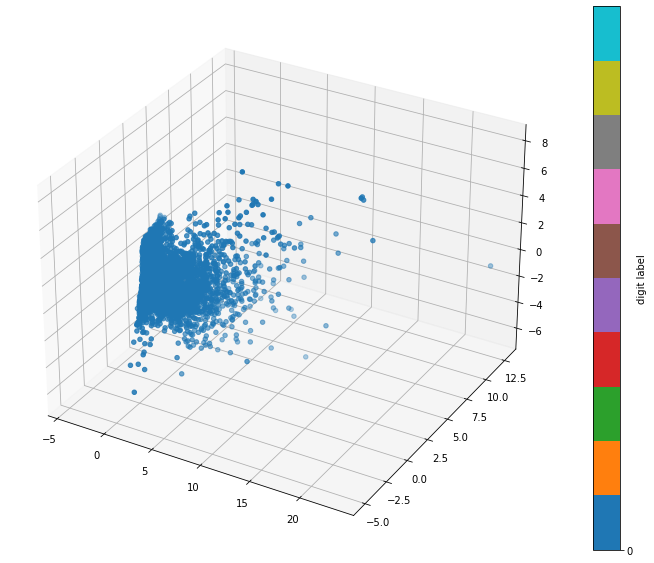

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_prj_3 = pca_3.fit_transform(X_cluster)
plot3d(X_prj_3, labels=cv.best_estimator_.fit_predict(X_cluster))

### EVALUATION OF DBSCAN

As we did for all the others cluster method we will now evaluate the cluster methods with external indexes:

In [ ]:
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(cv.best_estimator_.fit_predict(X_cluster), y_cluster, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(cv.best_estimator_.fit_predict(X_cluster), y_cluster)))

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.8443694184264382
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.0
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.15563058157247261
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.0
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.9999999999987101
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.0
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.9999999999930022
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.0
Purity for cluster 0: 0.8443694184264382
Purity for cluster 1: 0.0
Total purity is: 0.8443694184264382


Even though the total purity is 0.844, which is really high and similar to the ones obtained with other clustering methods, if we look at also the other external indexes we can see that all the observations are all clustered in the same cluster. Indeed from the precision values we can conclude that observations of class 0 and 1 are all in cluster 0 while in cluster 1 there aren't any observations of both classes. Also from the Recall values we can conclude the same thing. So it doesn’t really differentiate clusters in a good way.

## 3.6 - EVALUATION OF THE BEST MODEL ON THE TEST SET

To evaluate the best clustering model we decided to use an external index called **Jaccard Similarity coefficient**. It considers the correlation between the cluster similarity matrix (already used in other evaluations). The value of Jaccard index ranges from 0 to 1 and the formula is:

$$
\frac{f11}{f01 + f10 + f11}\
$$

In detail:
- f01: number of object pairs having different class and same cluster
- f10: number of object pairs having same class and differet cluster
- f11: number of object pairs having same class and same cluster

In [ ]:
# Jaccard index for Hierarchical clustering with average linkage
print('Jaccard Index HC_average_linakge: {}'.format(jaccard_index(y_predict_average, y_cluster)))

# Jaccard index for K-means
print('Jaccard Index K-means: {}'.format(jaccard_index(kmeans_plus.fit_predict(X_cluster), y_cluster)))

# Jaccard index for K-prototypes with average linkage
print('Jaccard Index K-prototypes: {}'.format(jaccard_index(y_predict_KPH, y_cluster)))

# Jaccard index for DBSCAN with average linkage
print('Jaccard Index DBSCAN: {}'.format(jaccard_index(cv.best_estimator_.fit_predict(X_cluster), y_cluster)))

Jaccard Index HC_average_linakge: 0.15568144678069507
Jaccard Index K-means: 0.161090458488228
Jaccard Index K-prototypes: 0.12672613955761947
Jaccard Index DBSCAN: 0.0


If we evaluate the jaccard index, we can see that they are all really low (all under 0.2) and if we compare them we can notice that:

- For **Hierarchical clustering with average linkage**, the Jaccard score is 0.15 and the silhouette score is 0.79
- For **k-means with k-means++ initialization**, the Jaccard score is 0.16 and the silhouette score is 0.31

Because the jaccard score is higher for k-means (but still very similar) and the silhouette score of the Hierarchical clustering with average linkage is higher, we decided to check both of them.

First of all we pre-processed the data:

In [ ]:
# Define the data
from sklearn.preprocessing import StandardScaler

# The train data from which we start
X_test_numerical = X_full_test[['Administrative', 'Administrative_Duration', 'Informational',
                                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

X_test_categorical = X_full_test[['Weekend', 'Fiscal_quarters_1', 'Fiscal_quarters_2', 'Fiscal_quarters_3',
                                     'Fiscal_quarters_4', 'OperatingSystems_1', 'OperatingSystems_2',
                                     'OperatingSystems_3', 'OperatingSystems_Other_OP', 'TrafficType_1',
                                     'TrafficType_10', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
                                     'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
                                     'TrafficType_Other_TrTy', 'Region_1', 'Region_2', 'Region_3',
                                     'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
                                     'Browser_1', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_Other_Br',
                                     'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor']]

# Scale only the numerical variables
scaler_method = StandardScaler()
X_test_scaled = scaler_method.fit_transform(X_test_numerical.values)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test_numerical.columns
# Concatenate the two arrays
test_cluster = pd.concat((X_test_scaled.reset_index(), X_test_categorical.reset_index()), axis = 1)
test_cluster = test_cluster.drop(columns = ['index'])

# Without ExitRates
test_cluster_without = test_cluster.drop(['ExitRates'], axis = 1)

# Reshape of the data with exitrates
dim = test_cluster.shape[1]
# Reshape of the data to allow dimensionality reduction
X_cluster_test = test_cluster.to_numpy().reshape(-1, dim)
print('X_cluster_test is a matrix of dimentions: {}'.format(X_cluster_test.shape))


# Reshape of the data without exitrates
dim = test_cluster_without.shape[1]
# Reshape of the data without exitrates to allow dimensionality reduction
X_cluster_test_without = test_cluster_without.to_numpy().reshape(-1, dim)
print('X_cluster_test_without is a matrix of dimentions: {}'.format(X_cluster_test_without.shape))


##### Reshape of the output #####
y_cluster_test = y_full_test
print('y_cluster_test is a matrix of dimentions: {}'.format(y_cluster_test.shape))
test_cluster = test_cluster.to_numpy()

X_cluster_test is a matrix of dimentions: (3063, 45)
X_cluster_test_without is a matrix of dimentions: (3063, 44)
y_cluster_test is a matrix of dimentions: (3063,)


After **pre-processing and reshaping the data**, we first look at the distribution of the data with the **true labels** (information contained in the variable 'Revenue') with TSNE visualization tool.

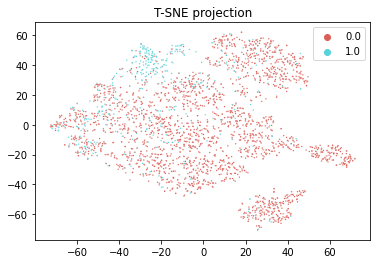

In [ ]:
plot_TSNE(test_cluster, labels = y_cluster_test)
plt.show()

After this first visualization aanalysis, we fitted the model on these data.

### K-MEANS ON TEST DATA WITH EXITRATES

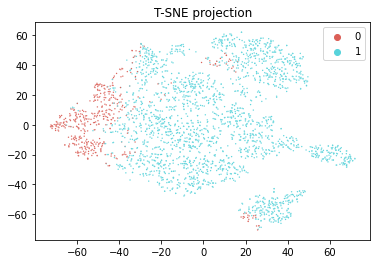

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# K-Means++ on test data
kmeans_plus = KMeans(n_clusters = 2, init='k-means++', random_state=0)             

plot_TSNE(test_cluster, labels = kmeans_plus.fit_predict(test_cluster))
plt.show()

From the visualization with TSNE we can see that the observations are divided in two main clusters (cluster 0, red, and cluster 1, blue). If we compare it to the distribution of the points with the true labels, we can say that cluster 0 partially overlaps the online shoppers that bought something on the website (the blue cluster in the TSNE visualization with true labels). Because the external indexes are the most reliable evaluation clustering indexes, we used them to check the goodness of the model: 

#### - EVALUATION WITH EXTERNAL INDEXES

In [ ]:
from sklearn.metrics import silhouette_score
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(kmeans_plus.fit_predict(test_cluster), y_cluster_test, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(kmeans_plus.fit_predict(test_cluster), y_cluster_test)))

silhouette_score(test_cluster, kmeans_plus.fit_predict(test_cluster), metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.727659574452603
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.8708060161940965
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.2723404255261204
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.12919398380204708
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.13153846153795562
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.8684615384581983
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.2764578833633594
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.7235421166150423
Purity for cluster 0: 0.727659574452603
Purity for cluster 1: 0.8708060161940965
Total purity is: 0.8488410055448956


0.3035075727494814

From these values we can say that on the test data the k-means algorithm performs a little bit better than on the train data. As we previously saw from the TSNE visualization, in cluster 0 we find observation from class 0 and 1 while in cluster 1 most of the points belong to class 0.

By looking at the recall values we can observe that, out of all of the points of class 0, almost all of them are in cluster 1 and similary out of all of the points of class 1, the majority is in cluster 1.

The purity for both clusters is high and so is the total purity, while the silhouette score isn't very high (however, if we compare it to the train silhouette score, it is higher (0.30)).

### K-MEANS ON TEST DATA WITHOUT EXITRATES

We looked at the performances of k-means on the test data without the vaariable **ExitRates** to see if there was a difference. Below you can see the code that we used to fit the model:

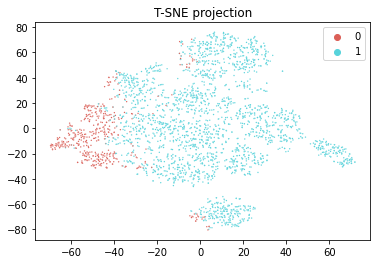

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# K-Means++ on test data
kmeans_plus = KMeans(n_clusters = 2, init='k-means++', random_state=0)             

plot_TSNE(X_cluster_test_without, labels = kmeans_plus.fit_predict(X_cluster_test_without))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(kmeans_plus.fit_predict(X_cluster_test_without), y_cluster_test)))

silhouette_score(X_cluster_test_without, kmeans_plus.fit_predict(X_cluster_test_without), metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.7251082250925301
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.8708189157982668
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.27489177488582484
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.1291810841978886
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.12884615384565828
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.8711538461504956
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.2742980561495832
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.7257019438288185
Purity for cluster 0: 0.7251082250925301
Purity for cluster 1: 0.8708189157982668
Total purity is: 0.8488410055449039


0.32310611336601036

The values for precision, recall and purity of the clusters are very similar to the ones obtained before on the complete test data. The main difference is the silhouette score that is equal to 0.32 instead of 0.30 (but still very similar and close to 0). So this means that even on data without exitrates, the model isn't able to separate in a correct way the two classes.

As said before, we looked also at the performance of the hierarchical clustering method with average linakge on complete test data and on test data without ExitRates.

## HIERARCHICAL CLUSTERING ON TEST DATA WITH EXITRATES

First we fitted the model on the data:

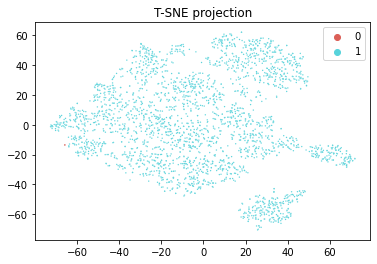

In [ ]:
# Define the model with the average linkage
n_clusters = 2
model_HC_average = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'average')

y_predict_average = model_HC_average.fit_predict(test_cluster)

# Plot the data with TSNE
plot_TSNE(test_cluster, labels = y_predict_average)
plt.show()

As we can see from the plot, most of the points are grouped in cluster 1 (blue cluster) while only few are included in cluster 0. This is a very similar results to what we obtained before on the train data. As we did before, we evaluated this clustering algorithm only with external indexes:

In [ ]:
from sklearn.metrics import silhouette_score
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average, y_cluster_test, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average, y_cluster_test, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average, y_cluster_test, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average, y_cluster_test, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_average, y_cluster_test, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_average, y_cluster_test, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_average, y_cluster_test, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_average, y_cluster_test, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_average, y_cluster_test, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_average, y_cluster_test, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_average, y_cluster_test)))

silhouette_score(X_cluster_test_without, y_predict_average, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.999999995
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.8487422410949078
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.0
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.15125775890182536
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.0007692307692278107
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.9992307692269261
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.0
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.9999999999784017
Purity for cluster 0: 0.999999995
Purity for cluster 1: 0.8487422410949078
Total purity is: 0.8488410055440786


0.8783980036305589

From the precision we can see that in cluster 0 we have almost only observations from class 0, while for cluster 1 we have mostly observations from class 0 but also some from class 1.

For the recall in class 0 most of it comes from cluster 1, while for class 1 it mainly depends on cluster 1.

The purity is quite high both for cluster 0 and cluster 1 and this is also confirmed by the total purity (0,85). Even the silhouette score is really high since it is 0.88. 

From all these results we can say that the average linkage for clustering is a pretty good method even for the test data.

## HIERARCHICAL CLUSTERING ON TEST DATA WITHOUT EXITRATES

As the last step of this analysis, we analysed the performances of the hierarchical model on the test data without **ExitRates**:

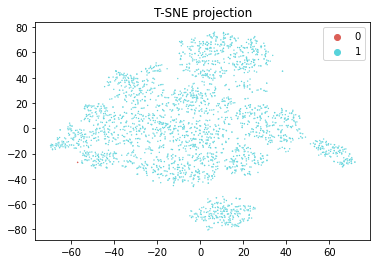

In [ ]:
# Define the model with the average linkage
n_clusters = 2
model_HC_average = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage= 'average')

y_predict_average_without = model_HC_average.fit_predict(X_cluster_test_without)

# Plot the data with TSNE
plot_TSNE(X_cluster_test_without, labels = y_predict_average_without)
plt.show()

The results are identical to the ones obtained on the complete test data with the complete model. To see if there was a difference between the reduced model and the complete one, we analysed the values of recall, precision, purity and silhouette score as you can see below:

In [ ]:
from sklearn.metrics import silhouette_score
# Precision for class 0 in cluster 0
print('Precision: points of class 0 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average_without, y_cluster_test, 0, 0)))

# Precision for class 0 in cluster 1
print('Precision: points of class 0 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average_without, y_cluster_test, 1, 0)))

# Precision for class 1 in cluster 0
print('Precision: points of class 1 of cluster 0 over tot point in cluster 0: {}'.format(precision(y_predict_average_without, y_cluster_test, 0, 1)))

# Precision for class 1 in cluster 1
print('Precision: points of class 1 of cluster 1 over tot point in cluster 1: {}'.format(precision(y_predict_average_without, y_cluster_test, 1, 1)))

# Recall for class 0 in cluster 0
print('Recall: points of class 0 of cluster 0 over tot point in class 0: {}'.format(recall(y_predict_average_without, y_cluster_test, 0, 0)))

# Recall for class 0 in cluster 1
print('Recall: points of class 0 of cluster 1 over tot point in class 0: {}'.format(recall(y_predict_average_without, y_cluster_test, 1, 0)))

# Recall for class 1 in cluster 0
print('Recall: points of class 1 of cluster 0 over tot point in class 1: {}'.format(recall(y_predict_average_without, y_cluster_test, 0, 1)))

# Recall for class 1 in cluster 1
print('Recall: points of class 1 of cluster 1 over tot point in class 1: {}'.format(recall(y_predict_average_without, y_cluster_test, 1, 1)))

# Purity for cluster 0
print('Purity for cluster 0: {}'.format(purity(y_predict_average_without, y_cluster_test, 0)))

# Purity for cluster 1
print('Purity for cluster 1: {}'.format(purity(y_predict_average_without, y_cluster_test, 1)))

# Total Purity
print('Total purity is: {}'.format(tot_purity(y_predict_average_without, y_cluster_test)))

silhouette_score(X_cluster_test_without, y_predict_average_without, metric='euclidean')

Precision: points of class 0 of cluster 0 over tot point in cluster 0: 0.999999995
Precision: points of class 0 of cluster 1 over tot point in cluster 1: 0.8487422410949078
Precision: points of class 1 of cluster 0 over tot point in cluster 0: 0.0
Precision: points of class 1 of cluster 1 over tot point in cluster 1: 0.15125775890182536
Recall: points of class 0 of cluster 0 over tot point in class 0: 0.0007692307692278107
Recall: points of class 0 of cluster 1 over tot point in class 0: 0.9992307692269261
Recall: points of class 1 of cluster 0 over tot point in class 1: 0.0
Recall: points of class 1 of cluster 1 over tot point in class 1: 0.9999999999784017
Purity for cluster 0: 0.999999995
Purity for cluster 1: 0.8487422410949078
Total purity is: 0.8488410055440786


0.8783980036305589

We did a comparison with the previous results and the values of the external indexes of the reduced model are the same ones of the complete one.

#### AFTER EVALUATING THE TWO MODELS (K-MEANS AND HIERARCHICAL CLUSTERING) WE DECIDED THAT, IN THE END, THE BEST METHOD FOR CLUSTERING IS THE HIERARCHICAL CLUSTERING WITH AVERAGE LINKAGE. THIS IS PROBABLY DUE TO THE FACT THAT K-MEANS WORKS THE BEST ON NUMERICAL DATA WHILE OURS ARE MIXED DATA.

# COMPARING CLUSTERING AND CLASSIFICATION

Classification and clustering are two methods that we used to separate the data according to the information contained in 'Revenue'. For the classification we found out that the best model (with a default threshold of 0.5) was the **logistic regression**, while for the clustering we selected as the best clustering method the hierarchical **algorithm with average linkage**. 
To compare these two model we used again the Jaccard index since it was the only that takes into account only the results and not the method itself.

In [209]:
# Jaccard index for logistic regression
print('LDA: {}'.format(jaccard_index(LDA_model_reduce.predict(X_full_test_without), y_full_test)))

# Jaccard index for Hierarchical clustering with average linkage
print('Jaccard Index HC_averagee_linakge: {}'.format(jaccard_index(y_predict_average, y_cluster_test)))

LDA: 0.2972972972972973
Jaccard Index HC_averagee_linakge: 0.15125775890231952


As we expected the jaccard index associated with the LDA is higher than the one associated with the hierarchical clustering. The main reason is that clustering algorithms belong to unsupervised learning method, and that means that they cluster the data without any information about the target variable (in our case Revenue). If we didn't have the information about **Revenue** we wouldn't be able to use external indexes and we wouldn't be certain about how true data were distributed; in that case clustering could be a possible solution.